In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Flatten , LeakyReLU , Reshape,Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [ ]:
# data load
(x_train, _ ) , (x_test, _)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X=np.vstack((x_train, x_test))
X=X.astype('float32')
X=(X-127.5)/127.5

In [ ]:
# discriminator function
def discriminator():
  inp=Input(shape=(28,28,1))
  x=Flatten()(inp)
  x=Dropout(0.4)(x)
  x=Dense(1024 , activation=LeakyReLU(alpha=0.2))(x)
  x=Dropout(0.4)(x)
  x=Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  op=Dense(1, activation='sigmoid')(x)
  model=Model(inp, op)
  model.compile(optimizer=Adam(lr=0.0002 , beta_1=0.5) , loss='binary_crossentropy')

  return model

In [ ]:
# generator function
def generator(n):
  inp=Input(shape=(n))
  x=Dense(256 , activation=LeakyReLU(alpha=0.2))(inp)
  x=Dense(512 , activation=LeakyReLU(alpha=0.2))(x)
  x=Dense(1024 , activation=LeakyReLU(alpha=0.2))(x)
  x=Dense(784 , activation='tanh')(x)
  op=Reshape((28,28,1))(x)

  return Model(inp, op)

In [ ]:
def GAN(discrim, gen):
  discrim.trainable=False
  model=Sequential()
  model.add(gen)
  model.add(discrim)
  model.compile(optimizer=Adam(lr=0.0002 , beta_1=0.5) , loss='binary_crossentropy')
  return model



In [ ]:
discrim=discriminator()
gen=generator(100)


In [ ]:
GAN_model=GAN(discrim, gen)

1/1 [==============================] - 1s 505ms/step


Text(0.5, 0, '[[0.47195122]]')

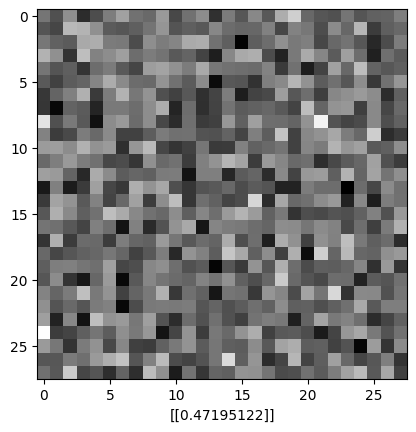

In [ ]:
plt.imshow(gen.predict(np.random.randn(100).reshape(1,100)).reshape(28,28), cmap='gray')
plt.xlabel(discrim.predict(gen.predict(np.random.randn(100).reshape(1,100))))

In [ ]:
# plt.imshow(X[0].reshape(28,28), cmap='gray')
# # Make a prediction for the 15th image
# image_to_predict = X[15].reshape(28, 28, 1)  # Assuming X[15] is reshaped correctly
# predicted_label = discrim.predict(image_to_predict)

# plt.xlabel(predicted_label)

In [ ]:
print(X[15].reshape(28,28,1).shape)

(28, 28, 1)


In [ ]:
from tqdm import tqdm

In [ ]:
epochs=50
batch_size=256
half_batch=batch_size//2
n=100
losses=[]

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Create a folder to store generated images in Google Drive
output_folder_root = '/content/drive/My Drive/generated_images'  # Change this path as needed
os.makedirs(output_folder_root, exist_ok=True)

# Loop over epochs
for i in range(epochs):
    print("EPOCHS ", i)

    # Create a folder for the current epoch
    epoch_folder = os.path.join(output_folder_root, f'epoch_{i}')
    os.makedirs(epoch_folder, exist_ok=True)

    for j in tqdm(range(len(X) // batch_size)):
        xreal, yreal = X[np.random.randint(0, len(X), half_batch)].reshape(half_batch, 28, 28, 1), np.ones(
            half_batch).reshape(half_batch, 1)
        xfake, yfake = gen.predict(np.random.randn(half_batch, n)), np.zeros(half_batch).reshape(half_batch, 1)
        xfinal, yfinal = np.vstack((xreal, xfake)), np.vstack((yreal, yfake))
        dloss = discrim.train_on_batch(xfinal, yfinal)
        gloss = GAN_model.train_on_batch(np.random.randn(batch_size, n), np.ones(batch_size).reshape(batch_size, 1))
        losses.append([dloss, gloss])

    ig, axes = plt.subplots(5, 5, figsize=(12, 12))
    print("losses -> ", dloss, " ", gloss)
    for ii in range(5):
        for jj in range(5):
            generated_image = gen.predict(np.random.randn(1 * n).reshape(1, n)).reshape(28, 28)
            axes[ii, jj].imshow(generated_image, cmap='gray')

    # Save the subplot images for the current epoch
    plt.savefig(os.path.join(epoch_folder, f"epoch_{i}_subplots.png"))
    plt.close()


EPOCHS  0


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 1/273 [00:06<28:15,  6.23s/it]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:06<12:02,  2.66s/it]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:06<06:51,  1.53s/it]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:06<04:21,  1.03it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:06<02:59,  1.49it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:06<02:09,  2.05it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:07<01:38,  2.69it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 8/273 [00:07<01:21,  3.23it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:07<01:11,  3.67it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:07<01:00,  4.38it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:07<00:56,  4.66it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:07<00:47,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:08<00:35,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:08<00:30,  8.35it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:08<00:29,  8.79it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:08<00:26,  9.43it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:08<00:26,  9.44it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:08<00:26,  9.42it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:09<00:24, 10.09it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:09<00:24, 10.20it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:09<00:24, 10.18it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:09<00:23, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:09<00:23, 10.19it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:09<00:23, 10.13it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:10<00:22, 10.47it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:10<00:22, 10.58it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:10<00:21, 10.71it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:10<00:21, 10.82it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:10<00:21, 10.69it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:11<00:21, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:11<00:20, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:11<00:20, 10.81it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:11<00:20, 10.90it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:11<00:20, 10.88it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:12<00:20, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:12<00:21, 10.15it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:12<00:20, 10.16it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:12<00:20, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:12<00:19, 10.47it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:12<00:19, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:13<00:19, 10.47it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:13<00:19, 10.65it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:13<00:18, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:13<00:18, 10.63it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:13<00:18, 10.93it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:14<00:18, 10.82it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:14<00:17, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:14<00:17, 11.01it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:14<00:17, 10.91it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:14<00:17, 10.78it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:15<00:18, 10.26it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:15<00:17, 10.58it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:15<00:16, 10.71it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:15<00:16, 10.68it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:16, 10.78it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:16, 10.89it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:16<00:15, 10.82it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:16<00:15, 10.82it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:15, 10.88it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:15, 11.01it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:14, 11.06it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:17<00:14, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:15, 10.55it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:15, 10.10it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:15, 10.16it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:17<00:15,  9.88it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:16,  9.44it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:17,  8.97it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:18<00:19,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:19,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:18<00:19,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:18<00:20,  7.15it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:18<00:21,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:21,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:19<00:21,  6.91it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 128/273 [00:19<00:21,  6.61it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 129/273 [00:19<00:21,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:19<00:19,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:19,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:19<00:19,  7.24it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▊     | 133/273 [00:20<00:20,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:20,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:21,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:20<00:20,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:20<00:19,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:20<00:21,  6.28it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████     | 139/273 [00:21<00:22,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:21<00:19,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:16,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:21<00:14,  8.71it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:21<00:14,  8.92it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:21<00:13,  9.57it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:22<00:12,  9.93it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:22<00:12,  9.48it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:22<00:12,  9.43it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:22<00:12,  9.59it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:22<00:11, 10.09it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:23<00:11, 10.14it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:23<00:10, 10.47it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:23<00:10, 10.52it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:23<00:10, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:23<00:09, 10.77it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:23<00:09, 11.00it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:24<00:09, 10.74it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:24<00:09, 10.55it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:24<00:09, 10.75it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:24<00:08, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:24<00:09, 10.22it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:25<00:08, 10.53it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:25<00:08, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:25<00:08, 10.64it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:25<00:08, 10.49it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:25<00:08, 10.15it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 191/273 [00:26<00:08, 10.19it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:26<00:07, 10.49it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:26<00:07, 10.35it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:26<00:07, 10.54it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:26<00:07, 10.48it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:27<00:07, 10.12it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:27<00:06, 10.40it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:27<00:06,  9.89it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:27<00:06, 10.15it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:27<00:06, 10.29it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:27<00:05, 10.59it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:28<00:05, 10.54it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:28<00:05, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:28<00:05, 10.50it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:28<00:05, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:28<00:04, 10.76it/s]

4/4 [==============================] - 0s 2ms/step


 82%|████████▏ | 223/273 [00:29<00:04, 10.90it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:29<00:04, 11.03it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:29<00:04, 10.95it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:29<00:04, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:29<00:03, 10.83it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:30<00:03, 10.85it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:30<00:03, 10.95it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:30<00:03, 11.10it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:30<00:03, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:30<00:03, 10.45it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:30<00:02, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:31<00:03,  8.90it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 246/273 [00:31<00:03,  8.71it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 247/273 [00:31<00:03,  8.37it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:31<00:03,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:31<00:03,  7.51it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 250/273 [00:31<00:03,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:32<00:03,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:32<00:03,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:32<00:03,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:32<00:02,  6.83it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 255/273 [00:32<00:02,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:32<00:02,  6.34it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 257/273 [00:33<00:02,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:33<00:02,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:33<00:02,  6.48it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 260/273 [00:33<00:01,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:33<00:01,  6.71it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 262/273 [00:33<00:01,  6.52it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▋| 263/273 [00:34<00:01,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:34<00:01,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:34<00:00,  7.86it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 267/273 [00:34<00:00,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:34<00:00,  9.10it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:34<00:00,  9.31it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:35<00:00,  7.79it/s]


losses ->  0.8211461305618286   2.6325035095214844
1/1 [==============================] - 0s 16ms/step
EPOCHS  1


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:25, 10.60it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:24, 10.96it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:25, 10.43it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 8/273 [00:00<00:26,  9.94it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 9/273 [00:00<00:27,  9.75it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:25, 10.28it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:24, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:01<00:24, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:01<00:24, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:01<00:23, 10.64it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:23, 10.77it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:02<00:24, 10.03it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:02<00:24, 10.29it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:02<00:25,  9.79it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:02<00:24, 10.16it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:03<00:23, 10.39it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:03<00:22, 10.58it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:03<00:22, 10.63it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:03<00:22, 10.51it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:03<00:21, 10.74it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:03<00:21, 10.64it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 43/273 [00:04<00:21, 10.65it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:04<00:21, 10.79it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:04<00:20, 10.82it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:04<00:20, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:04<00:22, 10.08it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:05<00:22,  9.89it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:05<00:22,  9.64it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:05<00:21, 10.07it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 58/273 [00:05<00:22,  9.60it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 60/273 [00:05<00:24,  8.80it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:06<00:25,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:06<00:25,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:06<00:26,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:06<00:26,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:06<00:29,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:06<00:28,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:06<00:30,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:07<00:31,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:07<00:29,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:07<00:28,  7.03it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:07<00:29,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:07<00:32,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:07<00:30,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:07<00:28,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:08<00:29,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:08<00:27,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:08<00:27,  7.25it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:08<00:29,  6.58it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 79/273 [00:08<00:31,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:08<00:30,  6.29it/s]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 81/273 [00:09<00:27,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:09<00:23,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:09<00:21,  8.62it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:09<00:23,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:09<00:22,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:09<00:21,  8.47it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:09<00:23,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:10<00:21,  8.43it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:10<00:20,  8.94it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:10<00:20,  8.77it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:10<00:20,  8.76it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:10<00:18,  9.43it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:10<00:18,  9.45it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:10<00:18,  9.47it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:11<00:19,  8.84it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:11<00:18,  9.47it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:11<00:17,  9.49it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:11<00:16,  9.89it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:11<00:16,  9.85it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:11<00:16, 10.01it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:12<00:16, 10.13it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 112/273 [00:12<00:15, 10.34it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:12<00:15, 10.18it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:12<00:15, 10.38it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:12<00:14, 10.34it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:13<00:15,  9.90it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:13<00:14, 10.13it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▌     | 124/273 [00:13<00:14, 10.32it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:13<00:14, 10.44it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:13<00:13, 10.44it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:14<00:13, 10.52it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:14<00:13, 10.38it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:14<00:14,  9.87it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:14<00:13, 10.20it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:14<00:13, 10.10it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:15<00:13,  9.53it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:15<00:13,  9.95it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:15<00:13,  9.62it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:15<00:13,  9.49it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:15<00:14,  8.89it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:15<00:14,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:16<00:14,  8.71it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:16<00:12,  9.50it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:16<00:13,  8.88it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:16<00:12,  9.48it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:16<00:12,  9.25it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:16<00:12,  9.35it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:17<00:11,  9.79it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:17<00:12,  9.39it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:17<00:11,  9.78it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:17<00:12,  8.91it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:17<00:11,  9.52it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:17<00:10,  9.87it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:18<00:10,  9.76it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:18<00:10, 10.18it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:18<00:09, 10.41it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:18<00:10,  9.57it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 176/273 [00:18<00:09,  9.82it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:19<00:10,  9.05it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:19<00:12,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:19<00:12,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:19<00:13,  6.71it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 181/273 [00:19<00:13,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 182/273 [00:19<00:13,  6.89it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 183/273 [00:19<00:12,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:20<00:12,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:20<00:12,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:20<00:12,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:20<00:12,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:20<00:13,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:20<00:12,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:21<00:12,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:21<00:12,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:21<00:12,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:21<00:12,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:21<00:12,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:21<00:12,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:21<00:11,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:22<00:11,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:22<00:10,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:22<00:09,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:22<00:08,  8.29it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:22<00:08,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:22<00:08,  8.43it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:22<00:07,  9.18it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:23<00:07,  8.71it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:23<00:06,  9.30it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:23<00:06,  9.76it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:23<00:06, 10.13it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:23<00:06,  9.63it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:23<00:05,  9.69it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 217/273 [00:24<00:05,  9.37it/s]

4/4 [==============================] - 0s 2ms/step


 80%|███████▉  | 218/273 [00:24<00:05,  9.45it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:24<00:05,  9.52it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:24<00:05,  9.51it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:24<00:05,  9.20it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:24<00:04,  9.88it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:25<00:05,  9.50it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:25<00:04,  9.20it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:25<00:04,  9.28it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:25<00:04,  9.36it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 231/273 [00:25<00:04,  9.69it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:25<00:04,  9.11it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:25<00:03,  9.80it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:26<00:03,  9.78it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:26<00:03,  9.37it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:26<00:03,  9.58it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:26<00:03,  9.09it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:26<00:03,  9.71it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:27<00:02, 10.20it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:27<00:02, 10.46it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 248/273 [00:27<00:02,  9.88it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:27<00:02,  9.90it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:27<00:02,  9.59it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:27<00:02,  9.00it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:27<00:02,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:28<00:01,  9.38it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:28<00:01,  9.61it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:28<00:01, 10.01it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:28<00:01,  9.62it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:28<00:01,  9.60it/s]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 264/273 [00:29<00:00,  9.79it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:29<00:00,  9.05it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:29<00:00,  8.58it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:29<00:00,  8.75it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:29<00:00,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:29<00:00,  9.25it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:30<00:00,  9.11it/s]

4/4 [==============================] - 0s 6ms/step


100%|██████████| 273/273 [00:30<00:00,  9.05it/s]


losses ->  0.6475099921226501   0.9814473390579224
1/1 [==============================] - 0s 27ms/step
EPOCHS  2


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:40,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:49,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:44,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


  1%|▏         | 4/273 [00:00<00:44,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:33,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:29,  8.99it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:29,  8.91it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:29,  8.77it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:29,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:27,  9.57it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:01<00:25, 10.06it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:01<00:25,  9.97it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:28,  9.01it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:30,  8.43it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:29,  8.41it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:02<00:31,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:02<00:27,  8.90it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:02<00:27,  9.09it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:29,  8.51it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:30,  8.10it/s]

4/4 [==============================] - 0s 5ms/step


 10%|█         | 28/273 [00:03<00:31,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:03<00:29,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:03<00:26,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:03<00:26,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:03<00:26,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:04<00:27,  8.57it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:04<00:28,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:04<00:25,  9.05it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:04<00:27,  8.43it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:04<00:27,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:04<00:26,  8.76it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:04<00:25,  9.05it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:04<00:24,  9.21it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:05<00:26,  8.58it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▋        | 45/273 [00:05<00:25,  8.88it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:05<00:27,  8.39it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 48/273 [00:05<00:24,  9.27it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:05<00:24,  9.25it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:05<00:23,  9.36it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:05<00:25,  8.75it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:06<00:23,  9.53it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:06<00:23,  9.44it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:06<00:24,  9.04it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:06<00:25,  8.63it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:06<00:24,  8.88it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:06<00:24,  8.75it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:06<00:22,  9.24it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:07<00:24,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:07<00:22,  9.13it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 65/273 [00:07<00:23,  8.72it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:07<00:23,  8.72it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:07<00:21,  9.31it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:08<00:20,  9.74it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:08<00:20,  9.61it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:08<00:20,  9.63it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:08<00:20,  9.64it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:08<00:20,  9.71it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:08<00:20,  9.78it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:08<00:21,  9.03it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:08<00:21,  9.12it/s]

4/4 [==============================] - 0s 7ms/step


 29%|██▉       | 80/273 [00:09<00:22,  8.51it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:09<00:21,  8.85it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:09<00:23,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:09<00:21,  8.70it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:09<00:19,  9.48it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:09<00:20,  9.18it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:09<00:19,  9.61it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:10<00:19,  9.27it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:10<00:19,  9.36it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:10<00:19,  9.21it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:10<00:20,  8.60it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:10<00:22,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:10<00:23,  7.54it/s]

4/4 [==============================] - 0s 6ms/step


 35%|███▌      | 96/273 [00:10<00:24,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:11<00:24,  7.31it/s]

4/4 [==============================] - 0s 2ms/step


 36%|███▌      | 98/273 [00:11<00:23,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:11<00:23,  7.34it/s]

4/4 [==============================] - 0s 7ms/step


 37%|███▋      | 100/273 [00:11<00:26,  6.52it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 101/273 [00:11<00:25,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:11<00:25,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:11<00:25,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:12<00:26,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:12<00:25,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:12<00:27,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:12<00:26,  6.20it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 108/273 [00:12<00:29,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:13<00:27,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:13<00:26,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:13<00:26,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:13<00:26,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:13<00:25,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:13<00:26,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:13<00:25,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:14<00:25,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:14<00:20,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:14<00:18,  8.33it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:14<00:18,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:14<00:16,  9.17it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:14<00:17,  8.64it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:15<00:16,  8.85it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:15<00:16,  9.02it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:15<00:15,  9.53it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:15<00:15,  9.28it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:15<00:15,  9.12it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:15<00:15,  8.91it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:16<00:14,  9.44it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:16<00:15,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:16<00:15,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:16<00:15,  8.84it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 141/273 [00:16<00:13,  9.43it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:17<00:13,  9.60it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:17<00:13,  9.57it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:17<00:13,  9.77it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:17<00:12,  9.74it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:17<00:13,  9.06it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:17<00:12,  9.67it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:17<00:12, 10.04it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:18<00:12,  9.28it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:18<00:12,  9.73it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:18<00:12,  9.39it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:18<00:12,  9.31it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:18<00:11,  9.83it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:18<00:11, 10.07it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:19<00:11,  9.49it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:19<00:11,  9.56it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:19<00:11,  9.38it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:19<00:11,  9.47it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:19<00:11,  8.80it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:19<00:11,  9.05it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:19<00:11,  8.83it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 172/273 [00:20<00:10,  9.28it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:20<00:11,  8.77it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:20<00:11,  8.37it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:20<00:11,  8.51it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:20<00:11,  8.32it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:20<00:10,  9.33it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:21<00:10,  9.07it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:21<00:10,  8.82it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:21<00:10,  8.40it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:21<00:11,  8.14it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 184/273 [00:21<00:10,  8.56it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:21<00:10,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:21<00:10,  8.38it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:21<00:10,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:22<00:09,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:22<00:09,  9.14it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:22<00:08,  9.34it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:22<00:09,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:22<00:08,  8.94it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:22<00:08,  9.17it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:22<00:08,  8.91it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:23<00:07,  9.43it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:23<00:07,  9.33it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 200/273 [00:23<00:08,  8.73it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:23<00:08,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:23<00:08,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:23<00:07,  8.95it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:23<00:09,  7.44it/s]

4/4 [==============================] - 0s 11ms/step


 75%|███████▌  | 206/273 [00:24<00:16,  4.03it/s]

4/4 [==============================] - 0s 2ms/step


 76%|███████▌  | 207/273 [00:24<00:15,  4.25it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:24<00:14,  4.62it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:25<00:12,  4.98it/s]

4/4 [==============================] - 0s 9ms/step


 77%|███████▋  | 210/273 [00:25<00:19,  3.31it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:26<00:21,  2.95it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:26<00:16,  3.59it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 213/273 [00:26<00:14,  4.05it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:26<00:12,  4.66it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:26<00:11,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:26<00:09,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:26<00:09,  5.80it/s]

4/4 [==============================] - 0s 7ms/step


 80%|███████▉  | 218/273 [00:27<00:09,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:27<00:09,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:27<00:08,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:27<00:08,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:27<00:08,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:27<00:06,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:28<00:06,  7.92it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:28<00:05,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:28<00:05,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:28<00:05,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:28<00:05,  7.99it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:28<00:05,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:29<00:04,  8.84it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:29<00:04,  9.02it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:29<00:04,  8.95it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:29<00:04,  8.46it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:29<00:03,  9.20it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:29<00:03,  9.81it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:29<00:03,  9.18it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:30<00:03,  8.66it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:30<00:03,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:30<00:03,  8.88it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:30<00:02,  8.94it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:30<00:02,  9.28it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:30<00:02,  9.82it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:31<00:02,  9.26it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:31<00:02,  8.73it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:31<00:02,  8.84it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:31<00:01,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:31<00:01,  8.96it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:31<00:01,  8.51it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:32<00:01,  8.64it/s]

4/4 [==============================] - 0s 6ms/step


 96%|█████████▌| 262/273 [00:32<00:01,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:32<00:01,  8.06it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:32<00:01,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:32<00:01,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:32<00:00,  7.92it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:32<00:00,  8.82it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:33<00:00,  8.88it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:33<00:00,  8.42it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:33<00:00,  8.78it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:33<00:00,  9.08it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:33<00:00,  8.13it/s]


losses ->  0.6776919364929199   2.169119358062744
1/1 [==============================] - 0s 17ms/step
EPOCHS  3


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:26, 10.33it/s]

4/4 [==============================] - 0s 2ms/step


  1%|▏         | 4/273 [00:00<00:29,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:27,  9.65it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 8/273 [00:00<00:26, 10.00it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:30,  8.60it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:34,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:35,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:36,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:35,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:01<00:38,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:39,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:41,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:02<00:40,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:39,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:38,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:37,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:02<00:36,  6.94it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 23/273 [00:03<00:37,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:37,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:38,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:03<00:40,  6.17it/s]

4/4 [==============================] - 0s 5ms/step


 10%|▉         | 27/273 [00:03<00:40,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:39,  6.23it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 29/273 [00:04<00:40,  6.01it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 30/273 [00:04<00:42,  5.75it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█▏        | 31/273 [00:04<00:38,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:04<00:34,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:31,  7.55it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 34/273 [00:04<00:32,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:29,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:26,  8.81it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:28,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:27,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:05<00:27,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:05<00:24,  9.32it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:05<00:24,  9.40it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:26,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:06<00:23,  9.43it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:06<00:23,  9.68it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:06<00:23,  9.64it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:06<00:21, 10.06it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:06<00:21, 10.22it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:07<00:23,  9.38it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:07<00:22,  9.56it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:07<00:23,  9.10it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:07<00:23,  8.92it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:07<00:22,  9.55it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:07<00:24,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:08<00:23,  8.81it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:08<00:23,  8.79it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:08<00:23,  8.73it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:08<00:22,  8.99it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:08<00:24,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:08<00:23,  8.73it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:08<00:22,  9.02it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:08<00:23,  8.45it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:09<00:23,  8.65it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:09<00:21,  9.38it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:09<00:22,  8.77it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:09<00:21,  9.06it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:09<00:21,  9.21it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:09<00:23,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:09<00:22,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:10<00:39,  4.81it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:10<00:33,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:10<00:31,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:10<00:28,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:10<00:25,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:10<00:25,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:11<00:23,  7.90it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 88/273 [00:11<00:22,  8.23it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:11<00:21,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:11<00:20,  8.78it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:11<00:19,  9.10it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:11<00:19,  9.22it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:11<00:19,  9.26it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:11<00:19,  9.26it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:11<00:19,  9.01it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:12<00:19,  9.17it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:12<00:18,  9.24it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:12<00:19,  9.08it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:12<00:20,  8.49it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:12<00:18,  9.26it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:12<00:17,  9.67it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:12<00:17,  9.72it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:13<00:16,  9.80it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:13<00:16,  9.73it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:13<00:16,  9.76it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:13<00:17,  9.25it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:13<00:17,  9.31it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:13<00:17,  9.06it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:14<00:17,  9.17it/s]

4/4 [==============================] - 0s 2ms/step


 43%|████▎     | 117/273 [00:14<00:16,  9.36it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:14<00:16,  9.61it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 120/273 [00:14<00:18,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:14<00:18,  8.12it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:14<00:19,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:15<00:19,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:15<00:19,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:15<00:21,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:15<00:22,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:15<00:23,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:15<00:24,  5.96it/s]

4/4 [==============================] - 0s 6ms/step


 47%|████▋     | 129/273 [00:16<00:24,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:16<00:23,  6.21it/s]

4/4 [==============================] - 0s 6ms/step


 48%|████▊     | 131/273 [00:16<00:23,  6.13it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 132/273 [00:16<00:23,  6.03it/s]

4/4 [==============================] - 0s 2ms/step


 49%|████▊     | 133/273 [00:16<00:21,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:16<00:21,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:16<00:21,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:17<00:21,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:17<00:21,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:17<00:20,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:17<00:20,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:17<00:21,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:17<00:20,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:18<00:19,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:18<00:17,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:18<00:14,  8.55it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 146/273 [00:18<00:14,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:18<00:14,  8.63it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:18<00:13,  8.94it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:18<00:13,  9.06it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:18<00:13,  9.31it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:18<00:14,  8.68it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:19<00:13,  9.02it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:19<00:12,  9.23it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:19<00:12,  9.34it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:19<00:13,  8.96it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:19<00:12,  9.18it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:19<00:12,  9.33it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:19<00:12,  9.45it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:19<00:11,  9.87it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:20<00:10, 10.13it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:20<00:10, 10.14it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:20<00:11,  9.36it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:20<00:11,  9.45it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:20<00:11,  8.90it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:21<00:11,  8.80it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 171/273 [00:21<00:12,  8.40it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:21<00:11,  8.68it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:21<00:11,  8.67it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:21<00:11,  8.72it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:21<00:10,  8.99it/s]

4/4 [==============================] - 0s 2ms/step


 65%|██████▍   | 177/273 [00:21<00:10,  9.13it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:22<00:09,  9.60it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:22<00:09,  9.67it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:22<00:09,  9.66it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:22<00:09,  9.70it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 184/273 [00:22<00:09,  9.05it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:22<00:09,  9.14it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:22<00:09,  9.22it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:22<00:09,  9.30it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:22<00:09,  9.32it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:23<00:08,  9.35it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:23<00:08,  9.41it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:23<00:09,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:23<00:09,  8.76it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:23<00:09,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:23<00:09,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:23<00:09,  8.45it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:23<00:09,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:24<00:09,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:24<00:08,  8.56it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:24<00:08,  8.51it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 200/273 [00:24<00:08,  8.91it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:24<00:08,  8.61it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:24<00:07,  8.75it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:25<00:07,  8.39it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:25<00:08,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:25<00:08,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:25<00:08,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:25<00:07,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:25<00:07,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:25<00:07,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:26<00:07,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:26<00:07,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:26<00:06,  8.37it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:26<00:06,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:26<00:06,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:26<00:06,  8.22it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:26<00:06,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:26<00:06,  8.63it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:26<00:05,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:27<00:05,  9.22it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:27<00:05,  8.89it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:27<00:05,  8.82it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:27<00:05,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:27<00:05,  8.70it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:27<00:05,  8.58it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:27<00:05,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:27<00:04,  9.11it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:27<00:04,  9.25it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:28<00:05,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:28<00:05,  6.83it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 233/273 [00:28<00:06,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:28<00:06,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:28<00:06,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:28<00:05,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:29<00:05,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:29<00:05,  6.26it/s]

4/4 [==============================] - 0s 7ms/step


 88%|████████▊ | 239/273 [00:29<00:05,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 240/273 [00:29<00:05,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:29<00:04,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:29<00:04,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:30<00:04,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:30<00:04,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:30<00:04,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:30<00:04,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:30<00:04,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:30<00:04,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:31<00:04,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:31<00:03,  5.98it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 251/273 [00:31<00:03,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:31<00:03,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:31<00:03,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:31<00:02,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:31<00:02,  7.21it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:32<00:01,  8.44it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:32<00:01,  8.73it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:32<00:01,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:32<00:01,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:32<00:01,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:32<00:01,  8.93it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:32<00:01,  9.15it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:32<00:01,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:33<00:00,  8.63it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:33<00:00,  8.77it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:33<00:00,  8.89it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:33<00:00,  8.22it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:33<00:00,  8.53it/s]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▉| 270/273 [00:33<00:00,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:33<00:00,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:33<00:00,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:34<00:00,  8.02it/s]


losses ->  0.5450618863105774   1.0987310409545898
1/1 [==============================] - 0s 17ms/step
EPOCHS  4


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:30,  8.87it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:31,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:29,  9.09it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:32,  8.25it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:00<00:31,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:31,  8.50it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:00<00:33,  8.01it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 9/273 [00:01<00:31,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:32,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:31,  8.37it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:29,  8.78it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:27,  9.37it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:01<00:27,  9.38it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:01<00:28,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:01<00:28,  9.08it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:27,  9.29it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 19/273 [00:02<00:29,  8.48it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:02<00:32,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:33,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:02<00:28,  8.64it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:02<00:28,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:02<00:25,  9.51it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:25,  9.55it/s]

4/4 [==============================] - 0s 5ms/step


 10%|█         | 28/273 [00:03<00:27,  8.78it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:03<00:27,  8.73it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:03<00:29,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:03<00:27,  8.66it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:03<00:26,  8.95it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:03<00:26,  9.14it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:03<00:26,  8.93it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:04<00:29,  8.06it/s]

4/4 [==============================] - 0s 7ms/step


 13%|█▎        | 36/273 [00:04<00:32,  7.21it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:04<00:35,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 38/273 [00:04<00:36,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:04<00:36,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:04<00:36,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:05<00:37,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:05<00:37,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:05<00:35,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:05<00:36,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:05<00:35,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:05<00:35,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:05<00:34,  6.61it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 48/273 [00:06<00:32,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:06<00:33,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:06<00:32,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:06<00:33,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:06<00:34,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:06<00:36,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:07<00:34,  6.33it/s]

4/4 [==============================] - 0s 5ms/step


 20%|██        | 55/273 [00:07<00:35,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:07<00:33,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:07<00:33,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 58/273 [00:07<00:32,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:07<00:29,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:07<00:29,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:08<00:26,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:08<00:25,  8.37it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:08<00:22,  9.10it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:08<00:24,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:08<00:24,  8.51it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:08<00:23,  8.79it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:08<00:23,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:08<00:25,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:09<00:23,  8.60it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:09<00:24,  8.17it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:09<00:24,  8.18it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 73/273 [00:09<00:25,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:09<00:25,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:09<00:23,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:09<00:26,  7.52it/s]

4/4 [==============================] - 0s 6ms/step


 28%|██▊       | 77/273 [00:09<00:26,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:10<00:26,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:10<00:28,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:10<00:30,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:10<00:30,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:10<00:30,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:10<00:29,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:11<00:30,  6.16it/s]

4/4 [==============================] - 0s 6ms/step


 31%|███       | 85/273 [00:11<00:31,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:11<00:30,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:11<00:31,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:11<00:30,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:11<00:28,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:12<00:28,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:12<00:28,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:12<00:29,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:12<00:28,  6.26it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 94/273 [00:12<00:28,  6.24it/s]

4/4 [==============================] - 0s 2ms/step


 35%|███▍      | 95/273 [00:12<00:28,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:13<00:28,  6.10it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 97/273 [00:13<00:31,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:13<00:31,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:13<00:29,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:13<00:26,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:13<00:25,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:13<00:23,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:14<00:22,  7.43it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:14<00:22,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:14<00:21,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:14<00:20,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:14<00:19,  8.63it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:14<00:20,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:14<00:19,  8.32it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:14<00:18,  8.59it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:15<00:18,  8.96it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 112/273 [00:15<00:17,  9.17it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:15<00:17,  9.39it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:15<00:16,  9.56it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:15<00:16,  9.43it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:15<00:16,  9.53it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:15<00:16,  9.59it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:15<00:16,  9.58it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:15<00:17,  8.74it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:15<00:16,  9.04it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:16<00:16,  9.30it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:16<00:16,  9.09it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:16<00:16,  9.31it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:16<00:17,  8.49it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:16<00:17,  8.70it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:16<00:17,  8.22it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:16<00:16,  8.63it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:16<00:17,  8.52it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:17<00:16,  8.87it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:17<00:17,  8.33it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:17<00:15,  9.25it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:17<00:14,  9.42it/s]

4/4 [==============================] - 0s 7ms/step


 49%|████▉     | 134/273 [00:17<00:16,  8.25it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 135/273 [00:17<00:18,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:17<00:18,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:18<00:18,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:18<00:19,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:18<00:20,  6.52it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████▏    | 140/273 [00:18<00:23,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:18<00:24,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:18<00:22,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:19<00:22,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:19<00:22,  5.85it/s]

4/4 [==============================] - 0s 6ms/step


 53%|█████▎    | 145/273 [00:19<00:21,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:19<00:21,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:19<00:20,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:19<00:20,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:20<00:20,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:20<00:20,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:20<00:20,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:20<00:19,  6.36it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 153/273 [00:20<00:18,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:20<00:18,  6.26it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 155/273 [00:21<00:20,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:21<00:19,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:21<00:18,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:21<00:16,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:21<00:16,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:21<00:14,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:21<00:13,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:21<00:14,  7.82it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:22<00:13,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:22<00:13,  8.13it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:22<00:12,  8.50it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:22<00:13,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:22<00:13,  7.76it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:22<00:13,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:22<00:12,  8.33it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:23<00:12,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:23<00:12,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:23<00:11,  8.60it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:23<00:11,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:23<00:11,  8.87it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:23<00:11,  8.22it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:23<00:11,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:23<00:11,  8.54it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:24<00:11,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:24<00:10,  8.52it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▋   | 181/273 [00:24<00:10,  8.72it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:24<00:10,  8.95it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:24<00:10,  8.96it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:24<00:11,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:24<00:10,  8.18it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:24<00:11,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:24<00:10,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:25<00:09,  8.51it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:25<00:09,  8.46it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:25<00:09,  8.76it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:25<00:09,  8.92it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:25<00:08,  9.09it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:25<00:09,  8.74it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:25<00:09,  8.66it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:25<00:08,  8.84it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:25<00:08,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:26<00:08,  9.21it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:26<00:07,  9.40it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:26<00:07,  9.33it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:26<00:07,  9.47it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:26<00:08,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:26<00:08,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:26<00:07,  8.76it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:26<00:07,  8.87it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:26<00:07,  9.18it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:27<00:07,  9.23it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:27<00:06,  9.58it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:27<00:06,  9.48it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:27<00:06,  9.42it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:27<00:06,  9.50it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:27<00:06,  9.79it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:27<00:06,  9.48it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:28<00:06,  8.91it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:28<00:05,  9.46it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:28<00:06,  9.09it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:28<00:05,  9.11it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:28<00:06,  8.52it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:28<00:05,  8.67it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:28<00:06,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:29<00:06,  8.30it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:29<00:05,  8.64it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:29<00:05,  8.99it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:29<00:05,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:29<00:05,  8.22it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:29<00:05,  8.50it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:29<00:05,  8.70it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:29<00:05,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:29<00:04,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:30<00:05,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:30<00:04,  8.57it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:30<00:04,  8.80it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:30<00:04,  8.85it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:30<00:04,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:30<00:04,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:30<00:04,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:30<00:04,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:31<00:03,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:31<00:03,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:31<00:03,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:31<00:03,  7.89it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:31<00:04,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:31<00:04,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:31<00:04,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:32<00:03,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:32<00:03,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:32<00:03,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:32<00:03,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:32<00:03,  5.85it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 252/273 [00:32<00:03,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:33<00:03,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:33<00:03,  5.68it/s]

4/4 [==============================] - 0s 6ms/step


 93%|█████████▎| 255/273 [00:33<00:03,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:33<00:02,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:33<00:02,  6.19it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▍| 258/273 [00:33<00:02,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:34<00:02,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:34<00:02,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:34<00:02,  5.88it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 262/273 [00:34<00:01,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:34<00:01,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:34<00:01,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:35<00:01,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:35<00:01,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:35<00:00,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:35<00:00,  7.81it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:35<00:00,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:35<00:00,  7.65it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 271/273 [00:35<00:00,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:35<00:00,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:36<00:00,  7.58it/s]


losses ->  0.6351760029792786   0.5945212841033936
1/1 [==============================] - 0s 18ms/step
EPOCHS  5


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:29,  9.09it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:31,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:30,  8.98it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:29,  9.24it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:28,  9.43it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:28,  9.44it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:28,  9.33it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:00<00:28,  9.23it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:28,  9.22it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:30,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:29,  8.82it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:28,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:28,  9.15it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:01<00:28,  9.15it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:01<00:27,  9.28it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:01<00:27,  9.26it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:02<00:31,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:30,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:27,  9.24it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:02<00:27,  9.11it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:02<00:27,  9.26it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:02<00:27,  9.07it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:02<00:26,  9.21it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:02<00:28,  8.55it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:03<00:30,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:29,  8.22it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 29/273 [00:03<00:28,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:03<00:27,  8.89it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:03<00:26,  9.16it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:03<00:25,  9.36it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:03<00:25,  9.30it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:03<00:25,  9.37it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:03<00:25,  9.31it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:03<00:25,  9.15it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:04<00:27,  8.73it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:04<00:26,  9.01it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:04<00:25,  9.19it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:04<00:25,  9.12it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:04<00:27,  8.45it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:04<00:26,  8.75it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:04<00:25,  9.06it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:04<00:27,  8.41it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:05<00:25,  8.80it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:05<00:27,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:05<00:30,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:05<00:29,  7.54it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:05<00:32,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:05<00:35,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:05<00:34,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:06<00:32,  6.85it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▉        | 53/273 [00:06<00:32,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:06<00:34,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:06<00:32,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:06<00:34,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:06<00:33,  6.50it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 58/273 [00:07<00:34,  6.31it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 59/273 [00:07<00:32,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:07<00:32,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:07<00:34,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:07<00:33,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:07<00:34,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:08<00:33,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:08<00:33,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:08<00:32,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:08<00:30,  6.70it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▍       | 68/273 [00:08<00:32,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:08<00:32,  6.25it/s]

4/4 [==============================] - 0s 6ms/step


 26%|██▌       | 70/273 [00:08<00:34,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:09<00:31,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:09<00:27,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:09<00:26,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:09<00:26,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:09<00:26,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:09<00:25,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:09<00:24,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:09<00:25,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:10<00:23,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:10<00:22,  8.56it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:10<00:22,  8.57it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:10<00:23,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:10<00:23,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:10<00:21,  8.60it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:10<00:21,  8.87it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:10<00:20,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:10<00:21,  8.64it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 88/273 [00:11<00:20,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:11<00:20,  9.14it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:11<00:20,  9.07it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:11<00:23,  7.89it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:11<00:24,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:11<00:24,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:11<00:23,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:12<00:23,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:12<00:22,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:12<00:21,  8.24it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:12<00:22,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:12<00:20,  8.30it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:12<00:19,  8.66it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:12<00:21,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:12<00:20,  8.53it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:12<00:19,  8.82it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:13<00:18,  9.05it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:13<00:18,  9.01it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:13<00:18,  9.13it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:13<00:17,  9.24it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:13<00:17,  9.31it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:13<00:17,  9.30it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:13<00:17,  9.29it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:13<00:17,  9.43it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:13<00:17,  9.42it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:14<00:18,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:14<00:19,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:14<00:19,  8.23it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:14<00:18,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:14<00:18,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:14<00:17,  8.75it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:14<00:16,  9.08it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:14<00:16,  9.30it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:14<00:17,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:15<00:17,  8.72it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:15<00:18,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:15<00:17,  8.51it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:15<00:18,  8.18it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:15<00:18,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:15<00:19,  7.50it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:15<00:18,  7.86it/s]

4/4 [==============================] - 0s 6ms/step


 47%|████▋     | 129/273 [00:16<00:19,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:16<00:19,  7.19it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 131/273 [00:16<00:19,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:16<00:18,  7.71it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:16<00:17,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:16<00:16,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:16<00:16,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:16<00:17,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:17<00:17,  7.94it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:17<00:17,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:17<00:16,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:17<00:15,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:17<00:15,  8.32it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:17<00:15,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:17<00:15,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:17<00:15,  8.35it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:18<00:16,  7.73it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:18<00:16,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:18<00:16,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:18<00:15,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:18<00:15,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:18<00:15,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:18<00:15,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:18<00:15,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:19<00:14,  8.01it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 154/273 [00:19<00:16,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:19<00:16,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:19<00:18,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:19<00:18,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:19<00:18,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:20<00:17,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:20<00:18,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:20<00:17,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:20<00:17,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:20<00:17,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:20<00:18,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:21<00:18,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:21<00:18,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:21<00:18,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:21<00:17,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:21<00:18,  5.77it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 170/273 [00:21<00:17,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:22<00:17,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:22<00:15,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:22<00:16,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:22<00:16,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:22<00:17,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:22<00:17,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:23<00:15,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:23<00:13,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:23<00:12,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:23<00:11,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:23<00:10,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:23<00:11,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:23<00:10,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:23<00:10,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:23<00:11,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:24<00:10,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:24<00:10,  8.38it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:24<00:09,  8.63it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:24<00:10,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:24<00:10,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:24<00:10,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:24<00:10,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:24<00:10,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:25<00:09,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:25<00:09,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:25<00:09,  7.75it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:25<00:09,  8.14it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:25<00:08,  8.46it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:25<00:08,  8.72it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:25<00:08,  8.95it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:25<00:08,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:26<00:09,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:26<00:08,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:26<00:08,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:26<00:08,  8.44it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:26<00:07,  8.72it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:26<00:07,  8.98it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:26<00:07,  9.08it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:26<00:06,  9.18it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:26<00:07,  8.33it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:27<00:07,  8.61it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:27<00:06,  8.91it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:27<00:06,  8.92it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:27<00:07,  8.14it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:27<00:07,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:27<00:06,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:27<00:07,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:27<00:07,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:28<00:07,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:28<00:06,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:28<00:06,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:28<00:06,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:28<00:06,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:28<00:05,  8.44it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:28<00:05,  8.75it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:28<00:05,  8.87it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:29<00:05,  8.76it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:29<00:05,  8.83it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:29<00:05,  8.19it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:29<00:05,  8.49it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:29<00:05,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:29<00:04,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:29<00:04,  8.36it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:29<00:04,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:30<00:04,  7.97it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:30<00:05,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:30<00:04,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:30<00:04,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:30<00:04,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:30<00:04,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:30<00:04,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:30<00:04,  7.57it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:31<00:03,  7.61it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▉ | 244/273 [00:31<00:03,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:31<00:03,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:31<00:03,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:31<00:03,  8.49it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:31<00:03,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:31<00:02,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:31<00:02,  8.64it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:32<00:02,  8.88it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:32<00:02,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:32<00:02,  8.70it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:32<00:02,  8.81it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 255/273 [00:32<00:02,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:32<00:01,  8.95it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:32<00:01,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:32<00:01,  8.61it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:32<00:01,  7.99it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:33<00:01,  7.16it/s]

4/4 [==============================] - 0s 6ms/step


 96%|█████████▌| 261/273 [00:33<00:01,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:33<00:01,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:33<00:01,  6.68it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 264/273 [00:33<00:01,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:33<00:01,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:34<00:01,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:34<00:00,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:34<00:00,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:34<00:00,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:34<00:00,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:34<00:00,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:35<00:00,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:35<00:00,  7.72it/s]


losses ->  0.6068987846374512   1.0221703052520752
1/1 [==============================] - 0s 16ms/step
EPOCHS  6


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 1/273 [00:00<00:35,  7.68it/s]

4/4 [==============================] - 0s 6ms/step


  1%|          | 2/273 [00:00<00:45,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:45,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:38,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:34,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:32,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:31,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:33,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:33,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:32,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:33,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:31,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:30,  8.52it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:29,  8.80it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:01<00:29,  8.77it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:01<00:28,  8.92it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:28,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:28,  8.92it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:29,  8.71it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:31,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:29,  8.47it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:02<00:29,  8.51it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:02<00:29,  8.54it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:02<00:29,  8.53it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:31,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:29,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:30,  8.17it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:29,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:03<00:28,  8.59it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:03<00:27,  8.87it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:03<00:29,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:03<00:27,  8.64it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:29,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:04<00:28,  8.52it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:04<00:28,  8.35it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 36/273 [00:04<00:30,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:04<00:31,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:04<00:30,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:04<00:29,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:04<00:27,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:04<00:26,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:05<00:27,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:05<00:26,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:05<00:25,  8.90it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:05<00:28,  8.04it/s]

4/4 [==============================] - 0s 2ms/step


 17%|█▋        | 46/273 [00:05<00:26,  8.49it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:05<00:25,  8.71it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:05<00:26,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:05<00:25,  8.77it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:06<00:25,  8.80it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:06<00:25,  8.82it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:06<00:24,  9.08it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:06<00:23,  9.29it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:06<00:23,  9.14it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:06<00:23,  9.30it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:06<00:23,  9.27it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:06<00:23,  9.15it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:06<00:24,  8.73it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:07<00:25,  8.45it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:07<00:25,  8.36it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:07<00:24,  8.64it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:07<00:26,  8.08it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:07<00:24,  8.42it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 64/273 [00:07<00:26,  7.83it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 65/273 [00:07<00:29,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:07<00:28,  7.19it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▍       | 67/273 [00:08<00:31,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:08<00:32,  6.22it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▌       | 69/273 [00:08<00:32,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:08<00:32,  6.15it/s]

4/4 [==============================] - 0s 2ms/step


 26%|██▌       | 71/273 [00:08<00:31,  6.47it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 72/273 [00:08<00:32,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:09<00:31,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:09<00:31,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:09<00:31,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:09<00:33,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:09<00:32,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:09<00:32,  6.07it/s]

4/4 [==============================] - 0s 8ms/step


 29%|██▉       | 79/273 [00:10<00:31,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:10<00:30,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:10<00:29,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:10<00:28,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:10<00:31,  6.03it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 84/273 [00:10<00:32,  5.81it/s]

4/4 [==============================] - 0s 8ms/step


 31%|███       | 85/273 [00:11<00:31,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:11<00:32,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:11<00:32,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:11<00:31,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:11<00:28,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:11<00:26,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:11<00:24,  7.39it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:12<00:24,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:12<00:23,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:12<00:22,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:12<00:21,  8.38it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:12<00:20,  8.73it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:12<00:19,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:12<00:20,  8.56it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:12<00:19,  8.84it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:13<00:19,  8.74it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:13<00:19,  8.89it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:13<00:19,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:13<00:18,  8.96it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:13<00:18,  9.06it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:13<00:18,  9.22it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:13<00:18,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:13<00:18,  8.87it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 109/273 [00:14<00:18,  8.88it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:14<00:18,  8.75it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 111/273 [00:14<00:18,  8.86it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:14<00:17,  9.04it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:14<00:17,  9.17it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:14<00:17,  9.33it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:14<00:18,  8.63it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 116/273 [00:14<00:19,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:14<00:18,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:15<00:20,  7.71it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:15<00:20,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:15<00:20,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:15<00:19,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:15<00:18,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:15<00:17,  8.61it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:15<00:17,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:15<00:17,  8.57it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:16<00:18,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:16<00:17,  8.38it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:16<00:17,  8.44it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:16<00:18,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:16<00:19,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:16<00:17,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:16<00:17,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:16<00:16,  8.43it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:17<00:16,  8.22it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:17<00:16,  8.54it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:17<00:15,  8.81it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:17<00:15,  8.90it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:17<00:16,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:17<00:15,  8.66it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:17<00:15,  8.83it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:17<00:14,  9.03it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:17<00:14,  8.98it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:18<00:15,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:18<00:14,  8.71it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:18<00:15,  8.18it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:18<00:14,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:18<00:14,  8.59it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:18<00:14,  8.88it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:18<00:14,  8.82it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:18<00:14,  8.21it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 151/273 [00:19<00:14,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:19<00:14,  8.52it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:19<00:14,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:19<00:14,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:19<00:13,  8.76it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:19<00:13,  8.81it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:19<00:13,  8.84it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:19<00:12,  9.09it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 159/273 [00:19<00:13,  8.74it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:20<00:12,  8.93it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:20<00:12,  8.97it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 162/273 [00:20<00:13,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:20<00:12,  8.53it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:20<00:12,  8.67it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:20<00:12,  8.74it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:20<00:12,  8.82it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:20<00:11,  8.87it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:20<00:12,  8.67it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:21<00:11,  8.67it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:21<00:11,  8.90it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:21<00:11,  8.97it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:21<00:12,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:21<00:11,  8.62it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▎   | 174/273 [00:21<00:13,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:21<00:13,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:22<00:14,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:22<00:15,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:22<00:16,  5.93it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▌   | 179/273 [00:22<00:15,  6.18it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 180/273 [00:22<00:15,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:22<00:14,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:23<00:15,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:23<00:15,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:23<00:14,  6.02it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 185/273 [00:23<00:14,  6.13it/s]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 186/273 [00:23<00:14,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:23<00:13,  6.51it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 188/273 [00:24<00:14,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:24<00:14,  5.95it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 190/273 [00:24<00:14,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:24<00:13,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:24<00:13,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:24<00:12,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:25<00:13,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:25<00:13,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:25<00:13,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:25<00:13,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:25<00:11,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:25<00:10,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:25<00:09,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:26<00:09,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:26<00:08,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:26<00:08,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:26<00:08,  8.42it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:26<00:07,  8.68it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:26<00:07,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:26<00:07,  9.04it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:26<00:07,  9.14it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:27<00:07,  8.45it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:27<00:07,  8.64it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:27<00:07,  8.67it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:27<00:07,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:27<00:07,  8.56it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:27<00:06,  8.83it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:27<00:06,  9.02it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:27<00:06,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:27<00:06,  9.10it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:28<00:06,  8.87it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:28<00:06,  8.93it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:28<00:05,  9.13it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:28<00:06,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:28<00:06,  8.11it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:28<00:06,  8.23it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:28<00:06,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:28<00:06,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:29<00:05,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:29<00:05,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:29<00:05,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:29<00:05,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:29<00:05,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:29<00:05,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:29<00:05,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:29<00:04,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:30<00:04,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:30<00:04,  8.57it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:30<00:04,  8.08it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 237/273 [00:30<00:04,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:30<00:04,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:30<00:04,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:30<00:03,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:30<00:03,  8.61it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:30<00:03,  8.71it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:31<00:03,  8.80it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:31<00:03,  8.78it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:31<00:03,  8.72it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:31<00:03,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:31<00:03,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:31<00:03,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:31<00:03,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:31<00:02,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:32<00:02,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:32<00:02,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:32<00:02,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:32<00:02,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:32<00:02,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:32<00:02,  8.38it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 257/273 [00:32<00:01,  8.49it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:32<00:01,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:33<00:01,  7.76it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:33<00:01,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:33<00:01,  7.52it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 262/273 [00:33<00:01,  7.25it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:33<00:01,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:33<00:01,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:33<00:00,  8.48it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:33<00:00,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:34<00:00,  8.36it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:34<00:00,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:34<00:00,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:34<00:00,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:34<00:00,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:34<00:00,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:34<00:00,  7.84it/s]


losses ->  0.651290774345398   0.9403891563415527
1/1 [==============================] - 0s 35ms/step
EPOCHS  7


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:33,  8.06it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 2/273 [00:00<00:36,  7.35it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:38,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:38,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:35,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:33,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:33,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:32,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:31,  8.30it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:30,  8.53it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:30,  8.63it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:30,  8.70it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▍         | 13/273 [00:01<00:32,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:31,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:01<00:33,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:31,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:30,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:32,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:33,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:31,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:33,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:02<00:32,  7.82it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 23/273 [00:02<00:34,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:31,  7.79it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:03<00:31,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:30,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:32,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:30,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:03<00:29,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:03<00:31,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:03<00:30,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:29,  8.15it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 33/273 [00:04<00:31,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:04<00:32,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:04<00:30,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:04<00:29,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:04<00:30,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:04<00:29,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:04<00:30,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:29,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:05<00:28,  8.14it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:05<00:28,  8.17it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:05<00:28,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:05<00:30,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:05<00:28,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:05<00:27,  8.23it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:05<00:26,  8.53it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:06<00:27,  8.16it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:06<00:26,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:06<00:26,  8.51it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:06<00:25,  8.65it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:06<00:26,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:06<00:25,  8.53it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:06<00:27,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:06<00:28,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:07<00:30,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:07<00:28,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:07<00:26,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:07<00:25,  8.42it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:07<00:27,  7.86it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 61/273 [00:07<00:26,  8.07it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:07<00:25,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:07<00:25,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:08<00:26,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:08<00:26,  7.79it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:08<00:27,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:08<00:27,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:08<00:25,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:08<00:27,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:08<00:25,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:08<00:25,  7.80it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 72/273 [00:09<00:25,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:09<00:24,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:09<00:23,  8.43it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:09<00:25,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:09<00:23,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:09<00:23,  8.37it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:09<00:22,  8.53it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:09<00:23,  8.30it/s]

4/4 [==============================] - 0s 6ms/step


 29%|██▉       | 80/273 [00:10<00:25,  7.46it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:10<00:30,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:10<00:30,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:10<00:29,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:10<00:30,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:10<00:28,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:11<00:27,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:11<00:28,  6.62it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 88/273 [00:11<00:29,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:11<00:31,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:11<00:31,  5.76it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 91/273 [00:11<00:30,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:12<00:30,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:12<00:30,  5.90it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 94/273 [00:12<00:30,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:12<00:32,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:12<00:32,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:13<00:32,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:13<00:33,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:13<00:34,  5.11it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:13<00:32,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:13<00:31,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:13<00:30,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:14<00:28,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:14<00:25,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:14<00:24,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:14<00:24,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:14<00:22,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:14<00:20,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:14<00:21,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:14<00:20,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:15<00:20,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:15<00:19,  8.17it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:15<00:18,  8.43it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:15<00:20,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:15<00:19,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:15<00:19,  8.01it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:15<00:20,  7.70it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:15<00:19,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:16<00:19,  7.74it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 120/273 [00:16<00:21,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:16<00:21,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:16<00:20,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:16<00:19,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:16<00:18,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:16<00:19,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:17<00:18,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:17<00:17,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:17<00:16,  8.54it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:17<00:16,  8.75it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:17<00:18,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:17<00:18,  7.75it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:17<00:18,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:17<00:17,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:18<00:18,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:18<00:18,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:18<00:19,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:18<00:17,  7.70it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 138/273 [00:18<00:17,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:18<00:16,  8.21it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████▏    | 140/273 [00:18<00:16,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:18<00:15,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:19<00:15,  8.50it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:19<00:15,  8.41it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:19<00:16,  7.79it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:19<00:16,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:19<00:15,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:19<00:15,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:19<00:15,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:19<00:14,  8.51it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:19<00:14,  8.49it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:20<00:15,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:20<00:14,  8.24it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:20<00:14,  8.52it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:20<00:14,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:20<00:13,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:20<00:13,  8.64it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:20<00:13,  8.54it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:20<00:14,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:21<00:14,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:21<00:14,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:21<00:13,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:21<00:13,  8.42it/s]

4/4 [==============================] - 0s 2ms/step


 60%|█████▉    | 163/273 [00:21<00:12,  8.69it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:21<00:12,  8.45it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:21<00:12,  8.70it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:21<00:12,  8.79it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:22<00:11,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:22<00:11,  9.08it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:22<00:12,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:22<00:12,  8.41it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 171/273 [00:22<00:13,  7.34it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 172/273 [00:22<00:15,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:22<00:14,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:23<00:14,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:23<00:14,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:23<00:13,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:23<00:13,  7.25it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:23<00:13,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:23<00:13,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:23<00:13,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:24<00:13,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:24<00:13,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:24<00:14,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:24<00:14,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:24<00:15,  5.86it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 186/273 [00:24<00:15,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:25<00:15,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:25<00:15,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:25<00:15,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:25<00:15,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:25<00:15,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:26<00:14,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:26<00:13,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:26<00:13,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:26<00:12,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:26<00:11,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:26<00:11,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:26<00:12,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:27<00:12,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:27<00:12,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:27<00:11,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:27<00:12,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:27<00:12,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:28<00:12,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:28<00:12,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:28<00:10,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:28<00:09,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:28<00:09,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:28<00:08,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:28<00:08,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:28<00:07,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:29<00:08,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:29<00:07,  7.98it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:29<00:07,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:29<00:07,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:29<00:07,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:29<00:07,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:29<00:07,  7.46it/s]

4/4 [==============================] - 0s 7ms/step


 80%|████████  | 219/273 [00:30<00:07,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:30<00:07,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:30<00:07,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:30<00:07,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:30<00:06,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:30<00:06,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:30<00:06,  7.94it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:30<00:05,  8.10it/s]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 227/273 [00:31<00:05,  8.17it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:31<00:05,  8.15it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:31<00:05,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:31<00:05,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:31<00:05,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:31<00:05,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:31<00:05,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:31<00:04,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:32<00:04,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:32<00:04,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:32<00:04,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:32<00:04,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:32<00:04,  7.91it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 240/273 [00:32<00:04,  8.13it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 241/273 [00:32<00:03,  8.42it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:32<00:03,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:33<00:03,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:33<00:03,  7.49it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:33<00:03,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:33<00:03,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:33<00:03,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:33<00:02,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:33<00:02,  8.36it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:33<00:02,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:34<00:02,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:34<00:02,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:34<00:02,  7.99it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:34<00:02,  7.86it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 255/273 [00:34<00:02,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:34<00:02,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:34<00:01,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:34<00:01,  8.33it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▍| 259/273 [00:35<00:01,  8.58it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:35<00:01,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:35<00:01,  8.29it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:35<00:01,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:35<00:01,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:35<00:01,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:35<00:01,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:35<00:00,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:36<00:00,  8.36it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:36<00:00,  8.00it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:36<00:00,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:36<00:00,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:36<00:00,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:36<00:00,  8.38it/s]

4/4 [==============================] - 0s 5ms/step


100%|██████████| 273/273 [00:36<00:00,  7.41it/s]


losses ->  0.6605713963508606   0.7548977732658386
1/1 [==============================] - 0s 31ms/step
EPOCHS  8


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:44,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:45,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:49,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:50,  5.36it/s]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 5/273 [00:00<00:50,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:49,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:50,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:44,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:40,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:36,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:36,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:34,  7.58it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 13/273 [00:02<00:32,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:34,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:35,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:33,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:31,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:30,  8.45it/s]

4/4 [==============================] - 0s 2ms/step


  7%|▋         | 19/273 [00:02<00:29,  8.62it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:28,  8.83it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 21/273 [00:02<00:28,  8.80it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:29,  8.50it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:31,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:32,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:31,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:30,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:29,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:29,  8.33it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:03<00:29,  8.18it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:04<00:31,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:31,  7.63it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 32/273 [00:04<00:35,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:04<00:38,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:04<00:37,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:04<00:38,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:05<00:40,  5.83it/s]

4/4 [==============================] - 0s 6ms/step


 14%|█▎        | 37/273 [00:05<00:38,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:37,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:05<00:38,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:36,  6.34it/s]

4/4 [==============================] - 0s 8ms/step


 15%|█▌        | 41/273 [00:05<00:39,  5.94it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▌        | 42/273 [00:06<00:40,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:06<00:39,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:06<00:39,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:40,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:06<00:41,  5.47it/s]

4/4 [==============================] - 0s 5ms/step


 17%|█▋        | 47/273 [00:07<00:39,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:38,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:37,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:07<00:37,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:38,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:37,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:40,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:39,  5.54it/s]

4/4 [==============================] - 0s 5ms/step


 20%|██        | 55/273 [00:08<00:39,  5.54it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 56/273 [00:08<00:39,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:35,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:32,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:31,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:29,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:27,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:09<00:26,  7.99it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:26,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:24,  8.37it/s]

4/4 [==============================] - 0s 2ms/step


 24%|██▍       | 65/273 [00:09<00:25,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:09<00:24,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:09<00:24,  8.52it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:24,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:23,  8.56it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:23,  8.50it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:10<00:23,  8.77it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:23,  8.66it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:10<00:24,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:10<00:26,  7.56it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 75/273 [00:10<00:25,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:24,  8.08it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:11<00:25,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:11<00:24,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:11<00:24,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:11<00:27,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:11<00:29,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:11<00:29,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:31,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:31,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:12<00:31,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:12<00:33,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:12<00:33,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:34,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:13<00:34,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:32,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:13<00:31,  5.82it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▎      | 92/273 [00:13<00:30,  5.89it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 93/273 [00:13<00:30,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:32,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:14<00:30,  5.86it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 96/273 [00:14<00:30,  5.78it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 97/273 [00:14<00:28,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:14<00:29,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:14<00:31,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:30,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:15<00:30,  5.56it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 102/273 [00:15<00:30,  5.62it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 103/273 [00:15<00:31,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:29,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:15<00:25,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:16<00:24,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:22,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:21,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:20,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:16<00:20,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:16<00:19,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:16<00:19,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:16<00:18,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:18,  8.66it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:17<00:18,  8.49it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:19,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:19,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:17<00:18,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:17<00:18,  8.45it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:17<00:17,  8.56it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:17<00:18,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:17<00:17,  8.50it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▌     | 123/273 [00:18<00:18,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:18<00:18,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:18<00:18,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:18<00:18,  8.05it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:18<00:17,  8.23it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:18<00:17,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:18<00:18,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:18<00:17,  8.23it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:16,  8.42it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:19<00:17,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:19<00:17,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:19<00:16,  8.32it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:19<00:16,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:19<00:15,  8.58it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:19<00:15,  8.67it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:19<00:15,  8.65it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 139/273 [00:20<00:15,  8.85it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:20<00:15,  8.57it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:20<00:17,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:20<00:16,  7.92it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:20<00:16,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:20<00:17,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:20<00:16,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:20<00:15,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:21<00:15,  8.32it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:21<00:14,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:21<00:16,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:21<00:15,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:21<00:14,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:21<00:16,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:21<00:15,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:21<00:14,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:22<00:14,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:22<00:15,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:22<00:14,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:22<00:14,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:22<00:13,  8.28it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:22<00:13,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:22<00:13,  8.40it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:22<00:13,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:23<00:13,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:23<00:13,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:23<00:13,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:23<00:13,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:23<00:13,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:23<00:12,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:23<00:12,  8.43it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:23<00:13,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:24<00:12,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:24<00:13,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:24<00:13,  7.68it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:24<00:12,  7.72it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:24<00:12,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:24<00:12,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:24<00:12,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:24<00:11,  8.33it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:25<00:11,  8.36it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:25<00:11,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:25<00:12,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:25<00:11,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:25<00:11,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:25<00:11,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:25<00:11,  7.75it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:25<00:12,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:26<00:13,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:26<00:14,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:26<00:14,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:26<00:14,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:26<00:14,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:27<00:12,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


 71%|███████   | 193/273 [00:27<00:12,  6.39it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 194/273 [00:27<00:12,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:27<00:13,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:27<00:13,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:27<00:12,  6.03it/s]

4/4 [==============================] - 0s 9ms/step


 73%|███████▎  | 198/273 [00:28<00:12,  5.84it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 199/273 [00:28<00:12,  6.00it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 200/273 [00:28<00:12,  5.93it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▎  | 201/273 [00:28<00:12,  5.60it/s]

4/4 [==============================] - 0s 7ms/step


 74%|███████▍  | 202/273 [00:28<00:12,  5.70it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 203/273 [00:28<00:12,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:29<00:12,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:29<00:12,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:29<00:11,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:29<00:11,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:29<00:11,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:29<00:10,  5.87it/s]

4/4 [==============================] - 0s 6ms/step


 77%|███████▋  | 210/273 [00:30<00:10,  5.84it/s]

4/4 [==============================] - 0s 6ms/step


 77%|███████▋  | 211/273 [00:30<00:10,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:30<00:09,  6.27it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 213/273 [00:30<00:08,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:30<00:08,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:30<00:08,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:30<00:07,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:31<00:07,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:31<00:07,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:31<00:06,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:31<00:07,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:31<00:06,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:31<00:06,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:31<00:06,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:31<00:05,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:32<00:05,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:32<00:05,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:32<00:05,  8.42it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:32<00:05,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:32<00:05,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:32<00:05,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:32<00:05,  7.72it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 232/273 [00:33<00:05,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:33<00:05,  7.97it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:33<00:04,  8.12it/s]

4/4 [==============================] - 0s 2ms/step


 86%|████████▌ | 235/273 [00:33<00:04,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:33<00:04,  8.17it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:33<00:04,  8.07it/s]

4/4 [==============================] - 0s 7ms/step


 87%|████████▋ | 238/273 [00:33<00:04,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:33<00:04,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:33<00:03,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:34<00:04,  7.60it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:34<00:03,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:34<00:03,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:34<00:03,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:34<00:03,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:34<00:03,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:34<00:03,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:34<00:02,  8.39it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:35<00:02,  8.53it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:35<00:02,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:35<00:02,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:35<00:02,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:35<00:02,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:35<00:02,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:35<00:02,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:36<00:02,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:36<00:02,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:36<00:02,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:36<00:01,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:36<00:01,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:36<00:01,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:36<00:01,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:36<00:01,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:37<00:01,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:37<00:01,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:37<00:00,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:37<00:00,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:37<00:00,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:37<00:00,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:37<00:00,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:37<00:00,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:38<00:00,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:38<00:00,  7.14it/s]


losses ->  0.6499056816101074   0.9645124673843384
1/1 [==============================] - 0s 34ms/step
EPOCHS  9


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:49,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:52,  5.18it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:50,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:52,  5.14it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:48,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:47,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:48,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:46,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:42,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:38,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:36,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:34,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:36,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:34,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:33,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:35,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:35,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:34,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:33,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:32,  7.88it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:34,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:33,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:31,  7.87it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:03<00:31,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:31,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:33,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:33,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:32,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:32,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:33,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:34,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:32,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:30,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:04<00:29,  8.00it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 35/273 [00:04<00:29,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:29,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:32,  7.32it/s]

4/4 [==============================] - 0s 5ms/step


 14%|█▍        | 38/273 [00:05<00:33,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:31,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:29,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:05<00:31,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:05<00:30,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:31,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:30,  7.39it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:06<00:30,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:06<00:30,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:06<00:29,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:06<00:28,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:06<00:27,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:06<00:27,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:26,  8.28it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:27,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:07<00:27,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:07<00:27,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:07<00:27,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:07<00:26,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:07<00:26,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:07<00:26,  8.23it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:08<00:26,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:08<00:26,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:08<00:25,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:08<00:25,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:08<00:26,  8.05it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:08<00:27,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:08<00:26,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:08<00:25,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:09<00:27,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:09<00:25,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:09<00:26,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:09<00:25,  7.99it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:09<00:24,  8.10it/s]

4/4 [==============================] - 0s 2ms/step


 26%|██▋       | 72/273 [00:09<00:23,  8.38it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:09<00:24,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:09<00:26,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:10<00:24,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:10<00:24,  8.10it/s]

4/4 [==============================] - 0s 2ms/step


 28%|██▊       | 77/273 [00:10<00:24,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:10<00:24,  7.96it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:10<00:24,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:10<00:23,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:10<00:23,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:10<00:25,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:11<00:24,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:11<00:24,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:11<00:23,  8.09it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:11<00:27,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:11<00:27,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:11<00:29,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:11<00:28,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:12<00:30,  5.92it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 91/273 [00:12<00:31,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:12<00:30,  5.89it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 93/273 [00:12<00:31,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:12<00:30,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:13<00:30,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:13<00:30,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:13<00:29,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:13<00:31,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:13<00:31,  5.57it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 100/273 [00:13<00:30,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:14<00:30,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:14<00:32,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:14<00:31,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:14<00:30,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:14<00:30,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:15<00:29,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:15<00:31,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:15<00:31,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:15<00:31,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:15<00:30,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:15<00:26,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:16<00:24,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:16<00:22,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:16<00:23,  6.90it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 115/273 [00:16<00:23,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:16<00:22,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:16<00:20,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:16<00:19,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:16<00:19,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:17<00:19,  7.86it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:17<00:20,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:17<00:19,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:17<00:18,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:17<00:18,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:17<00:18,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:17<00:18,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:17<00:18,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:18<00:17,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:18<00:18,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:18<00:17,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:18<00:17,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:18<00:17,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:18<00:17,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:18<00:17,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:18<00:17,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:19<00:16,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:19<00:18,  7.43it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 138/273 [00:19<00:17,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:19<00:16,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:19<00:16,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:19<00:16,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:19<00:15,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:19<00:15,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:20<00:15,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:20<00:15,  8.50it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:20<00:15,  8.45it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:20<00:15,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:20<00:15,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:20<00:15,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:20<00:15,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:20<00:15,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:21<00:15,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:21<00:15,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:21<00:15,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:21<00:15,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:21<00:15,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:21<00:14,  7.96it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 158/273 [00:21<00:14,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:21<00:13,  8.24it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:22<00:13,  8.32it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:22<00:13,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:22<00:13,  8.23it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:22<00:14,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:22<00:13,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:22<00:13,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:22<00:12,  8.47it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:22<00:13,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:23<00:12,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:23<00:12,  8.27it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 170/273 [00:23<00:12,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:23<00:12,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:23<00:12,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:23<00:11,  8.38it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:23<00:11,  8.38it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:23<00:12,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:24<00:12,  8.06it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:24<00:11,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:24<00:11,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:24<00:11,  8.22it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:24<00:11,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:24<00:11,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:24<00:11,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:24<00:11,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:25<00:11,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:25<00:10,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:25<00:12,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:25<00:11,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:25<00:11,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:25<00:10,  7.64it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:25<00:11,  7.19it/s]

4/4 [==============================] - 0s 7ms/step


 70%|██████▉   | 191/273 [00:26<00:12,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:26<00:12,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:26<00:12,  6.28it/s]

4/4 [==============================] - 0s 6ms/step


 71%|███████   | 194/273 [00:26<00:13,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:26<00:13,  5.82it/s]

4/4 [==============================] - 0s 6ms/step


 72%|███████▏  | 196/273 [00:26<00:13,  5.59it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 197/273 [00:27<00:13,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:27<00:13,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:27<00:13,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:27<00:13,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:27<00:13,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:28<00:12,  5.65it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 203/273 [00:28<00:12,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:28<00:12,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:28<00:12,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:28<00:11,  5.74it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 207/273 [00:28<00:11,  5.92it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 208/273 [00:29<00:12,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:29<00:12,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:29<00:11,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:29<00:11,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:29<00:11,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:30<00:11,  5.13it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:30<00:11,  5.10it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:30<00:10,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:30<00:09,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:30<00:08,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:30<00:07,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:30<00:07,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:31<00:06,  7.63it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:31<00:06,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:31<00:06,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:31<00:06,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:31<00:06,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:31<00:06,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:31<00:06,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:31<00:05,  8.01it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▎ | 228/273 [00:32<00:05,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:32<00:05,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:32<00:05,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:32<00:05,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:32<00:05,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:32<00:04,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:32<00:04,  8.10it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:32<00:04,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:33<00:04,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:33<00:04,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:33<00:04,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:33<00:04,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:33<00:04,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:33<00:03,  8.09it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▊ | 242/273 [00:33<00:03,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:33<00:03,  8.34it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:34<00:03,  8.42it/s]

4/4 [==============================] - 0s 6ms/step


 90%|████████▉ | 245/273 [00:34<00:03,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:34<00:03,  8.42it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:34<00:03,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:34<00:03,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:34<00:03,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:34<00:02,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:34<00:02,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:35<00:02,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:35<00:02,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:35<00:02,  8.22it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 255/273 [00:35<00:02,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:35<00:02,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:35<00:02,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:35<00:01,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:36<00:01,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:36<00:01,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:36<00:01,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:36<00:01,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:36<00:01,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:36<00:01,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:36<00:01,  7.67it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 266/273 [00:36<00:00,  7.91it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 267/273 [00:37<00:00,  7.99it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:37<00:00,  7.96it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:37<00:00,  8.02it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:37<00:00,  7.49it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:37<00:00,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:37<00:00,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:37<00:00,  7.22it/s]


losses ->  0.6479694843292236   0.8555707335472107
1/1 [==============================] - 0s 27ms/step
EPOCHS  10


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:47,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:48,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:46,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:47,  5.71it/s]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 5/273 [00:00<00:48,  5.52it/s]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 6/273 [00:01<00:49,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:49,  5.33it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 8/273 [00:01<00:48,  5.42it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 9/273 [00:01<00:48,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:50,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:02<00:49,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:49,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:43,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:41,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:37,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:36,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:36,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:35,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:35,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:33,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:32,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:33,  7.48it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:03<00:34,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:33,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:32,  7.59it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:32,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:33,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:32,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:31,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:31,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:29,  8.15it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:04<00:30,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:30,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:29,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:31,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:29,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:30,  7.86it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 38/273 [00:05<00:28,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:28,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:27,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:05<00:28,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:28,  8.23it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:06<00:28,  8.18it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:27,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:27,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:06<00:26,  8.54it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:06<00:26,  8.55it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:06<00:26,  8.47it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:06<00:28,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:27,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:29,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:30,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:07<00:31,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:07<00:29,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:07<00:30,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:07<00:28,  7.52it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:07<00:28,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:27,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:08<00:27,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:08<00:26,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:08<00:26,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:08<00:27,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:08<00:27,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:08<00:26,  7.84it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:08<00:26,  7.81it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:09<00:29,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:09<00:27,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:09<00:27,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:09<00:25,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:09<00:25,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:09<00:28,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:09<00:28,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:10<00:29,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:10<00:28,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:10<00:26,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:10<00:25,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:10<00:24,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:10<00:24,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:10<00:24,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:10<00:24,  7.80it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:11<00:25,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:11<00:25,  7.59it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:11<00:25,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:11<00:24,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:11<00:23,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:11<00:23,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:11<00:22,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:12<00:23,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:12<00:23,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:12<00:23,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:12<00:26,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:12<00:26,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:12<00:29,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:12<00:29,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:13<00:32,  5.48it/s]

4/4 [==============================] - 0s 6ms/step


 35%|███▌      | 96/273 [00:13<00:31,  5.59it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 97/273 [00:13<00:31,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:13<00:33,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:13<00:32,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:14<00:32,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:14<00:30,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:14<00:29,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:14<00:30,  5.65it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 104/273 [00:14<00:28,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:14<00:27,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:15<00:26,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:15<00:26,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:15<00:27,  5.98it/s]

4/4 [==============================] - 0s 2ms/step


 40%|███▉      | 109/273 [00:15<00:26,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:15<00:26,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:15<00:26,  6.11it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 112/273 [00:16<00:27,  5.93it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 113/273 [00:16<00:28,  5.69it/s]

4/4 [==============================] - 0s 6ms/step


 42%|████▏     | 114/273 [00:16<00:28,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:16<00:28,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:16<00:29,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:28,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:17<00:28,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:17<00:25,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:17<00:23,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:17<00:22,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:17<00:24,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:17<00:24,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:18<00:22,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:18<00:20,  7.08it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 126/273 [00:18<00:22,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:18<00:22,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:18<00:20,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:18<00:19,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:18<00:18,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:19,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:19<00:19,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:19<00:18,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:19<00:18,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:19<00:17,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:19<00:17,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:19<00:17,  7.98it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:19<00:16,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:20<00:16,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:20<00:17,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:20<00:17,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:20<00:18,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:20<00:17,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:20<00:16,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:20<00:15,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:20<00:15,  8.19it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:21<00:16,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:21<00:15,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:21<00:15,  7.82it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▍    | 150/273 [00:21<00:15,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:21<00:14,  8.15it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 152/273 [00:21<00:14,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:21<00:14,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:21<00:14,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:22<00:14,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:22<00:14,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:22<00:15,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:22<00:15,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:22<00:14,  7.84it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▊    | 160/273 [00:22<00:14,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:22<00:14,  7.80it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:23<00:15,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:23<00:14,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:23<00:15,  7.21it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 165/273 [00:23<00:15,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:23<00:16,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:23<00:15,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:23<00:14,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:24<00:14,  7.37it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:24<00:14,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:24<00:13,  7.69it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:24<00:13,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:24<00:13,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:24<00:12,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:24<00:13,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:24<00:12,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:25<00:12,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:25<00:12,  7.85it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:25<00:12,  7.40it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:25<00:12,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:25<00:12,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:25<00:12,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:25<00:11,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:25<00:11,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:26<00:10,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:26<00:10,  8.14it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 187/273 [00:26<00:11,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:26<00:11,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:26<00:10,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:26<00:11,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:26<00:10,  7.71it/s]

4/4 [==============================] - 0s 6ms/step


 70%|███████   | 192/273 [00:27<00:12,  6.68it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 193/273 [00:27<00:13,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:27<00:13,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:27<00:14,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:27<00:13,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:28<00:13,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:28<00:11,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:28<00:12,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:28<00:12,  5.69it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▎  | 201/273 [00:28<00:12,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:28<00:13,  5.37it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:29<00:12,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:29<00:12,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:29<00:12,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:29<00:13,  4.98it/s]

4/4 [==============================] - 0s 6ms/step


 76%|███████▌  | 207/273 [00:29<00:13,  4.93it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:30<00:13,  4.92it/s]

4/4 [==============================] - 0s 2ms/step


 77%|███████▋  | 209/273 [00:30<00:12,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:30<00:11,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:30<00:11,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:30<00:10,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:30<00:11,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:31<00:10,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:31<00:10,  5.55it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 216/273 [00:31<00:10,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:31<00:10,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:31<00:09,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:31<00:08,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:32<00:07,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:32<00:07,  7.30it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████▏ | 222/273 [00:32<00:06,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:32<00:06,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:32<00:06,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:32<00:06,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:32<00:06,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:32<00:06,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:33<00:05,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:33<00:05,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:33<00:05,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:33<00:05,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:33<00:05,  7.99it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:33<00:05,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:33<00:04,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:33<00:04,  8.07it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:34<00:04,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:34<00:04,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:34<00:04,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:34<00:04,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:34<00:04,  8.17it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:34<00:03,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:34<00:03,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:34<00:03,  8.13it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▉ | 244/273 [00:35<00:03,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:35<00:03,  7.50it/s]

4/4 [==============================] - 0s 2ms/step


 90%|█████████ | 246/273 [00:35<00:03,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:35<00:03,  8.26it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 248/273 [00:35<00:03,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:35<00:03,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:35<00:03,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:36<00:02,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:36<00:02,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:36<00:02,  7.85it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:36<00:02,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:36<00:02,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:36<00:02,  8.19it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:36<00:01,  8.35it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:36<00:01,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:37<00:01,  7.56it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 260/273 [00:37<00:01,  7.69it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:37<00:01,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:37<00:01,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:37<00:01,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:37<00:01,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:37<00:01,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:37<00:00,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:38<00:00,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:38<00:00,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:38<00:00,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:38<00:00,  8.17it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:38<00:00,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:38<00:00,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:38<00:00,  7.04it/s]


losses ->  0.6523299217224121   1.1155705451965332
1/1 [==============================] - 0s 24ms/step
EPOCHS  11


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 5ms/step


  0%|          | 1/273 [00:00<00:56,  4.78it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:49,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:45,  5.96it/s]

4/4 [==============================] - 0s 5ms/step


  1%|▏         | 4/273 [00:00<00:45,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:45,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:01<00:44,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:46,  5.76it/s]

4/4 [==============================] - 0s 7ms/step


  3%|▎         | 8/273 [00:01<00:46,  5.69it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 9/273 [00:01<00:46,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:46,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:44,  5.88it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 12/273 [00:02<00:45,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:46,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:47,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:49,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:47,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:03<00:48,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:43,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:39,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:37,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:35,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:37,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:37,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:34,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:33,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:33,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:34,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:32,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:31,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:31,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:30,  7.86it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 32/273 [00:05<00:29,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:29,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:29,  8.18it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 35/273 [00:05<00:28,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:29,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:30,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:31,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:31,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:30,  7.59it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▌        | 41/273 [00:06<00:30,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:30,  7.67it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:06<00:29,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:31,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:29,  7.64it/s]

4/4 [==============================] - 0s 6ms/step


 17%|█▋        | 46/273 [00:06<00:31,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:06<00:30,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:29,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:29,  7.51it/s]

4/4 [==============================] - 0s 6ms/step


 18%|█▊        | 50/273 [00:07<00:31,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:07<00:32,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:30,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:07<00:28,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:07<00:30,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:28,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:27,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:29,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:27,  7.84it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:08<00:26,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:08<00:25,  8.23it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:08<00:27,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:08<00:27,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:26,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:26,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:25,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:09<00:25,  8.02it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 67/273 [00:09<00:25,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:09<00:25,  8.08it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:09<00:24,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:09<00:26,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:10<00:25,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:24,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:10<00:24,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:10<00:27,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:10<00:25,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:10<00:25,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:10<00:27,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:11<00:25,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:11<00:26,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:11<00:24,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:11<00:24,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:11<00:23,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:11<00:25,  7.45it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 84/273 [00:11<00:26,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:11<00:24,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:12<00:25,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:12<00:24,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:12<00:24,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:12<00:23,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:12<00:24,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:12<00:24,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:12<00:25,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:12<00:24,  7.48it/s]

4/4 [==============================] - 0s 6ms/step


 34%|███▍      | 94/273 [00:13<00:27,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:13<00:29,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:13<00:27,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:13<00:30,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:13<00:30,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:14<00:30,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:14<00:30,  5.76it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 101/273 [00:14<00:30,  5.71it/s]

4/4 [==============================] - 0s 7ms/step


 37%|███▋      | 102/273 [00:14<00:29,  5.84it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 103/273 [00:14<00:29,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:14<00:29,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:15<00:29,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:15<00:29,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:15<00:30,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:15<00:30,  5.50it/s]

4/4 [==============================] - 0s 6ms/step


 40%|███▉      | 109/273 [00:15<00:29,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:16<00:30,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:16<00:29,  5.43it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 112/273 [00:16<00:30,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:16<00:29,  5.37it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:16<00:30,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:17<00:31,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:30,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:29,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:17<00:29,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:17<00:29,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:17<00:25,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:18<00:23,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:24,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:18<00:23,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:18<00:21,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:18<00:20,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:18<00:21,  6.71it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 127/273 [00:18<00:20,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:19<00:19,  7.57it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:19<00:19,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:19<00:20,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:19,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:19<00:18,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:19<00:17,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:19<00:17,  8.11it/s]

4/4 [==============================] - 0s 2ms/step


 49%|████▉     | 135/273 [00:19<00:16,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:20<00:16,  8.16it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:20<00:18,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:20<00:17,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:20<00:16,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:20<00:16,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:20<00:17,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:20<00:16,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:20<00:16,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:21<00:16,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:21<00:16,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:21<00:16,  7.81it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:21<00:17,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:21<00:16,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:21<00:16,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:21<00:15,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:21<00:15,  7.77it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:22<00:16,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:22<00:15,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:22<00:15,  7.44it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:22<00:15,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:22<00:15,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:22<00:15,  7.72it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:22<00:15,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:23<00:14,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:23<00:16,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:23<00:14,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:23<00:14,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:23<00:14,  7.81it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:23<00:13,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:23<00:13,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:23<00:13,  7.95it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 167/273 [00:24<00:14,  7.29it/s]

4/4 [==============================] - 0s 6ms/step


 62%|██████▏   | 168/273 [00:24<00:14,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:24<00:13,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:24<00:14,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:24<00:13,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:24<00:12,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:24<00:12,  8.11it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:25<00:13,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:25<00:12,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:25<00:12,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:25<00:12,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:25<00:13,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:25<00:12,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:25<00:13,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:25<00:12,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:26<00:13,  6.94it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 183/273 [00:26<00:12,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:26<00:12,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:26<00:12,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:26<00:12,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:26<00:11,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:26<00:11,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:27<00:12,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:27<00:11,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:27<00:11,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:27<00:10,  7.49it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 193/273 [00:27<00:11,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:27<00:10,  7.46it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:27<00:11,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:28<00:12,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:28<00:12,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:28<00:11,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:28<00:11,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:28<00:12,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:29<00:12,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:29<00:11,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:29<00:12,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:29<00:12,  5.38it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 205/273 [00:29<00:13,  5.06it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 206/273 [00:29<00:12,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:30<00:11,  5.53it/s]

4/4 [==============================] - 0s 7ms/step


 76%|███████▌  | 208/273 [00:30<00:11,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:30<00:12,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:30<00:11,  5.27it/s]

4/4 [==============================] - 0s 2ms/step


 77%|███████▋  | 211/273 [00:30<00:11,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:31<00:10,  5.79it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 213/273 [00:31<00:09,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:31<00:10,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:31<00:10,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:31<00:10,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:31<00:10,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:32<00:10,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:32<00:09,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:32<00:09,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:32<00:08,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:32<00:07,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:32<00:08,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:33<00:08,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:33<00:08,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:33<00:07,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:33<00:07,  5.88it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▎ | 228/273 [00:33<00:07,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:34<00:08,  5.40it/s]

4/4 [==============================] - 0s 7ms/step


 84%|████████▍ | 230/273 [00:34<00:07,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:34<00:07,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:34<00:06,  5.87it/s]

4/4 [==============================] - 0s 8ms/step


 85%|████████▌ | 233/273 [00:34<00:07,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:34<00:07,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:35<00:07,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:35<00:06,  5.53it/s]

4/4 [==============================] - 0s 6ms/step


 87%|████████▋ | 237/273 [00:35<00:06,  5.67it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 238/273 [00:35<00:06,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:35<00:05,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:35<00:05,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:36<00:05,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:36<00:05,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:36<00:05,  5.70it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▉ | 244/273 [00:36<00:04,  5.93it/s]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 245/273 [00:36<00:04,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:37<00:04,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:04,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:37<00:04,  5.65it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 249/273 [00:37<00:04,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:37<00:04,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:37<00:04,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:38<00:03,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:38<00:03,  6.58it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 254/273 [00:38<00:02,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:38<00:02,  7.15it/s]

4/4 [==============================] - 0s 2ms/step


 94%|█████████▍| 257/273 [00:38<00:02,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:38<00:02,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:39<00:01,  7.02it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 260/273 [00:39<00:01,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:39<00:01,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:39<00:01,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:39<00:01,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:39<00:01,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:39<00:01,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:40<00:01,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 267/273 [00:40<00:00,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:40<00:00,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:40<00:00,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:40<00:00,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:40<00:00,  6.64it/s]

4/4 [==============================] - 0s 5ms/step


100%|██████████| 273/273 [00:41<00:00,  6.64it/s]


losses ->  0.653977632522583   0.7603590488433838
1/1 [==============================] - 0s 43ms/step
EPOCHS  12


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:54,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<01:00,  4.45it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:56,  4.80it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:45,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:45,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:40,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:38,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:37,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:36,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:36,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:38,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:37,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:35,  7.34it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 14/273 [00:02<00:34,  7.58it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:33,  7.66it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:33,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:32,  7.79it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:02<00:34,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:02<00:35,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:37,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:37,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:34,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:33,  7.52it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:03<00:33,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:33,  7.50it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:03<00:32,  7.71it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:03<00:31,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:35,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:34,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:36,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:33,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:34,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:34,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:04<00:32,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:34,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:34,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:31,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:30,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:34,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:32,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:05<00:31,  7.44it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▌        | 42/273 [00:05<00:29,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:29,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:30,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:29,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:06<00:28,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:06<00:28,  7.92it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:06<00:28,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:06<00:31,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:32,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:32,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:30,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:07<00:29,  7.50it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:07<00:31,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:07<00:30,  7.17it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:07<00:31,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:28,  7.54it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:08<00:31,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:08<00:29,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:08<00:29,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:08<00:28,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:08<00:27,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:08<00:29,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:08<00:27,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:28,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:09<00:27,  7.63it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:09<00:28,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:09<00:27,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:09<00:26,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:09<00:26,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:09<00:25,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:27,  7.26it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:10<00:28,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:10<00:27,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:10<00:29,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:10<00:29,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:10<00:32,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:11<00:34,  5.66it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 79/273 [00:11<00:35,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:11<00:34,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:11<00:35,  5.38it/s]

4/4 [==============================] - 0s 7ms/step


 30%|███       | 82/273 [00:11<00:34,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:11<00:34,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:12<00:35,  5.37it/s]

4/4 [==============================] - 0s 6ms/step


 31%|███       | 85/273 [00:12<00:35,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:12<00:37,  4.93it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 87/273 [00:12<00:39,  4.68it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 88/273 [00:13<00:40,  4.61it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 89/273 [00:13<00:38,  4.77it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 90/273 [00:13<00:36,  4.97it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:13<00:36,  5.05it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 92/273 [00:13<00:35,  5.14it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:13<00:33,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:33,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:14<00:34,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:33,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:14<00:35,  4.91it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:35,  4.96it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:36,  4.81it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:15<00:35,  4.85it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:34,  4.95it/s]

4/4 [==============================] - 0s 6ms/step


 37%|███▋      | 102/273 [00:15<00:32,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:15<00:31,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:30,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:16<00:27,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:25,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:24,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:16<00:27,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:25,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:17<00:25,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:24,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:17<00:25,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:23,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:22,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:17<00:21,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:17<00:21,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:17<00:22,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:21,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:21,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:21,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:20,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:19,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:18<00:21,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:18<00:20,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:19,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:20,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:19,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:19<00:19,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:19<00:18,  7.73it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:19<00:19,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:19<00:20,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:20,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:20<00:19,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:19,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:19,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:20<00:20,  6.66it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 137/273 [00:20<00:20,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:20<00:19,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:21<00:18,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:17,  7.57it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:21<00:18,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:17,  7.32it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 143/273 [00:21<00:17,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:21<00:18,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:21<00:17,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:21<00:16,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:18,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:22<00:17,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:16,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:22<00:17,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:22<00:16,  7.24it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:22<00:18,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:23<00:18,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:18,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:23<00:16,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:23<00:16,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:23<00:16,  7.14it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 158/273 [00:23<00:15,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:23<00:15,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:24<00:16,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:24<00:16,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:24<00:15,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:24<00:14,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:24<00:14,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:24<00:13,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:24<00:15,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:24<00:14,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:13,  7.54it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:25<00:14,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:25<00:13,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:25<00:14,  6.94it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 172/273 [00:25<00:16,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:25<00:17,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:26<00:17,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:26<00:16,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:26<00:16,  5.75it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 177/273 [00:26<00:17,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:26<00:17,  5.30it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 179/273 [00:27<00:17,  5.30it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 180/273 [00:27<00:17,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:27<00:16,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:27<00:15,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:27<00:16,  5.46it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 184/273 [00:27<00:15,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 185/273 [00:28<00:15,  5.62it/s]

4/4 [==============================] - 0s 7ms/step


 68%|██████▊   | 186/273 [00:28<00:15,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:28<00:15,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:28<00:16,  5.12it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:28<00:16,  5.17it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 190/273 [00:29<00:16,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:29<00:15,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:29<00:15,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:29<00:14,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:29<00:14,  5.49it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████▏  | 195/273 [00:30<00:15,  5.16it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:30<00:14,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:30<00:14,  5.32it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:30<00:14,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:30<00:12,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:30<00:13,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:31<00:11,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:31<00:10,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:31<00:10,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:31<00:10,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:31<00:10,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:31<00:10,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:31<00:10,  6.23it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 208/273 [00:32<00:10,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:32<00:09,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:32<00:09,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:32<00:08,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:32<00:08,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:32<00:08,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:32<00:08,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:33<00:07,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:33<00:07,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:33<00:07,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:33<00:07,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:33<00:07,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:33<00:07,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:33<00:06,  7.70it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:34<00:07,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:34<00:07,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:34<00:07,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:34<00:07,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:34<00:06,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:34<00:06,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:34<00:06,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:35<00:06,  7.29it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:35<00:05,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:35<00:05,  7.72it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:35<00:05,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:35<00:05,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:35<00:05,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:35<00:05,  7.59it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▋ | 236/273 [00:35<00:05,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:36<00:05,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:36<00:04,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:36<00:05,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:36<00:05,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:36<00:04,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:36<00:04,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:37<00:04,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:37<00:04,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:37<00:04,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:37<00:03,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:03,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:37<00:03,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:37<00:03,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:37<00:03,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:38<00:02,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:38<00:02,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:38<00:02,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:38<00:02,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:38<00:02,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:38<00:02,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:39<00:02,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:39<00:01,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:39<00:01,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:39<00:01,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:39<00:01,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:39<00:01,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:40<00:01,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 267/273 [00:40<00:00,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:40<00:00,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:40<00:00,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:41<00:00,  5.14it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:41<00:00,  6.56it/s]


losses ->  0.6668268442153931   1.020471453666687
1/1 [==============================] - 0s 44ms/step
EPOCHS  13


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:45,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:40,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:38,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:36,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:35,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:34,  7.68it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:00<00:35,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:36,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:38,  6.89it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▎         | 10/273 [00:01<00:37,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:35,  7.34it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:37,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:38,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:38,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:39,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:36,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:38,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:35,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:34,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:37,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:38,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:39,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:43,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:41,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:37,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:38,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:35,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:36,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:33,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:33,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:32,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:32,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:33,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:04<00:32,  7.37it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:05<00:35,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:33,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:31,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:33,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:31,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:05<00:33,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:05<00:35,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:06<00:34,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:34,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:32,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:31,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:06<00:31,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:06<00:29,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:06<00:28,  7.76it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 49/273 [00:07<00:32,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:33,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:07<00:32,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:31,  6.93it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 53/273 [00:07<00:34,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:07<00:31,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:07<00:29,  7.46it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 56/273 [00:08<00:27,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:30,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:28,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:08<00:30,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:08<00:30,  7.03it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:08<00:28,  7.34it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:08<00:27,  7.56it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:09<00:29,  7.21it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:09<00:30,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:09<00:32,  6.40it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 66/273 [00:09<00:33,  6.14it/s]

4/4 [==============================] - 0s 6ms/step


 25%|██▍       | 67/273 [00:09<00:35,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:09<00:36,  5.64it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▌       | 69/273 [00:10<00:38,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:37,  5.35it/s]

4/4 [==============================] - 0s 6ms/step


 26%|██▌       | 71/273 [00:10<00:38,  5.21it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:10<00:38,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:10<00:36,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:11<00:38,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:38,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:11<00:38,  5.15it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:11<00:37,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:11<00:34,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:11<00:34,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:34,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:36,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:34,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:12<00:32,  5.85it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 84/273 [00:12<00:34,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:13<00:33,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:13<00:34,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:13<00:35,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:36,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:33,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:14<00:32,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:14<00:29,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:14<00:29,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:26,  6.76it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 94/273 [00:14<00:25,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:14<00:26,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:14<00:27,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:25,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:24,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:26,  6.68it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 100/273 [00:15<00:26,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:24,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:15<00:23,  7.29it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:15<00:22,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:15<00:24,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:16<00:23,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:22,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:23,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:16<00:24,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:24,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:16<00:22,  7.26it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:17<00:24,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:17<00:25,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:25,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:17<00:23,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:17<00:24,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:25,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:25,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:23,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:18<00:24,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:22,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:18<00:23,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:21,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:18<00:20,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:18<00:21,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:20,  7.39it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:19<00:20,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:19<00:21,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:19<00:20,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:19<00:19,  7.40it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:19<00:20,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:18,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:18,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:19,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:19,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:19,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:20<00:18,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:20<00:17,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:20<00:17,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:20<00:17,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:16,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:16,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:19,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:17,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:21<00:17,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:21<00:17,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:21<00:16,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:15,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:22<00:16,  7.49it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:22<00:17,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:22<00:17,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:22<00:16,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:22<00:15,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:22<00:15,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:16,  7.22it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 155/273 [00:23<00:17,  6.85it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 156/273 [00:23<00:16,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:23<00:16,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:23<00:17,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:23<00:16,  7.10it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 160/273 [00:23<00:17,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:24<00:17,  6.57it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 162/273 [00:24<00:17,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:24<00:17,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:24<00:18,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:24<00:18,  5.78it/s]

4/4 [==============================] - 0s 2ms/step


 61%|██████    | 166/273 [00:24<00:17,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:25<00:16,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:16,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:25<00:17,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:25<00:18,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:25<00:19,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:25<00:18,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:26<00:19,  5.18it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▎   | 174/273 [00:26<00:18,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:26<00:17,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:26<00:17,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:26<00:16,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:27<00:17,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:17,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:27<00:17,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:27<00:17,  5.33it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 182/273 [00:27<00:17,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:28<00:16,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:28<00:15,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:28<00:15,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:28<00:15,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:28<00:15,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:28<00:13,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:28<00:12,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:29<00:11,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:29<00:11,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:29<00:10,  7.72it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:29<00:11,  7.15it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:29<00:11,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:29<00:11,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:30<00:12,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:30<00:12,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:30<00:11,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:30<00:11,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:30<00:11,  6.36it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▎  | 201/273 [00:30<00:11,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:30<00:10,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:31<00:09,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:31<00:09,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:31<00:08,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:31<00:08,  7.87it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:31<00:09,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:31<00:09,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:31<00:09,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:32<00:09,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:32<00:08,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:32<00:08,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:32<00:08,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:32<00:07,  7.45it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 215/273 [00:32<00:07,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:32<00:07,  7.49it/s]

4/4 [==============================] - 0s 2ms/step


 79%|███████▉  | 217/273 [00:32<00:07,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:33<00:07,  7.70it/s]

4/4 [==============================] - 0s 2ms/step


 80%|████████  | 219/273 [00:33<00:07,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:33<00:06,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:33<00:07,  7.07it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:33<00:07,  6.65it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 223/273 [00:33<00:08,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:34<00:07,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:34<00:07,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:34<00:06,  6.79it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:34<00:07,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:34<00:07,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:34<00:07,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:35<00:07,  5.91it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 231/273 [00:35<00:07,  5.97it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 232/273 [00:35<00:06,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:35<00:06,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:35<00:05,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:35<00:05,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:35<00:04,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:35<00:05,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:36<00:04,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:36<00:04,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:36<00:04,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:36<00:04,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:36<00:04,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:36<00:04,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:36<00:04,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:37<00:03,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:37<00:03,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:03,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 248/273 [00:37<00:03,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:37<00:03,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:37<00:03,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:37<00:03,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:38<00:02,  7.16it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 253/273 [00:38<00:02,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:38<00:02,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:38<00:02,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:38<00:02,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:38<00:02,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:39<00:02,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:39<00:02,  5.74it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 261/273 [00:39<00:02,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:39<00:02,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:39<00:01,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:40<00:01,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  5.24it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 266/273 [00:40<00:01,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:40<00:01,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:40<00:00,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:41<00:00,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:41<00:00,  6.55it/s]


losses ->  0.6722315549850464   0.8796015381813049
1/1 [==============================] - 0s 24ms/step
EPOCHS  14


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:34,  7.90it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:39,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:41,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:36,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:40,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:36,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:36,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:34,  7.58it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:38,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:35,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:34,  7.65it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 12/273 [00:01<00:36,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:35,  7.23it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 14/273 [00:01<00:34,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:34,  7.58it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:37,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:40,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:36,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:02<00:37,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:36,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:35,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:34,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:33,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:33,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:33,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:32,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:35,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:03<00:38,  6.40it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 29/273 [00:04<00:34,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:33,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:35,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:34,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:32,  7.35it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:04<00:35,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:04<00:32,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:05<00:31,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:33,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:33,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:31,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:05<00:33,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:05<00:35,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:05<00:33,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:32,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:30,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:29,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:06<00:30,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:06<00:30,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:06<00:29,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:06<00:29,  7.60it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:07<00:31,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:30,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:07<00:33,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:07<00:34,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:07<00:37,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:07<00:37,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:08<00:39,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:41,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:39,  5.38it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 59/273 [00:08<00:36,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:08<00:38,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:08<00:37,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:09<00:37,  5.64it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 63/273 [00:09<00:39,  5.35it/s]

4/4 [==============================] - 0s 6ms/step


 23%|██▎       | 64/273 [00:09<00:40,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:38,  5.35it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 66/273 [00:09<00:37,  5.50it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▍       | 67/273 [00:10<00:36,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:10<00:33,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:35,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:10<00:37,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:10<00:35,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:38,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:35,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:34,  5.85it/s]

4/4 [==============================] - 0s 7ms/step


 27%|██▋       | 75/273 [00:11<00:35,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:35,  5.57it/s]

4/4 [==============================] - 0s 6ms/step


 28%|██▊       | 77/273 [00:11<00:35,  5.52it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▊       | 78/273 [00:12<00:34,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:31,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:31,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:12<00:28,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:29,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:12<00:29,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:30,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:30,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:13<00:30,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:13<00:28,  6.58it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 88/273 [00:13<00:26,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:27,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:25,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:13<00:26,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:14<00:27,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:27,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:14<00:26,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:14<00:24,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:23,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:23,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:14<00:22,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:15<00:23,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:22,  7.58it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:15<00:24,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:15<00:23,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:15<00:22,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 104/273 [00:15<00:23,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:15<00:24,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:16<00:24,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:24,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:23,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:21,  7.48it/s]

4/4 [==============================] - 0s 2ms/step


 40%|████      | 110/273 [00:16<00:22,  7.10it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 111/273 [00:16<00:22,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:16<00:24,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:17<00:25,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:23,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:17<00:23,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:24,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:22,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:17<00:21,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:17<00:20,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:20,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:20,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:20,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:18<00:19,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:18<00:19,  7.77it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:18<00:20,  7.20it/s]

4/4 [==============================] - 0s 2ms/step


 46%|████▌     | 126/273 [00:18<00:21,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:20,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:19<00:20,  6.98it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 129/273 [00:19<00:19,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:19<00:20,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:21,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:19<00:20,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:19<00:19,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:19<00:18,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:19,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:20<00:21,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:20<00:19,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:20<00:18,  7.25it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 139/273 [00:20<00:17,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:20<00:17,  7.77it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:20<00:18,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:17,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:18,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:21<00:19,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:21<00:20,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:21<00:18,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:21<00:17,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:21<00:16,  7.38it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 149/273 [00:22<00:18,  6.84it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:22<00:19,  6.41it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 151/273 [00:22<00:20,  6.10it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:22<00:21,  5.58it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▌    | 153/273 [00:22<00:21,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:21,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:23<00:19,  6.12it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 156/273 [00:23<00:20,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:23<00:20,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:23<00:19,  5.89it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 159/273 [00:23<00:20,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:24<00:19,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:24<00:17,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:24<00:18,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:24<00:18,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:24<00:19,  5.52it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 165/273 [00:24<00:19,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:25<00:20,  5.13it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:25<00:20,  5.10it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:19,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:25<00:19,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:25<00:19,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:26<00:19,  5.14it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:26<00:20,  5.00it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:26<00:19,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:26<00:19,  5.05it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:26<00:19,  5.04it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:27<00:18,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:27<00:16,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:27<00:15,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:14,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:27<00:13,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:27<00:12,  7.29it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 182/273 [00:27<00:13,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:28<00:13,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:28<00:13,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:28<00:12,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:28<00:11,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:28<00:11,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:28<00:12,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:28<00:12,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:29<00:12,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:29<00:12,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:29<00:12,  6.42it/s]

4/4 [==============================] - 0s 2ms/step


 71%|███████   | 193/273 [00:29<00:11,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:29<00:11,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:29<00:11,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:29<00:10,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:30<00:10,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:30<00:10,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:30<00:10,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:30<00:10,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:30<00:10,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:30<00:11,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:30<00:10,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:31<00:09,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:31<00:09,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:31<00:08,  7.66it/s]

4/4 [==============================] - 0s 2ms/step


 76%|███████▌  | 207/273 [00:31<00:08,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:31<00:08,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:31<00:08,  7.86it/s]

4/4 [==============================] - 0s 6ms/step


 77%|███████▋  | 210/273 [00:31<00:08,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:32<00:08,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:32<00:08,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:32<00:08,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:32<00:07,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:32<00:08,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:32<00:07,  7.21it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:32<00:08,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:33<00:08,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:33<00:08,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:33<00:08,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:33<00:07,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:33<00:07,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:33<00:07,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:33<00:07,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:34<00:07,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:34<00:06,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:34<00:06,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:34<00:06,  7.44it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:34<00:06,  7.07it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:34<00:05,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:34<00:06,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:35<00:05,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:35<00:05,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:35<00:05,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:35<00:05,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:35<00:04,  7.67it/s]

4/4 [==============================] - 0s 2ms/step


 87%|████████▋ | 237/273 [00:35<00:04,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:35<00:04,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:36<00:04,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:36<00:04,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:36<00:04,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:36<00:04,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:36<00:03,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:36<00:03,  7.84it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:36<00:03,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:36<00:03,  7.17it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 247/273 [00:37<00:03,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:37<00:03,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:37<00:04,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:37<00:04,  5.71it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 251/273 [00:37<00:03,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:38<00:03,  5.86it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:38<00:03,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:38<00:03,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:38<00:03,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:38<00:03,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:38<00:02,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:39<00:02,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:39<00:02,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:39<00:02,  5.51it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 262/273 [00:39<00:02,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:40<00:01,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:40<00:01,  5.10it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  5.27it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:40<00:01,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:40<00:01,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:41<00:00,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:41<00:00,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:41<00:00,  6.52it/s]


losses ->  0.676807701587677   0.7495225071907043
1/1 [==============================] - 0s 26ms/step
EPOCHS  15


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:49,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:48,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:43,  6.14it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:44,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:46,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:01<00:45,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:41,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:41,  6.42it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 9/273 [00:01<00:39,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:41,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:43,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:44,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:44,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:43,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:42,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:47,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:47,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:03<00:47,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:47,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:46,  5.43it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 21/273 [00:03<00:48,  5.17it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 22/273 [00:03<00:50,  4.93it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:04<00:50,  4.91it/s]

4/4 [==============================] - 0s 9ms/step


  9%|▉         | 24/273 [00:04<00:51,  4.79it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:54,  4.58it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:52,  4.75it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:51,  4.75it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:05<00:48,  5.00it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:05<00:46,  5.20it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 30/273 [00:05<00:44,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:05<00:40,  5.93it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 32/273 [00:05<00:40,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:41,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:06<00:42,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:06<00:43,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:06<00:45,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:06<00:46,  5.09it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:44,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:07<00:44,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:07<00:44,  5.19it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▌        | 41/273 [00:07<00:44,  5.19it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▌        | 42/273 [00:07<00:45,  5.08it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:07<00:43,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:08<00:42,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:08<00:41,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:08<00:40,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:08<00:43,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:08<00:44,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:09<00:43,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:09<00:41,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:09<00:41,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:09<00:39,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:09<00:40,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:09<00:40,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:10<00:38,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:10<00:41,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:10<00:43,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:10<00:41,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:10<00:41,  5.15it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:11<00:40,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:11<00:36,  5.82it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 62/273 [00:11<00:35,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:11<00:35,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:11<00:36,  5.70it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 65/273 [00:11<00:34,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:12<00:32,  6.40it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 67/273 [00:12<00:30,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:12<00:31,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:12<00:32,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:12<00:30,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:12<00:28,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:12<00:28,  7.15it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:13<00:30,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:13<00:29,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:13<00:27,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:13<00:26,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:13<00:26,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:13<00:28,  6.84it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:13<00:27,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:14<00:28,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:14<00:27,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:14<00:27,  6.82it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 83/273 [00:14<00:29,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:14<00:31,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:14<00:28,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:14<00:27,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:15<00:27,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:15<00:26,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:15<00:27,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:15<00:28,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:15<00:29,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:15<00:28,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:16<00:27,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:16<00:26,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:16<00:27,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:16<00:25,  6.91it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 97/273 [00:16<00:25,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:16<00:26,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:16<00:25,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:17<00:26,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:17<00:25,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:17<00:23,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:17<00:25,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:17<00:24,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:17<00:25,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:17<00:25,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:18<00:27,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:18<00:27,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:18<00:25,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:18<00:25,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:18<00:25,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:18<00:24,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:19<00:25,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:19<00:25,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:19<00:24,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:19<00:24,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:19<00:25,  6.21it/s]

4/4 [==============================] - 0s 2ms/step


 43%|████▎     | 118/273 [00:19<00:23,  6.51it/s]

4/4 [==============================] - 0s 2ms/step


 44%|████▎     | 119/273 [00:19<00:22,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:20<00:21,  7.20it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 121/273 [00:20<00:21,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:20<00:22,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:20<00:23,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:20<00:23,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:20<00:21,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:21<00:22,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:21<00:23,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:21<00:23,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:21<00:23,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:21<00:24,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:21<00:25,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:22<00:25,  5.60it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▊     | 133/273 [00:22<00:24,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:22<00:25,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:22<00:25,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:22<00:25,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:23<00:24,  5.58it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 138/273 [00:23<00:24,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:23<00:23,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:23<00:24,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:23<00:25,  5.21it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:23<00:24,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:24<00:22,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:24<00:22,  5.63it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 145/273 [00:24<00:24,  5.21it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:24<00:23,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:24<00:24,  5.11it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:25<00:24,  5.16it/s]

4/4 [==============================] - 0s 7ms/step


 55%|█████▍    | 149/273 [00:25<00:23,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:25<00:22,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:25<00:22,  5.39it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:25<00:22,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:26<00:23,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:26<00:22,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:26<00:20,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:26<00:19,  6.11it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 157/273 [00:26<00:19,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:26<00:20,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:27<00:19,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:27<00:18,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:27<00:18,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:27<00:17,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:27<00:16,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:27<00:17,  6.31it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 165/273 [00:27<00:16,  6.59it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 166/273 [00:28<00:17,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:28<00:15,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:28<00:16,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:28<00:16,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:28<00:15,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:28<00:16,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:29<00:16,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:29<00:16,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:29<00:15,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:29<00:15,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:29<00:14,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:29<00:15,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:29<00:14,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:30<00:13,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:30<00:14,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:30<00:15,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:30<00:15,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:30<00:15,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:30<00:14,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:31<00:13,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:31<00:12,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:31<00:12,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:31<00:12,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:31<00:12,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:31<00:12,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:31<00:13,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:32<00:12,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:32<00:12,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:32<00:11,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:32<00:11,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:32<00:10,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:32<00:10,  7.39it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 198/273 [00:32<00:10,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:33<00:10,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:33<00:11,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:33<00:10,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:33<00:10,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:33<00:09,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:33<00:09,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:33<00:10,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:34<00:10,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:34<00:10,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:34<00:09,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:34<00:09,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:34<00:10,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:34<00:09,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:35<00:09,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:35<00:09,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:35<00:08,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:35<00:08,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:35<00:08,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:35<00:08,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:35<00:07,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:36<00:08,  6.51it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 220/273 [00:36<00:08,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:36<00:08,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:36<00:08,  5.84it/s]

4/4 [==============================] - 0s 2ms/step


 82%|████████▏ | 223/273 [00:36<00:08,  5.88it/s]

4/4 [==============================] - 0s 7ms/step


 82%|████████▏ | 224/273 [00:37<00:08,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:37<00:08,  5.73it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 226/273 [00:37<00:08,  5.55it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 227/273 [00:37<00:07,  5.75it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▎ | 228/273 [00:37<00:08,  5.55it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 229/273 [00:37<00:07,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:38<00:07,  5.43it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 231/273 [00:38<00:07,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:38<00:07,  5.63it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 233/273 [00:38<00:07,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:38<00:06,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:38<00:06,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:39<00:07,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:39<00:06,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:39<00:06,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 239/273 [00:39<00:06,  5.14it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 240/273 [00:39<00:06,  5.27it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:40<00:06,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:40<00:06,  5.07it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:40<00:05,  5.00it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:40<00:05,  5.04it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:40<00:05,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:41<00:04,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:41<00:04,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 248/273 [00:41<00:04,  6.02it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 249/273 [00:41<00:04,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:41<00:03,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:41<00:03,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:42<00:03,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:42<00:03,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:42<00:02,  6.42it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 255/273 [00:42<00:02,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:42<00:02,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:42<00:02,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:43<00:02,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:43<00:02,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:43<00:01,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:43<00:01,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:43<00:01,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:43<00:01,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:43<00:01,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:44<00:01,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:44<00:01,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 267/273 [00:44<00:00,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:44<00:00,  5.90it/s]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▊| 269/273 [00:44<00:00,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:44<00:00,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:45<00:00,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:45<00:00,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:45<00:00,  6.02it/s]


losses ->  0.6757575869560242   0.7157304286956787
1/1 [==============================] - 0s 24ms/step
EPOCHS  16


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:34,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:39,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:42,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:38,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:37,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:00<00:41,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:41,  6.34it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 8/273 [00:01<00:45,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:45,  5.80it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▎         | 10/273 [00:01<00:45,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:45,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:45,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:42,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:42,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:42,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


  6%|▌         | 16/273 [00:02<00:44,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:44,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:02<00:45,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:44,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:43,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:43,  5.77it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 22/273 [00:03<00:42,  5.89it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 23/273 [00:03<00:45,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:04<00:46,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:44,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:45,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:47,  5.16it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:46,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:45,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:48,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:05<00:45,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:45,  5.34it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 33/273 [00:05<00:44,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:05<00:46,  5.10it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:06<00:45,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:06<00:44,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:06<00:43,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 38/273 [00:06<00:40,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:06<00:39,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:36,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:07<00:33,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:07<00:35,  6.50it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 43/273 [00:07<00:36,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:07<00:35,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:07<00:37,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:07<00:38,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:08<00:35,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:08<00:33,  6.79it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:08<00:32,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:08<00:30,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:29,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:28,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:28,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:28,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:09<00:28,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:09<00:28,  7.66it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:09<00:31,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:09<00:30,  7.12it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 59/273 [00:09<00:31,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:30,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:29,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:10<00:31,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:10<00:29,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:32,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:10<00:32,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:33,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:31,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:11<00:32,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:30,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:11<00:31,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:11<00:32,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:11<00:30,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:31,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:12<00:33,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:12<00:33,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:12<00:31,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:29,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:12<00:30,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:28,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:12<00:29,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:13<00:29,  6.51it/s]

4/4 [==============================] - 0s 2ms/step


 30%|███       | 82/273 [00:13<00:27,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:13<00:28,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:13<00:30,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:30,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:13<00:28,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:27,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:14<00:25,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:25,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:24,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:14<00:26,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:25,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:24,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:14<00:24,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:15<00:25,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:15<00:25,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:15<00:25,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:26,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:27,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:15<00:28,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:16<00:25,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:16<00:24,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:16<00:24,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:26,  6.26it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 105/273 [00:16<00:27,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:16<00:26,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:17<00:30,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:17<00:28,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:26,  6.10it/s]

4/4 [==============================] - 0s 2ms/step


 40%|████      | 110/273 [00:17<00:26,  6.20it/s]

4/4 [==============================] - 0s 8ms/step


 41%|████      | 111/273 [00:17<00:28,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:28,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:28,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:27,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:18<00:28,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:18<00:27,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:18<00:27,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:25,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:19<00:26,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:27,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:19<00:27,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:19<00:27,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:25,  5.84it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 124/273 [00:20<00:26,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:20<00:26,  5.51it/s]

4/4 [==============================] - 0s 2ms/step


 46%|████▌     | 126/273 [00:20<00:25,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:20<00:25,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:20<00:25,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:20<00:24,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:21<00:25,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:21<00:24,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:21<00:23,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:21<00:23,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:21<00:23,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:21<00:23,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:22<00:24,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:22<00:23,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:22<00:21,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:22<00:21,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:22<00:20,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:22<00:19,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:22<00:20,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:23<00:19,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:23<00:20,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:23<00:20,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:23<00:20,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:23<00:19,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:23<00:19,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:24<00:19,  6.24it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▍    | 150/273 [00:24<00:18,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:24<00:19,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:24<00:18,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:24<00:16,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:24<00:16,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:24<00:15,  7.57it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 156/273 [00:25<00:17,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:25<00:16,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:25<00:17,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:25<00:17,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:25<00:17,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:25<00:16,  6.71it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 162/273 [00:26<00:17,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:26<00:16,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:26<00:16,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:26<00:16,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:26<00:15,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:26<00:16,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:26<00:15,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:27<00:14,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:27<00:14,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:27<00:15,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:27<00:14,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:13,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:27<00:13,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:27<00:13,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:27<00:13,  7.34it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:28<00:14,  6.79it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:28<00:14,  6.38it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 179/273 [00:28<00:14,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:28<00:14,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:28<00:14,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:29<00:14,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:29<00:13,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:29<00:13,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:29<00:12,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:29<00:12,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:11,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:29<00:11,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:29<00:11,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:30<00:10,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:30<00:11,  7.07it/s]

4/4 [==============================] - 0s 5ms/step


 70%|███████   | 192/273 [00:30<00:11,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:30<00:10,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:30<00:11,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:30<00:11,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:30<00:11,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:31<00:11,  6.44it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 198/273 [00:31<00:11,  6.61it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 199/273 [00:31<00:11,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:31<00:12,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:31<00:12,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:31<00:11,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:32<00:11,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:32<00:11,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:32<00:12,  5.59it/s]

4/4 [==============================] - 0s 6ms/step


 75%|███████▌  | 206/273 [00:32<00:12,  5.55it/s]

4/4 [==============================] - 0s 6ms/step


 76%|███████▌  | 207/273 [00:32<00:11,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:33<00:12,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:33<00:11,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:33<00:11,  5.58it/s]

4/4 [==============================] - 0s 6ms/step


 77%|███████▋  | 211/273 [00:33<00:11,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:33<00:10,  5.83it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 213/273 [00:33<00:10,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:34<00:10,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:34<00:10,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:34<00:10,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:34<00:09,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:34<00:08,  6.21it/s]

4/4 [==============================] - 0s 5ms/step


 80%|████████  | 219/273 [00:34<00:08,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:35<00:08,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:35<00:08,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:35<00:08,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:35<00:08,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:35<00:09,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:36<00:08,  5.43it/s]

4/4 [==============================] - 0s 7ms/step


 83%|████████▎ | 226/273 [00:36<00:08,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:36<00:07,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:36<00:07,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:36<00:07,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:36<00:07,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:37<00:07,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:37<00:06,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:37<00:06,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:37<00:06,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:37<00:05,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:37<00:05,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:37<00:05,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:38<00:05,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:38<00:05,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:38<00:04,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:38<00:04,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:38<00:04,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:38<00:04,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:38<00:03,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:39<00:04,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:39<00:03,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:39<00:03,  7.34it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 248/273 [00:39<00:03,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:39<00:03,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:39<00:03,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:39<00:02,  7.68it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:39<00:02,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:40<00:02,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:40<00:02,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:40<00:02,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:40<00:02,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:40<00:02,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:40<00:02,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:41<00:02,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:41<00:01,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:41<00:01,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:41<00:01,  6.18it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▋| 263/273 [00:41<00:01,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:41<00:01,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:41<00:01,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:42<00:01,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 267/273 [00:42<00:00,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:42<00:00,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:42<00:00,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:42<00:00,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:42<00:00,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:43<00:00,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:43<00:00,  6.31it/s]


losses ->  0.6544952392578125   0.852104663848877
1/1 [==============================] - 0s 43ms/step
EPOCHS  17


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:40,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:44,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:47,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:47,  5.71it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 5/273 [00:00<00:50,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:46,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:47,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:48,  5.47it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 9/273 [00:01<00:46,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:48,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:02<00:50,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:02<00:49,  5.23it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▍         | 13/273 [00:02<00:47,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:45,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:46,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:43,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:03<00:42,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:41,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:41,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:44,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:47,  5.34it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 22/273 [00:03<00:46,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:04<00:44,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:04<00:44,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:40,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:41,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:42,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:40,  5.98it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 29/273 [00:05<00:37,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:05<00:37,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:05<00:39,  6.19it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 32/273 [00:05<00:36,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:37,  6.48it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 34/273 [00:05<00:33,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:31,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:30,  7.80it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▎        | 37/273 [00:06<00:29,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:31,  7.42it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 39/273 [00:06<00:33,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:32,  7.28it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▌        | 41/273 [00:06<00:31,  7.36it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▌        | 42/273 [00:06<00:29,  7.81it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:06<00:28,  8.00it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:07<00:28,  7.98it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:07<00:30,  7.43it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:07<00:32,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:31,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:30,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:30,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:28,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:28,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:28,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:26,  8.17it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:08<00:29,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:28,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:30,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:32,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:30,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:28,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:30,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:29,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:09<00:30,  7.03it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 63/273 [00:09<00:28,  7.40it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 64/273 [00:09<00:27,  7.48it/s]

4/4 [==============================] - 0s 2ms/step


 24%|██▍       | 65/273 [00:09<00:26,  7.75it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:10<00:28,  7.23it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 67/273 [00:10<00:27,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:27,  7.53it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▌       | 69/273 [00:10<00:25,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:26,  7.80it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:10<00:26,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:27,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:28,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:28,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:26,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:25,  7.67it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:11<00:27,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:11<00:28,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:11<00:27,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:28,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:12<00:29,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:27,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:28,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:26,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:12<00:25,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:12<00:24,  7.76it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 87/273 [00:12<00:24,  7.69it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 88/273 [00:13<00:25,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:25,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:13<00:26,  6.94it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 91/273 [00:13<00:24,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:13<00:23,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:13<00:22,  7.89it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:13<00:24,  7.44it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 95/273 [00:14<00:26,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:26,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:27,  6.50it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 98/273 [00:14<00:30,  5.80it/s]

4/4 [==============================] - 0s 2ms/step


 36%|███▋      | 99/273 [00:14<00:29,  5.83it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 100/273 [00:14<00:27,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:27,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:15<00:26,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:15<00:27,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:28,  5.91it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 105/273 [00:15<00:27,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:15<00:28,  5.86it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:16<00:28,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:27,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:26,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:16<00:25,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:16<00:24,  6.53it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 112/273 [00:16<00:24,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████▏     | 113/273 [00:16<00:23,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:24,  6.61it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 115/273 [00:17<00:25,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:28,  5.59it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 117/273 [00:17<00:28,  5.48it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 118/273 [00:17<00:27,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:26,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 120/273 [00:18<00:28,  5.46it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 121/273 [00:18<00:27,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:18<00:28,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:18<00:27,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:18<00:26,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:24,  6.02it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 126/273 [00:19<00:22,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:22,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:19<00:22,  6.41it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 129/273 [00:19<00:22,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:19<00:21,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:20<00:21,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:20,  7.02it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▊     | 133/273 [00:20<00:20,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:19,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:18,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:20<00:17,  7.72it/s]

4/4 [==============================] - 0s 2ms/step


 50%|█████     | 137/273 [00:20<00:16,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:20<00:16,  8.18it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 139/273 [00:20<00:15,  8.39it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:21<00:17,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:17,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:18,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:19,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:21<00:18,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:21<00:17,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:21<00:16,  7.71it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:22<00:16,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:22<00:16,  7.72it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:22<00:17,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:22<00:18,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:22<00:17,  6.78it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:22<00:18,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:22<00:16,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:15,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:23<00:17,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:23<00:16,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:23<00:15,  7.35it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 158/273 [00:23<00:14,  7.82it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 159/273 [00:23<00:14,  7.99it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:23<00:14,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:24<00:13,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:24<00:13,  8.15it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:24<00:14,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:24<00:14,  7.66it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:24<00:14,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:24<00:14,  7.17it/s]

4/4 [==============================] - 0s 2ms/step


 61%|██████    | 167/273 [00:24<00:13,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:24<00:13,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:25<00:14,  7.24it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 170/273 [00:25<00:13,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:25<00:13,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:25<00:12,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:25<00:12,  7.98it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:25<00:13,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:25<00:12,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:25<00:12,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:26<00:12,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:26<00:13,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:26<00:14,  6.58it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 180/273 [00:26<00:15,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:26<00:14,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:26<00:13,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:27<00:12,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:27<00:11,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:27<00:11,  7.75it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 186/273 [00:27<00:11,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:27<00:10,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:27<00:10,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:27<00:10,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:27<00:10,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:28<00:10,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:28<00:10,  8.07it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:28<00:10,  7.42it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 194/273 [00:28<00:11,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:28<00:11,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:28<00:11,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:28<00:11,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:29<00:11,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:29<00:11,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:29<00:12,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:29<00:12,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:29<00:11,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:30<00:12,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:30<00:11,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:30<00:11,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:30<00:10,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:30<00:10,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:30<00:10,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:30<00:10,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:31<00:10,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:31<00:10,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:31<00:09,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:31<00:09,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:31<00:09,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:31<00:09,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:32<00:09,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:32<00:09,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:32<00:09,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:32<00:09,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:32<00:08,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:32<00:08,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:33<00:08,  6.21it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 223/273 [00:33<00:08,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:33<00:07,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:33<00:08,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:33<00:07,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:33<00:06,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:34<00:06,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:34<00:07,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:34<00:07,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:34<00:06,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:34<00:06,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:34<00:05,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:34<00:05,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:35<00:05,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:35<00:05,  7.16it/s]

4/4 [==============================] - 0s 2ms/step


 87%|████████▋ | 237/273 [00:35<00:04,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:35<00:04,  7.76it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 239/273 [00:35<00:04,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:35<00:04,  8.10it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 241/273 [00:35<00:03,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:35<00:03,  7.91it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:36<00:04,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:36<00:03,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:36<00:03,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:36<00:03,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:36<00:03,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 248/273 [00:36<00:03,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:36<00:03,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:37<00:03,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:37<00:03,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:37<00:03,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:37<00:02,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:37<00:02,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:37<00:02,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:37<00:02,  7.49it/s]

4/4 [==============================] - 0s 2ms/step


 94%|█████████▍| 257/273 [00:38<00:02,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:38<00:02,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:38<00:01,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:38<00:01,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:38<00:01,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:38<00:01,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:38<00:01,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:38<00:01,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:39<00:01,  7.96it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:39<00:00,  7.23it/s]

4/4 [==============================] - 0s 2ms/step


 98%|█████████▊| 267/273 [00:39<00:00,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:39<00:00,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:39<00:00,  7.00it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 270/273 [00:39<00:00,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:39<00:00,  6.63it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 272/273 [00:40<00:00,  6.90it/s]

4/4 [==============================] - 0s 5ms/step


100%|██████████| 273/273 [00:40<00:00,  6.78it/s]


losses ->  0.6671538949012756   0.5787866115570068
1/1 [==============================] - 0s 23ms/step
EPOCHS  18


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:51,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:43,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:47,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:45,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:50,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:47,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:48,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:46,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:44,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:44,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:40,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:42,  6.17it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 13/273 [00:02<00:41,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 14/273 [00:02<00:40,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:43,  5.96it/s]

4/4 [==============================] - 0s 5ms/step


  6%|▌         | 16/273 [00:02<00:47,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:48,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:03<00:45,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:43,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:41,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:41,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:45,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:03<00:44,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:04<00:43,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:43,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:42,  5.86it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:41,  5.97it/s]

4/4 [==============================] - 0s 5ms/step


 10%|█         | 28/273 [00:04<00:40,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:40,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:05<00:39,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:39,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:35,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:36,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:36,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:37,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:06<00:37,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:06<00:36,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:34,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:31,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:30,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:29,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:28,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:28,  8.09it/s]

4/4 [==============================] - 0s 2ms/step


 16%|█▌        | 44/273 [00:07<00:28,  8.05it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:07<00:31,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:30,  7.50it/s]

4/4 [==============================] - 0s 2ms/step


 17%|█▋        | 47/273 [00:07<00:28,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:27,  8.22it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:30,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:28,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:27,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:32,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:29,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:28,  7.69it/s]

4/4 [==============================] - 0s 2ms/step


 20%|██        | 55/273 [00:08<00:29,  7.36it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 56/273 [00:08<00:27,  7.78it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:08<00:28,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:27,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:30,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:09<00:32,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:09<00:32,  6.49it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 62/273 [00:09<00:35,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:09<00:35,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:09<00:32,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:10<00:30,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:31,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:31,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:10<00:29,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:27,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:10<00:29,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:10<00:28,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:29,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:31,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:29,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:28,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:27,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:11<00:28,  6.77it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:11<00:30,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:12<00:31,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:32,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:31,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:28,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:12<00:26,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:25,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:12<00:27,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:13<00:28,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:13<00:28,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:26,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:27,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:25,  7.05it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 91/273 [00:13<00:25,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:14<00:28,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:27,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:29,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:14<00:29,  6.07it/s]

4/4 [==============================] - 0s 2ms/step


 35%|███▌      | 96/273 [00:14<00:27,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:28,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:28,  6.13it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▋      | 99/273 [00:15<00:30,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:15<00:31,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:15<00:30,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:15<00:30,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:15<00:31,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:16<00:31,  5.36it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 105/273 [00:16<00:31,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:30,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:30,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:16<00:32,  5.15it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:29,  5.56it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 110/273 [00:17<00:29,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:29,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:17<00:30,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:28,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:28,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:29,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:27,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:18<00:27,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:26,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:27,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 120/273 [00:19<00:26,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:19<00:26,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:19<00:27,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:19<00:26,  5.66it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▌     | 124/273 [00:19<00:25,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:24,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:20<00:23,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:20<00:23,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:20<00:24,  5.91it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 129/273 [00:20<00:24,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:20<00:24,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:23,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:21<00:22,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:21<00:24,  5.76it/s]

4/4 [==============================] - 0s 7ms/step


 49%|████▉     | 134/273 [00:21<00:25,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:22<01:18,  1.76it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:23<01:02,  2.20it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 137/273 [00:23<00:49,  2.73it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:23<00:40,  3.31it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:23<00:33,  4.00it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:23<00:28,  4.71it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:23<00:25,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:24<00:24,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:24<00:22,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:24<00:22,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:24<00:22,  5.71it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 146/273 [00:24<00:21,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:24<00:21,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:25<00:21,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:25<00:20,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:25<00:18,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▌    | 151/273 [00:25<00:19,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:25<00:18,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:25<00:17,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:25<00:18,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:26<00:18,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:26<00:18,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:26<00:17,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:26<00:18,  6.24it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 159/273 [00:26<00:18,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:26<00:18,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:26<00:17,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:27<00:16,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:27<00:17,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:27<00:16,  6.48it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 165/273 [00:27<00:17,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:27<00:17,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:27<00:16,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:28<00:16,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:28<00:15,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:28<00:15,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:28<00:15,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:28<00:14,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:28<00:14,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:28<00:14,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:29<00:15,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:29<00:15,  6.32it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 177/273 [00:29<00:15,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:29<00:15,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:29<00:16,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:30<00:16,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:30<00:17,  5.37it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:30<00:17,  5.15it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:30<00:16,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:30<00:16,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:31<00:17,  5.07it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:31<00:16,  5.22it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 187/273 [00:31<00:16,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:31<00:15,  5.36it/s]

4/4 [==============================] - 0s 2ms/step


 69%|██████▉   | 189/273 [00:31<00:15,  5.57it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 190/273 [00:31<00:15,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:32<00:15,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:32<00:14,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:32<00:14,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:32<00:14,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:32<00:14,  5.53it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 196/273 [00:33<00:14,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:33<00:14,  5.18it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 198/273 [00:33<00:14,  5.05it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 199/273 [00:33<00:14,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:33<00:14,  5.13it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:34<00:13,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:34<00:14,  5.05it/s]

4/4 [==============================] - 0s 2ms/step


 74%|███████▍  | 203/273 [00:34<00:12,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:34<00:11,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:34<00:11,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:34<00:11,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:35<00:11,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:35<00:10,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:35<00:10,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:35<00:10,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:35<00:10,  5.85it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 212/273 [00:35<00:09,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:35<00:09,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:36<00:09,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:36<00:09,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:36<00:09,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:36<00:09,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:36<00:08,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:36<00:07,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:37<00:07,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:37<00:08,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:37<00:08,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:37<00:08,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:37<00:08,  5.90it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 225/273 [00:37<00:08,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:38<00:08,  5.74it/s]

4/4 [==============================] - 0s 7ms/step


 83%|████████▎ | 227/273 [00:38<00:07,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:38<00:07,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:38<00:07,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:38<00:07,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:38<00:06,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:39<00:06,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:39<00:06,  6.39it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 234/273 [00:39<00:06,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:39<00:05,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:39<00:06,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:39<00:05,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:40<00:05,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 239/273 [00:40<00:05,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:40<00:05,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:40<00:05,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:40<00:05,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:40<00:04,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:41<00:04,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:41<00:04,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:41<00:04,  6.58it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 247/273 [00:41<00:04,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:41<00:03,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:41<00:03,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:41<00:03,  6.80it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 251/273 [00:42<00:03,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:42<00:03,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:42<00:03,  6.09it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 254/273 [00:42<00:03,  5.86it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:42<00:03,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 256/273 [00:42<00:02,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:43<00:02,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:43<00:02,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:43<00:02,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:43<00:01,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:43<00:01,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:43<00:01,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:44<00:01,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:44<00:01,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:44<00:01,  6.26it/s]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 266/273 [00:44<00:01,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 267/273 [00:44<00:01,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:45<00:00,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:45<00:00,  4.74it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:45<00:00,  4.80it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:45<00:00,  4.92it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:45<00:00,  5.00it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:46<00:00,  5.93it/s]


losses ->  0.644849956035614   1.0767288208007812
1/1 [==============================] - 0s 27ms/step
EPOCHS  19


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:47,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:45,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:40,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:38,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:41,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:38,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:40,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:42,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:43,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:40,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:38,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:37,  6.96it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 13/273 [00:01<00:35,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:38,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:37,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:38,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:40,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


  7%|▋         | 18/273 [00:02<00:37,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:36,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


  7%|▋         | 20/273 [00:02<00:35,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:34,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:35,  7.03it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 23/273 [00:03<00:35,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:34,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:03<00:36,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:37,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:40,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:41,  5.93it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:43,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:04<00:43,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:39,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:37,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:34,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:36,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:05<00:37,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:38,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:05<00:37,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:37,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:34,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:33,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:32,  7.04it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▌        | 42/273 [00:06<00:32,  7.02it/s]

4/4 [==============================] - 0s 2ms/step


 16%|█▌        | 43/273 [00:06<00:32,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:31,  7.32it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:06<00:31,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:06<00:33,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:34,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:07<00:35,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:35,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:33,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:32,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:34,  6.49it/s]

4/4 [==============================] - 0s 6ms/step


 19%|█▉        | 53/273 [00:08<00:38,  5.72it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 54/273 [00:08<00:39,  5.55it/s]

4/4 [==============================] - 0s 6ms/step


 20%|██        | 55/273 [00:08<00:40,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:40,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:08<00:40,  5.30it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 58/273 [00:09<00:41,  5.12it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:39,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:39,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:09<00:38,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:09<00:37,  5.60it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 63/273 [00:09<00:39,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:38,  5.48it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 65/273 [00:10<00:40,  5.19it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 66/273 [00:10<00:41,  4.95it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:41,  4.96it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▍       | 68/273 [00:11<00:41,  4.94it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:11<00:39,  5.13it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:11<00:40,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:11<00:39,  5.09it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:40,  4.91it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:38,  5.18it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:12<00:38,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:12<00:39,  4.96it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:12<00:37,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:36,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:32,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:13<00:32,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:13<00:33,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:13<00:32,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:13<00:32,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:13<00:32,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:13<00:29,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:27,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:14<00:26,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:14<00:25,  7.34it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:14<00:27,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:25,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:24,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:26,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:26,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:15<00:24,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:15<00:24,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:15<00:25,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:24,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:15<00:24,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:25,  6.74it/s]

4/4 [==============================] - 0s 2ms/step


 36%|███▋      | 99/273 [00:15<00:26,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:16<00:25,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:26,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:16<00:27,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:25,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:16<00:26,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:16<00:25,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:17<00:26,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:17<00:25,  6.49it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 108/273 [00:17<00:24,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:17<00:23,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:17<00:24,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:25,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:17<00:26,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:25,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:18<00:25,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:23,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:22,  6.88it/s]

4/4 [==============================] - 0s 6ms/step


 43%|████▎     | 117/273 [00:18<00:24,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:27,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:19<00:25,  6.07it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 120/273 [00:19<00:23,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:19<00:21,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:19<00:23,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:19<00:24,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:19<00:23,  6.38it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 125/273 [00:20<00:24,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:20<00:22,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:20<00:22,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:20<00:21,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:20<00:20,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:19,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:18,  7.66it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:21<00:20,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:21<00:22,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:21<00:22,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:21<00:22,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:21<00:23,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:21<00:23,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:22<00:23,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:22<00:23,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:22<00:21,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:22<00:20,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:22<00:21,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:22<00:21,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:23<00:21,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:23<00:23,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:23<00:22,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:23<00:21,  5.86it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 148/273 [00:23<00:21,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:23<00:20,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:24<00:20,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:24<00:22,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:24<00:23,  5.16it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:24<00:23,  5.16it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 154/273 [00:24<00:22,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:25<00:22,  5.15it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:25<00:20,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:25<00:22,  5.16it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:25<00:22,  5.05it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:25<00:23,  4.89it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▊    | 160/273 [00:26<00:23,  4.81it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 161/273 [00:26<00:23,  4.68it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:26<00:22,  4.83it/s]

4/4 [==============================] - 0s 5ms/step


 60%|█████▉    | 163/273 [00:26<00:22,  4.93it/s]

4/4 [==============================] - 0s 8ms/step


 60%|██████    | 164/273 [00:26<00:21,  5.05it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 165/273 [00:27<00:22,  4.89it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:27<00:21,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:27<00:18,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:27<00:16,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:27<00:16,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:27<00:16,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:28<00:15,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:28<00:15,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:28<00:15,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:28<00:16,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:28<00:15,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:28<00:13,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:28<00:14,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:29<00:13,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:29<00:13,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:29<00:13,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:29<00:14,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:29<00:14,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:29<00:14,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:30<00:14,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 185/273 [00:30<00:14,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:30<00:14,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:30<00:13,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:30<00:13,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:30<00:13,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:31<00:12,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:31<00:12,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:31<00:12,  6.52it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 193/273 [00:31<00:12,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:31<00:12,  6.43it/s]

4/4 [==============================] - 0s 2ms/step


 71%|███████▏  | 195/273 [00:31<00:11,  6.90it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 196/273 [00:31<00:11,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:32<00:11,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:32<00:11,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:32<00:10,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:32<00:10,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:32<00:10,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:32<00:10,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:32<00:09,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:33<00:09,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:33<00:09,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:33<00:09,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:33<00:08,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:33<00:08,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:33<00:09,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:33<00:08,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:34<00:08,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:34<00:08,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:34<00:07,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:34<00:07,  7.54it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:34<00:08,  6.99it/s]

4/4 [==============================] - 0s 6ms/step


 79%|███████▉  | 216/273 [00:34<00:08,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:34<00:08,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:35<00:07,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:35<00:07,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:35<00:07,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:35<00:07,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:35<00:07,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:35<00:07,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:35<00:07,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:36<00:06,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:36<00:06,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:36<00:06,  6.77it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▎ | 228/273 [00:36<00:06,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:36<00:06,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:36<00:06,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:36<00:06,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:37<00:06,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:37<00:05,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:37<00:05,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:37<00:05,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:37<00:06,  6.13it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 237/273 [00:37<00:06,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:38<00:06,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:38<00:06,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:38<00:06,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:38<00:06,  5.12it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:38<00:06,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:39<00:05,  5.09it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:39<00:05,  5.42it/s]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 245/273 [00:39<00:05,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:39<00:04,  5.48it/s]

4/4 [==============================] - 0s 6ms/step


 90%|█████████ | 247/273 [00:39<00:04,  5.53it/s]

4/4 [==============================] - 0s 7ms/step


 91%|█████████ | 248/273 [00:40<00:04,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:40<00:04,  5.42it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 250/273 [00:40<00:04,  5.43it/s]

4/4 [==============================] - 0s 6ms/step


 92%|█████████▏| 251/273 [00:40<00:04,  5.07it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:40<00:04,  4.91it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:41<00:04,  4.81it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 254/273 [00:41<00:03,  4.92it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:41<00:03,  4.88it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:41<00:03,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:41<00:03,  5.04it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:42<00:02,  5.27it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:42<00:02,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:42<00:02,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:42<00:01,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:42<00:01,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:43<00:01,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:43<00:01,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:43<00:00,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:43<00:00,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:43<00:00,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:43<00:00,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:43<00:00,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:44<00:00,  6.19it/s]


losses ->  0.6512435674667358   0.9449276924133301
1/1 [==============================] - 0s 25ms/step
EPOCHS  20


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:33,  8.09it/s]

4/4 [==============================] - 0s 5ms/step


  1%|          | 2/273 [00:00<00:42,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:44,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:46,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:41,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:38,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:37,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:35,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:38,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:40,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:38,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:41,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:41,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:39,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:41,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:41,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:40,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:40,  6.30it/s]

4/4 [==============================] - 0s 2ms/step


  7%|▋         | 19/273 [00:02<00:37,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:35,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:38,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:40,  6.13it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 23/273 [00:03<00:43,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:03<00:43,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:44,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:46,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:45,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:46,  5.28it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 29/273 [00:04<00:45,  5.39it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 30/273 [00:04<00:44,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:05<00:42,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:05<00:43,  5.59it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 33/273 [00:05<00:46,  5.20it/s]

4/4 [==============================] - 0s 6ms/step


 12%|█▏        | 34/273 [00:05<00:48,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:45,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:06<00:47,  5.00it/s]

4/4 [==============================] - 0s 8ms/step


 14%|█▎        | 37/273 [00:06<00:46,  5.02it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 38/273 [00:06<00:42,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:38,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:35,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:37,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:07<00:40,  5.75it/s]

4/4 [==============================] - 0s 6ms/step


 16%|█▌        | 43/273 [00:07<00:40,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:07<00:38,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:07<00:38,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:07<00:39,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:42,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:08<00:41,  5.41it/s]

4/4 [==============================] - 0s 8ms/step


 18%|█▊        | 49/273 [00:08<00:42,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:08<00:38,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:34,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:08<00:34,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:33,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:09<00:34,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:09<00:37,  5.84it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 56/273 [00:09<00:36,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:09<00:38,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:35,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:33,  6.46it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 60/273 [00:10<00:34,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:10<00:35,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:32,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:10<00:30,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:31,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:34,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:11<00:34,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:11<00:34,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:11<00:32,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:32,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:11<00:33,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:11<00:31,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:30,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:12<00:31,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:12<00:32,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:12<00:33,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:12<00:33,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:12<00:31,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:29,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:13<00:29,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:13<00:30,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:13<00:31,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:13<00:29,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:13<00:29,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:13<00:27,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:26,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:14<00:26,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:14<00:28,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:14<00:29,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:14<00:29,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:14<00:30,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:29,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:15<00:27,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:15<00:28,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:15<00:26,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:25,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:15<00:27,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:15<00:28,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:26,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:16<00:27,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:16<00:27,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:27,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:16<00:25,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:26,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:26,  6.38it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 105/273 [00:17<00:24,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:17<00:25,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:17<00:26,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:17<00:25,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:17<00:25,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:17<00:23,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:24,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:18<00:22,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:22,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:25,  6.12it/s]

4/4 [==============================] - 0s 6ms/step


 42%|████▏     | 115/273 [00:18<00:28,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:28,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:19<00:27,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:19<00:27,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:19<00:29,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:29,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:19<00:29,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:19<00:27,  5.48it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 123/273 [00:20<00:27,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:20<00:27,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:20<00:28,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:20<00:28,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:20<00:29,  4.90it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 128/273 [00:21<00:28,  5.02it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:21<00:28,  5.02it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:21<00:27,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:21<00:28,  4.99it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:21<00:27,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:22<00:26,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:22<00:25,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:22<00:24,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:22<00:25,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:22<00:24,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:22<00:22,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:23<00:20,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:23<00:18,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:23<00:17,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:23<00:17,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:23<00:18,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:23<00:18,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:23<00:19,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:24<00:17,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:24<00:16,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:24<00:16,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:24<00:15,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:24<00:15,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:24<00:15,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:24<00:15,  7.96it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:24<00:15,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:25<00:15,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:25<00:15,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:25<00:15,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:25<00:16,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:25<00:17,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:25<00:18,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:25<00:17,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:26<00:16,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:26<00:16,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:26<00:15,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:26<00:14,  7.32it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:26<00:16,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:26<00:16,  6.42it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 167/273 [00:27<00:16,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:27<00:15,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:27<00:15,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:27<00:15,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:27<00:15,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:27<00:14,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:14,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:28<00:14,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:28<00:13,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:28<00:14,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:28<00:13,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:28<00:14,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:28<00:14,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:28<00:14,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:29<00:15,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:29<00:14,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:29<00:13,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:29<00:13,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 185/273 [00:29<00:14,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:29<00:13,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:30<00:12,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:30<00:12,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:30<00:13,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:30<00:13,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:30<00:12,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:30<00:12,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:31<00:12,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:31<00:12,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:31<00:12,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:31<00:12,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:31<00:11,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:31<00:11,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:32<00:12,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:32<00:11,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:32<00:11,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:32<00:10,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:32<00:10,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:32<00:10,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:32<00:11,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:33<00:11,  5.61it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 207/273 [00:33<00:11,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:33<00:11,  5.61it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 209/273 [00:33<00:11,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:33<00:11,  5.50it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 211/273 [00:34<00:11,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:34<00:11,  5.33it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 213/273 [00:34<00:11,  5.33it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 214/273 [00:34<00:11,  5.09it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:34<00:12,  4.78it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 216/273 [00:35<00:11,  4.91it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 217/273 [00:35<00:11,  4.93it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:35<00:10,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:35<00:09,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:35<00:09,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:35<00:09,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:36<00:08,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:36<00:08,  5.77it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 224/273 [00:36<00:08,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:36<00:08,  5.55it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 226/273 [00:36<00:08,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:37<00:07,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:37<00:07,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:37<00:06,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:37<00:07,  5.63it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 231/273 [00:37<00:07,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:37<00:07,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:38<00:06,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:38<00:06,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:38<00:06,  5.92it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▋ | 236/273 [00:38<00:06,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:38<00:06,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:38<00:06,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:39<00:06,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:39<00:05,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:39<00:05,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:39<00:05,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:39<00:05,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:39<00:04,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:40<00:04,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:40<00:04,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 247/273 [00:40<00:04,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:40<00:03,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:40<00:03,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:40<00:03,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:40<00:03,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:41<00:03,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:41<00:03,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:41<00:02,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:41<00:02,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 256/273 [00:41<00:02,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:41<00:02,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:42<00:02,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:42<00:02,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:42<00:01,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:42<00:01,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:42<00:01,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:43<00:01,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:43<00:00,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:43<00:00,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:43<00:00,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:43<00:00,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:43<00:00,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:44<00:00,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:44<00:00,  6.17it/s]


losses ->  0.6520321369171143   0.8214038014411926
1/1 [==============================] - 0s 24ms/step
EPOCHS  21


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:40,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:45,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:53,  5.06it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:51,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:54,  4.91it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 6/273 [00:01<00:50,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:53,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:53,  4.91it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:51,  5.15it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:49,  5.32it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 11/273 [00:02<00:48,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:44,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:45,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:42,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:45,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:46,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:03<00:48,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:03<00:47,  5.40it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 19/273 [00:03<00:46,  5.45it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 20/273 [00:03<00:45,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:45,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:04<00:48,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:04<00:43,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:04<00:42,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:42,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:39,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:37,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:38,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:05<00:39,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:36,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:39,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:05<00:40,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:37,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:37,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:06<00:35,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:06<00:36,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:06<00:34,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 38/273 [00:06<00:33,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:06<00:33,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:32,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:06<00:34,  6.65it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▌        | 42/273 [00:07<00:37,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:07<00:37,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:07<00:34,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:07<00:34,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:33,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:34,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:08<00:33,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:08<00:34,  6.55it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 50/273 [00:08<00:35,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:36,  6.08it/s]

4/4 [==============================] - 0s 6ms/step


 19%|█▉        | 52/273 [00:08<00:37,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:36,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:09<00:34,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:09<00:34,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:09<00:35,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:09<00:34,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:09<00:34,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:09<00:33,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:32,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:10<00:32,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:30,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:10<00:29,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:30,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:28,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:28,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:28,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:11<00:27,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:27,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:11<00:28,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:11<00:28,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:30,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:29,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:11<00:28,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:12<00:27,  7.30it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:12<00:26,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:25,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:24,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:24,  7.90it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:24,  8.03it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:12<00:27,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:26,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:13<00:28,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:13<00:27,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:13<00:28,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:13<00:26,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:28,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:29,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:14<00:29,  6.19it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 90/273 [00:14<00:29,  6.25it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 91/273 [00:14<00:30,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:14<00:29,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:29,  6.03it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 94/273 [00:14<00:32,  5.53it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 95/273 [00:15<00:32,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:15<00:33,  5.23it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 97/273 [00:15<00:33,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:32,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:31,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:16<00:32,  5.37it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 101/273 [00:16<00:32,  5.34it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 102/273 [00:16<00:33,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:16<00:32,  5.17it/s]

4/4 [==============================] - 0s 6ms/step


 38%|███▊      | 104/273 [00:16<00:32,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:17<00:31,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:17<00:31,  5.33it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 107/273 [00:17<00:30,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:17<00:27,  5.93it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 109/273 [00:17<00:28,  5.83it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 110/273 [00:17<00:29,  5.59it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████      | 111/273 [00:18<00:30,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:18<00:28,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:27,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:18<00:27,  5.78it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 115/273 [00:18<00:26,  5.91it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 116/273 [00:19<00:28,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:19<00:28,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:19<00:25,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:19<00:25,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:23,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:19<00:22,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:19<00:20,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:19,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:20<00:19,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:20<00:20,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:20<00:21,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:20<00:20,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:20<00:21,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:20<00:22,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:21<00:20,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:21<00:21,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:21<00:23,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:21<00:22,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:21<00:21,  6.62it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 135/273 [00:21<00:21,  6.33it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 136/273 [00:21<00:21,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:22<00:22,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:22<00:21,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:22<00:20,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:22<00:19,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:22<00:20,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:22<00:20,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:23<00:20,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:23<00:19,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:23<00:19,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:23<00:19,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:23<00:18,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:23<00:19,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:23<00:17,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:24<00:18,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:24<00:17,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:24<00:18,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:24<00:17,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:24<00:17,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:24<00:18,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:25<00:17,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:25<00:18,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:25<00:17,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:25<00:17,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:25<00:16,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:25<00:15,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:25<00:15,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:26<00:14,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:26<00:14,  7.51it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 165/273 [00:26<00:15,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:26<00:15,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:26<00:14,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:26<00:14,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:26<00:13,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:26<00:13,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:27<00:13,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:27<00:13,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:27<00:14,  7.03it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:27<00:14,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:27<00:14,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:27<00:14,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:28<00:13,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:28<00:14,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:28<00:13,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:28<00:13,  7.13it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:28<00:14,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:28<00:14,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:28<00:13,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:29<00:14,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 185/273 [00:29<00:15,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:29<00:14,  5.86it/s]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 187/273 [00:29<00:15,  5.38it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 188/273 [00:29<00:16,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:30<00:15,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:30<00:15,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:30<00:15,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:30<00:15,  5.21it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:30<00:15,  5.03it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:31<00:14,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:31<00:14,  5.51it/s]

4/4 [==============================] - 0s 6ms/step


 72%|███████▏  | 196/273 [00:31<00:14,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:31<00:14,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:31<00:14,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:31<00:14,  5.08it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:32<00:13,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:32<00:13,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:32<00:12,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:32<00:11,  5.86it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▍  | 204/273 [00:32<00:11,  5.93it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:32<00:11,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:33<00:12,  5.51it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 207/273 [00:33<00:11,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:33<00:12,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:33<00:12,  5.32it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:33<00:11,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:34<00:11,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:34<00:11,  5.18it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:34<00:11,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:34<00:11,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:34<00:10,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:35<00:10,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:35<00:10,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:35<00:10,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:35<00:09,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:35<00:09,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:35<00:09,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:36<00:10,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:36<00:09,  5.11it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 224/273 [00:36<00:09,  5.16it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:36<00:09,  5.12it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:36<00:08,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:37<00:07,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:37<00:07,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:37<00:07,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:37<00:06,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:37<00:06,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:37<00:06,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:38<00:06,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:38<00:06,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:38<00:05,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:38<00:05,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:38<00:05,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:38<00:05,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:38<00:05,  6.45it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 240/273 [00:39<00:05,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:39<00:05,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:39<00:05,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:39<00:04,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:39<00:04,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:39<00:04,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:40<00:03,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:40<00:03,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:40<00:03,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:40<00:03,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:40<00:03,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:40<00:03,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:40<00:03,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:41<00:02,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:41<00:02,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:41<00:02,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 256/273 [00:41<00:02,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:41<00:02,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:41<00:02,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:41<00:02,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:42<00:01,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:42<00:01,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:42<00:01,  6.20it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  6.19it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:42<00:01,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:43<00:01,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:43<00:01,  5.91it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 268/273 [00:43<00:00,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:43<00:00,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:43<00:00,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:44<00:00,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:44<00:00,  6.16it/s]


losses ->  0.6645609140396118   1.033297061920166
1/1 [==============================] - 0s 27ms/step
EPOCHS  22


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 5ms/step


  0%|          | 1/273 [00:00<00:43,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:48,  5.61it/s]

4/4 [==============================] - 0s 5ms/step


  1%|          | 3/273 [00:00<00:53,  5.04it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:50,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:48,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:01<00:46,  5.72it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 7/273 [00:01<00:48,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:49,  5.37it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:50,  5.24it/s]

4/4 [==============================] - 0s 6ms/step


  4%|▎         | 10/273 [00:01<00:50,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:02<00:50,  5.15it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:47,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:43,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:43,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:43,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:40,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:41,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:39,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:39,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:40,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:41,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:39,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:03<00:39,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:04<00:37,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:39,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:36,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:37,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:39,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:37,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:34,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:05<00:33,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:05<00:32,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:33,  7.13it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:05<00:35,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:34,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:33,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:32,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:31,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:30,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:32,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:31,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:31,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:31,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:06<00:33,  6.89it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:07<00:34,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:33,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:32,  6.95it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 48/273 [00:07<00:34,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:32,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:33,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:31,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:29,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:31,  7.02it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 54/273 [00:08<00:31,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:08<00:32,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:08<00:33,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:34,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:09<00:34,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:31,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:09<00:30,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:09<00:31,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:09<00:29,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:30,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:09<00:32,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:31,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:10<00:31,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:32,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:33,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:33,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:10<00:33,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:11<00:33,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:33,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:32,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:11<00:33,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:31,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:28,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:11<00:30,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:29,  6.54it/s]

4/4 [==============================] - 0s 6ms/step


 29%|██▉       | 79/273 [00:12<00:30,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:30,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:29,  6.41it/s]

4/4 [==============================] - 0s 6ms/step


 30%|███       | 82/273 [00:12<00:30,  6.36it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 83/273 [00:12<00:31,  6.10it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 84/273 [00:13<00:30,  6.23it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███       | 85/273 [00:13<00:31,  5.91it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 86/273 [00:13<00:32,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:34,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:13<00:33,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:14<00:32,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:33,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:14<00:32,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:32,  5.57it/s]

4/4 [==============================] - 0s 6ms/step


 34%|███▍      | 93/273 [00:14<00:33,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:33,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:15<00:33,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:34,  5.11it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:15<00:35,  4.97it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:35,  4.97it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:33,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:16<00:32,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:16<00:31,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:16<00:31,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:29,  5.69it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 104/273 [00:16<00:30,  5.58it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 105/273 [00:17<00:30,  5.49it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 106/273 [00:17<00:31,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:17<00:31,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:17<00:29,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:17<00:29,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:17<00:26,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:18<00:24,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:18<00:23,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:22,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:21,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:18<00:22,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:21,  7.20it/s]

4/4 [==============================] - 0s 7ms/step


 43%|████▎     | 117/273 [00:18<00:24,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:19<00:25,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:19<00:26,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:24,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:19<00:24,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:19<00:22,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:19<00:22,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:19<00:23,  6.35it/s]

4/4 [==============================] - 0s 2ms/step


 46%|████▌     | 125/273 [00:20<00:23,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:20<00:22,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:20<00:23,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:20<00:22,  6.49it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 129/273 [00:20<00:22,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:22,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:21<00:20,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:21<00:19,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:21<00:19,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:21<00:18,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:21<00:18,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:21<00:18,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:21<00:17,  7.57it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:21<00:17,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:22<00:17,  7.63it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:22<00:17,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:22<00:17,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:22<00:17,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:22<00:19,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:22<00:18,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:22<00:17,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:23<00:17,  7.43it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:24<01:03,  1.98it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:24<00:50,  2.45it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:24<00:42,  2.92it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:24<00:34,  3.53it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:25<00:31,  3.93it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:25<00:27,  4.36it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:25<00:24,  4.95it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:25<00:23,  5.10it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:25<00:21,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:25<00:21,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:26<00:20,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:26<00:20,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:26<00:19,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:26<00:19,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:26<00:18,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:26<00:17,  6.35it/s]

4/4 [==============================] - 0s 5ms/step


 60%|█████▉    | 163/273 [00:27<00:18,  5.98it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 164/273 [00:27<00:18,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:27<00:17,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:27<00:17,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:27<00:18,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:27<00:18,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:28<00:18,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:28<00:19,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:28<00:20,  4.95it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:28<00:21,  4.67it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:29<00:21,  4.74it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:29<00:19,  5.00it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:29<00:20,  4.89it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:29<00:19,  4.95it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:29<00:18,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:30<00:18,  5.15it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 179/273 [00:30<00:18,  5.01it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 180/273 [00:30<00:18,  5.06it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:30<00:17,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:30<00:17,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:31<00:18,  4.95it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 184/273 [00:31<00:18,  4.87it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 185/273 [00:31<00:18,  4.81it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:31<00:18,  4.78it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 187/273 [00:31<00:17,  4.85it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 188/273 [00:32<00:18,  4.62it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:32<00:16,  5.11it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:32<00:15,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:32<00:15,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:32<00:15,  5.36it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 193/273 [00:32<00:14,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:33<00:14,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:33<00:14,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:33<00:14,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:33<00:13,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:33<00:12,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:34<00:13,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:34<00:11,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:34<00:11,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:34<00:12,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:34<00:12,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:34<00:12,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:35<00:12,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:35<00:12,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:35<00:11,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:35<00:10,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:35<00:10,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:35<00:09,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:35<00:09,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:36<00:08,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:36<00:09,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:36<00:09,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:36<00:09,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:36<00:08,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:36<00:09,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:37<00:09,  5.96it/s]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 219/273 [00:37<00:09,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:37<00:08,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:37<00:08,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:37<00:07,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:37<00:08,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:38<00:07,  6.35it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 225/273 [00:38<00:07,  6.13it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 226/273 [00:38<00:07,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:38<00:07,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:38<00:06,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:38<00:06,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:38<00:06,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:39<00:06,  6.64it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 232/273 [00:39<00:06,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:39<00:06,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:39<00:06,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:39<00:06,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:39<00:05,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:40<00:05,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:40<00:05,  6.85it/s]

4/4 [==============================] - 0s 6ms/step


 88%|████████▊ | 239/273 [00:40<00:04,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:40<00:05,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:40<00:04,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:40<00:04,  7.09it/s]

4/4 [==============================] - 0s 6ms/step


 89%|████████▉ | 243/273 [00:40<00:04,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:41<00:04,  6.54it/s]

4/4 [==============================] - 0s 2ms/step


 90%|████████▉ | 245/273 [00:41<00:04,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:41<00:04,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 247/273 [00:41<00:04,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:41<00:03,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:41<00:03,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:42<00:03,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:42<00:03,  6.46it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 252/273 [00:42<00:03,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:42<00:03,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:42<00:03,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:42<00:03,  5.44it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 256/273 [00:43<00:03,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:43<00:03,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:43<00:02,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:43<00:02,  5.09it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:43<00:02,  5.16it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:44<00:02,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:44<00:02,  5.11it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▋| 263/273 [00:44<00:01,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:44<00:01,  4.79it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:44<00:01,  4.97it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:45<00:01,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:45<00:01,  5.12it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:45<00:00,  5.42it/s]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▊| 269/273 [00:45<00:00,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:45<00:00,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:46<00:00,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:46<00:00,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:46<00:00,  5.87it/s]


losses ->  0.6946409940719604   0.8535133600234985
1/1 [==============================] - 0s 27ms/step
EPOCHS  23


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 5ms/step


  0%|          | 1/273 [00:00<00:49,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:41,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:40,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:38,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:37,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:36,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:37,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:39,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:38,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:39,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:39,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:41,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 13/273 [00:01<00:38,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:37,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:38,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:41,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:40,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:38,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:37,  6.72it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 20/273 [00:03<00:39,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:40,  6.27it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 22/273 [00:03<00:38,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:36,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:37,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:03<00:38,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:03<00:39,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:39,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:39,  6.19it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 29/273 [00:04<00:40,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:04<00:40,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:41,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:38,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:38,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:05<00:38,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:05<00:41,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:05<00:40,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:05<00:40,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:39,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:06<00:40,  5.73it/s]

4/4 [==============================] - 0s 6ms/step


 15%|█▍        | 40/273 [00:06<00:42,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:06<00:41,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:06<00:40,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:39,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:07<00:39,  5.85it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▋        | 45/273 [00:07<00:40,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:40,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:43,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:42,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:08<00:43,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:08<00:44,  5.00it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:44,  5.02it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:08<00:43,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:44,  4.95it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 54/273 [00:09<00:45,  4.86it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:09<00:45,  4.74it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 56/273 [00:09<00:47,  4.53it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:09<00:44,  4.81it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:09<00:42,  5.04it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 59/273 [00:10<00:41,  5.12it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 60/273 [00:10<00:40,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:10<00:38,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:39,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:10<00:38,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:10<00:39,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:11<00:40,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:11<00:39,  5.18it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:11<00:37,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:11<00:35,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:34,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:12<00:34,  5.84it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 71/273 [00:12<00:34,  5.88it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 72/273 [00:12<00:32,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:12<00:31,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:12<00:29,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:12<00:30,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:12<00:31,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:13<00:32,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:13<00:32,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:13<00:33,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:13<00:32,  5.86it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:13<00:30,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:13<00:28,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:14<00:26,  7.07it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:14<00:25,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:14<00:25,  7.37it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:14<00:26,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:14<00:28,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:14<00:29,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:27,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:15<00:28,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:15<00:30,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:15<00:30,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:15<00:30,  5.86it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 94/273 [00:15<00:29,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:29,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 96/273 [00:16<00:30,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:16<00:27,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:16<00:28,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:16<00:28,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:16<00:29,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:16<00:28,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:17<00:28,  5.96it/s]

4/4 [==============================] - 0s 6ms/step


 38%|███▊      | 103/273 [00:17<00:27,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:17<00:26,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:17<00:26,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:17<00:24,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:17<00:23,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:17<00:22,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:18<00:22,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:18<00:23,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:18<00:25,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:18<00:24,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:23,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:22,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:18<00:23,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:19<00:22,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:19<00:23,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:19<00:22,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:19<00:21,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:23,  6.48it/s]

4/4 [==============================] - 0s 2ms/step


 44%|████▍     | 121/273 [00:19<00:22,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:20<00:21,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:20<00:20,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:20<00:22,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:20<00:23,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:20<00:22,  6.59it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 127/273 [00:20<00:22,  6.55it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 128/273 [00:20<00:23,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:21<00:22,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:21<00:22,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:21<00:24,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:21<00:23,  5.90it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▊     | 133/273 [00:21<00:24,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:21<00:24,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:22<00:25,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:22<00:25,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:22<00:25,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:22<00:26,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:23<00:26,  5.06it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:23<00:25,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:23<00:24,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:23<00:25,  5.16it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 143/273 [00:23<00:24,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:23<00:24,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:24<00:22,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:24<00:22,  5.66it/s]

4/4 [==============================] - 0s 2ms/step


 54%|█████▍    | 147/273 [00:24<00:22,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:24<00:23,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:24<00:22,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:25<00:22,  5.43it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 151/273 [00:25<00:23,  5.28it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 152/273 [00:25<00:22,  5.50it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 153/273 [00:25<00:22,  5.22it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 154/273 [00:25<00:23,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:26<00:24,  4.84it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:26<00:24,  4.74it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:26<00:24,  4.83it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:26<00:21,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:26<00:19,  5.77it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▊    | 160/273 [00:26<00:19,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:27<00:19,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:27<00:17,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:27<00:17,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:27<00:17,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:27<00:18,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:27<00:18,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:28<00:18,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:28<00:17,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:28<00:17,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:28<00:16,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:28<00:15,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:28<00:16,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:29<00:17,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:29<00:17,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:29<00:16,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:29<00:15,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:29<00:14,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:29<00:13,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:29<00:13,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:30<00:12,  7.21it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:30<00:13,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:30<00:13,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:30<00:14,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:30<00:13,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:30<00:12,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:31<00:13,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:31<00:13,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:31<00:13,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:31<00:13,  6.01it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 190/273 [00:31<00:13,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:31<00:13,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:31<00:11,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:32<00:11,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:32<00:11,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:32<00:11,  6.61it/s]

4/4 [==============================] - 0s 6ms/step


 72%|███████▏  | 196/273 [00:32<00:12,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:32<00:12,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:32<00:11,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:33<00:11,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:33<00:11,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:33<00:11,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:33<00:11,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:33<00:12,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:33<00:11,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:34<00:10,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:34<00:10,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:34<00:10,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:34<00:10,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:34<00:10,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:34<00:10,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:35<00:10,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:35<00:10,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:35<00:10,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:35<00:09,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:35<00:09,  6.14it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:35<00:09,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:36<00:09,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:36<00:09,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:36<00:09,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:36<00:09,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:36<00:09,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:36<00:09,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:37<00:09,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:37<00:09,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:37<00:09,  5.12it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:37<00:09,  4.95it/s]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 227/273 [00:37<00:08,  5.16it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:38<00:08,  5.54it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 229/273 [00:38<00:07,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:38<00:07,  5.66it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 231/273 [00:38<00:07,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:38<00:07,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:39<00:07,  5.30it/s]

4/4 [==============================] - 0s 6ms/step


 86%|████████▌ | 234/273 [00:39<00:07,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:39<00:06,  5.58it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▋ | 236/273 [00:39<00:06,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:39<00:07,  5.01it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:40<00:06,  5.09it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 239/273 [00:40<00:06,  5.05it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:40<00:06,  5.20it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 241/273 [00:40<00:06,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:40<00:06,  4.86it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:41<00:06,  4.58it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:41<00:06,  4.70it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:41<00:05,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:41<00:04,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:41<00:04,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:41<00:04,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:41<00:03,  6.10it/s]

4/4 [==============================] - 0s 6ms/step


 92%|█████████▏| 250/273 [00:42<00:03,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:42<00:03,  6.32it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 252/273 [00:42<00:03,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:42<00:03,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:42<00:02,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:42<00:02,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:42<00:02,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:43<00:02,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:43<00:02,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:43<00:02,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:43<00:02,  6.05it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 261/273 [00:43<00:01,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:44<00:01,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:44<00:01,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:44<00:01,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:44<00:01,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:44<00:01,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:44<00:00,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:44<00:00,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:45<00:00,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:45<00:00,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:45<00:00,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:45<00:00,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:45<00:00,  5.98it/s]


losses ->  0.6638716459274292   0.7765317559242249
1/1 [==============================] - 0s 26ms/step
EPOCHS  24


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:45,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:44,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:45,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:45,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:41,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:00<00:44,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:44,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:46,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:44,  5.89it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▎         | 10/273 [00:01<00:46,  5.65it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 11/273 [00:01<00:46,  5.65it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 12/273 [00:02<00:46,  5.56it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 13/273 [00:02<00:45,  5.65it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▌         | 14/273 [00:02<00:47,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:47,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:45,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:03<00:48,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:03<00:48,  5.23it/s]

4/4 [==============================] - 0s 6ms/step


  7%|▋         | 19/273 [00:03<00:48,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:48,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:49,  5.11it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 22/273 [00:03<00:47,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:04<00:46,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:04<00:44,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:45,  5.44it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:44,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:43,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:05<00:44,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:05<00:43,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:42,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:05<00:43,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:43,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:43,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:06<00:45,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:06<00:43,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:06<00:43,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:06<00:39,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 38/273 [00:06<00:40,  5.86it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:06<00:39,  5.93it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:07<00:38,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:07<00:39,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:07<00:36,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:07<00:34,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:07<00:33,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:07<00:34,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:32,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:08<00:34,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:08<00:32,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:08<00:32,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:08<00:30,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:30,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:08<00:30,  7.30it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:31,  6.95it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 54/273 [00:09<00:31,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:09<00:32,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:09<00:34,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:09<00:32,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:30,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:29,  7.14it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 60/273 [00:09<00:28,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:10<00:28,  7.43it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:10<00:30,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:10<00:30,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:28,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:28,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:30,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:29,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:11<00:28,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:30,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:11<00:29,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:11<00:28,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:11<00:31,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:31,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:12<00:31,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:12<00:30,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:12<00:31,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:12<00:31,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:30,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:31,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:13<00:31,  6.14it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:13<00:32,  5.93it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:13<00:30,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:13<00:30,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:13<00:34,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:35,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:14<00:32,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:14<00:32,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:14<00:30,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:14<00:30,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:14<00:28,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:31,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:15<00:30,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:15<00:28,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:15<00:27,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:15<00:26,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:28,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:15<00:27,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:27,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:16<00:26,  6.62it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 100/273 [00:16<00:26,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:27,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:16<00:29,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:16<00:29,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:17<00:29,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:17<00:28,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:17<00:30,  5.53it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 107/273 [00:17<00:30,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:17<00:30,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:30,  5.46it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 110/273 [00:18<00:31,  5.11it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:18<00:31,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:18<00:32,  5.02it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:18<00:30,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:29,  5.37it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:19<00:29,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:19<00:29,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:19<00:27,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:19<00:28,  5.44it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:19<00:28,  5.37it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 120/273 [00:20<00:29,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:20<00:28,  5.37it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 122/273 [00:20<00:28,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:20<00:28,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:20<00:28,  5.24it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 125/273 [00:20<00:29,  5.09it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:21<00:27,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:21<00:25,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:21<00:23,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:21<00:22,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:21<00:22,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 131/273 [00:21<00:20,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:22<00:21,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:22<00:21,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:22<00:21,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:22<00:20,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:22<00:18,  7.33it/s]

4/4 [==============================] - 0s 2ms/step


 50%|█████     | 137/273 [00:22<00:18,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:22<00:17,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:22<00:17,  7.64it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:23<00:19,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:23<00:18,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:23<00:19,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:23<00:18,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:23<00:19,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:23<00:19,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:24<00:20,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:24<00:20,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:24<00:20,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:24<00:19,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:24<00:19,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:24<00:18,  6.46it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:25<00:18,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:25<00:18,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:25<00:18,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:25<00:18,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:25<00:19,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:25<00:19,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:25<00:17,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:26<00:18,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:26<00:16,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:26<00:17,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:26<00:17,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:26<00:17,  6.36it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 164/273 [00:26<00:17,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:27<00:17,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:27<00:16,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:27<00:15,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:27<00:14,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:27<00:15,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:27<00:15,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:27<00:14,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:28<00:15,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:28<00:14,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:28<00:15,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:28<00:14,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:28<00:14,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:28<00:13,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:28<00:13,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:29<00:14,  6.54it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 180/273 [00:29<00:14,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:29<00:14,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:29<00:15,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:29<00:15,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:29<00:13,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:30<00:12,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:30<00:12,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:30<00:12,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:30<00:11,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:30<00:10,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:30<00:10,  7.87it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:30<00:10,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:31<00:10,  7.54it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 193/273 [00:31<00:12,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:31<00:12,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:31<00:12,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:31<00:12,  6.12it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 197/273 [00:31<00:12,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:32<00:13,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:32<00:13,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:32<00:12,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:32<00:13,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:32<00:13,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:33<00:13,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:33<00:13,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:33<00:13,  5.14it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:33<00:13,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:33<00:12,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:33<00:11,  5.42it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 209/273 [00:34<00:11,  5.58it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 210/273 [00:34<00:11,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:34<00:12,  5.01it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:34<00:12,  4.86it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:35<00:12,  4.80it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:35<00:12,  4.83it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:35<00:11,  4.92it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:35<00:11,  4.82it/s]

4/4 [==============================] - 0s 8ms/step


 79%|███████▉  | 217/273 [00:35<00:11,  4.87it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 218/273 [00:36<00:10,  5.15it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:36<00:09,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:36<00:08,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:36<00:07,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:36<00:07,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:36<00:07,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:36<00:07,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:36<00:06,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:37<00:07,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:37<00:07,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:37<00:06,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:37<00:06,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:37<00:06,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:37<00:06,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:38<00:06,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:38<00:06,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:38<00:06,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:38<00:05,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:38<00:06,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:38<00:05,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:39<00:05,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:39<00:05,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:39<00:05,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:39<00:05,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:39<00:05,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:39<00:05,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:40<00:05,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:40<00:05,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:40<00:05,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 247/273 [00:40<00:04,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:40<00:04,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:41<00:04,  5.27it/s]

4/4 [==============================] - 0s 7ms/step


 92%|█████████▏| 250/273 [00:41<00:04,  5.32it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:41<00:04,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:41<00:03,  5.59it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 253/273 [00:41<00:03,  5.30it/s]

4/4 [==============================] - 0s 9ms/step


 93%|█████████▎| 254/273 [00:42<00:03,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:42<00:03,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:42<00:03,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:42<00:03,  5.29it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▍| 258/273 [00:42<00:02,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:42<00:02,  5.32it/s]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▌| 260/273 [00:43<00:02,  5.32it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 261/273 [00:43<00:02,  5.39it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 262/273 [00:43<00:01,  5.54it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▋| 263/273 [00:43<00:01,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:43<00:01,  5.31it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 265/273 [00:44<00:01,  4.94it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:44<00:01,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:44<00:01,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:44<00:00,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:44<00:00,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:44<00:00,  5.86it/s]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▉| 271/273 [00:45<00:00,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:45<00:00,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:45<00:00,  6.02it/s]


losses ->  0.6833055019378662   0.6870420575141907
1/1 [==============================] - 0s 33ms/step
EPOCHS  25


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:45,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:49,  5.42it/s]

4/4 [==============================] - 0s 7ms/step


  1%|          | 3/273 [00:00<00:49,  5.51it/s]

4/4 [==============================] - 0s 7ms/step


  1%|▏         | 4/273 [00:00<00:49,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:50,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:53,  5.00it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:50,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:44,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:40,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:41,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:43,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:43,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:41,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:40,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:41,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:41,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:41,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:03<00:39,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:39,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:37,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:35,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:35,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:36,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:37,  6.69it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▉         | 25/273 [00:04<00:38,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:36,  6.73it/s]

4/4 [==============================] - 0s 2ms/step


 10%|▉         | 27/273 [00:04<00:37,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:35,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:38,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:35,  6.89it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:34,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:05<00:36,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:37,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:05<00:38,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:05<00:39,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:36,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:33,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:32,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:32,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:33,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:06<00:35,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:06<00:34,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:06<00:35,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:33,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:31,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:07<00:32,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:33,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:07<00:32,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:31,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:30,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:29,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:28,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:28,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:28,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:28,  7.54it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:08<00:31,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:30,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:31,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:08<00:32,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:30,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:35,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:09<00:32,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:31,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:28,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:27,  7.51it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:09<00:27,  7.48it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:27,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:27,  7.49it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▌       | 69/273 [00:10<00:28,  7.25it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:10<00:29,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:10<00:30,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:10<00:32,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:32,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:11<00:30,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:11<00:30,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:31,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:11<00:31,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:11<00:33,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:33,  5.78it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 80/273 [00:12<00:36,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:35,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:36,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:36,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:13<00:35,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:13<00:35,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:13<00:35,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:35,  5.31it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 88/273 [00:13<00:33,  5.54it/s]

4/4 [==============================] - 0s 7ms/step


 33%|███▎      | 89/273 [00:13<00:33,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:33,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:32,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:33,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:33,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:32,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:32,  5.53it/s]

4/4 [==============================] - 0s 6ms/step


 35%|███▌      | 96/273 [00:15<00:32,  5.45it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 97/273 [00:15<00:32,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:33,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:15<00:34,  5.05it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:32,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:33,  5.14it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:16<00:29,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:30,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:27,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:16<00:25,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:24,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:17<00:23,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:17<00:25,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:17<00:25,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:17<00:26,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:25,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:24,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:25,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:23,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:21,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:21,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:18<00:21,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:18<00:23,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:21,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:20,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:19<00:20,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:19<00:21,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:20,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:19<00:21,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:20,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:20,  7.26it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:19<00:21,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:20<00:21,  6.62it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 129/273 [00:20<00:20,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:19,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:20,  6.76it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 132/273 [00:20<00:22,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:20<00:21,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:20<00:21,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:21<00:21,  6.37it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 136/273 [00:21<00:22,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:21<00:22,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:21<00:22,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:21<00:22,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:21<00:20,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:22<00:19,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:22<00:18,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:22<00:17,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:22<00:18,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:22<00:19,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:22<00:19,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:22<00:19,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:23<00:19,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:23<00:19,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:23<00:20,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:23<00:19,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:23<00:19,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:23<00:18,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:24<00:17,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:24<00:18,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:24<00:18,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:24<00:17,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:24<00:16,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:24<00:15,  7.32it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:24<00:16,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:25<00:15,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:25<00:17,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:25<00:16,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:25<00:17,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:25<00:17,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:25<00:16,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:26<00:15,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:26<00:14,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:26<00:15,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:26<00:17,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:26<00:17,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:26<00:16,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:16,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:27<00:16,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:27<00:16,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:27<00:15,  6.23it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 177/273 [00:27<00:15,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:27<00:16,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:28<00:16,  5.84it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 180/273 [00:28<00:16,  5.80it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 181/273 [00:28<00:16,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:28<00:16,  5.57it/s]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 183/273 [00:28<00:16,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:28<00:16,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 185/273 [00:29<00:16,  5.47it/s]

4/4 [==============================] - 0s 9ms/step


 68%|██████▊   | 186/273 [00:29<00:15,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:15,  5.57it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 188/273 [00:29<00:15,  5.63it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 189/273 [00:29<00:15,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:30<00:15,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:30<00:15,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:30<00:14,  5.47it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 193/273 [00:30<00:14,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:30<00:13,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:30<00:12,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:31<00:12,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:31<00:12,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:31<00:12,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:31<00:12,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:31<00:11,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:31<00:10,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:32<00:10,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:32<00:10,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:32<00:10,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:32<00:10,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:32<00:09,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:32<00:09,  7.31it/s]

4/4 [==============================] - 0s 6ms/step


 76%|███████▌  | 208/273 [00:32<00:09,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:33<00:09,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:33<00:09,  6.47it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 211/273 [00:33<00:10,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:33<00:10,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:33<00:09,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:33<00:08,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:34<00:09,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:34<00:08,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:34<00:08,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:34<00:08,  6.77it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:34<00:08,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:34<00:07,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:34<00:07,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:35<00:07,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:35<00:07,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:35<00:06,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:35<00:07,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:35<00:06,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:35<00:06,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:35<00:06,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:36<00:06,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:36<00:06,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:36<00:06,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:36<00:06,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:36<00:05,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:36<00:05,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:36<00:05,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:37<00:05,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:37<00:05,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:37<00:05,  6.76it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 239/273 [00:37<00:05,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:37<00:05,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:37<00:04,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:37<00:04,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:38<00:04,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:38<00:04,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:38<00:03,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:38<00:03,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:38<00:03,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:38<00:03,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:38<00:03,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:39<00:03,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:39<00:03,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:39<00:03,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:39<00:03,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:39<00:02,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:39<00:02,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:39<00:02,  7.03it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:40<00:02,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:40<00:02,  7.32it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:40<00:02,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:40<00:02,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:40<00:02,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:40<00:01,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:41<00:01,  5.98it/s]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 264/273 [00:41<00:01,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:41<00:01,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:41<00:01,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:41<00:01,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:41<00:00,  6.02it/s]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▊| 269/273 [00:42<00:00,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:42<00:00,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:42<00:00,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:42<00:00,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:42<00:00,  6.37it/s]


losses ->  0.6905112862586975   0.6831154823303223
1/1 [==============================] - 0s 24ms/step
EPOCHS  26


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:36,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:37,  7.30it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:39,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:41,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:43,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:42,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:41,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:38,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:40,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:43,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:40,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:37,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 13/273 [00:01<00:38,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:39,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:38,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:36,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:34,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:34,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:34,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:02<00:36,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:35,  7.03it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 22/273 [00:03<00:35,  7.08it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 23/273 [00:03<00:39,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:36,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:35,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:33,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:34,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:36,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:37,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:04<00:39,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:39,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:04<00:39,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:35,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:36,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:05<00:36,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:36,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:36,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:40,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:36,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:33,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:31,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:30,  7.54it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 43/273 [00:06<00:30,  7.50it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:06<00:33,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:32,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:06<00:32,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:06<00:30,  7.49it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:07<00:29,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:29,  7.56it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:07<00:33,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:35,  6.23it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 52/273 [00:07<00:35,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:07<00:35,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:08<00:35,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:35,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:37,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:42,  5.14it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 58/273 [00:08<00:41,  5.14it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:09<00:41,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:41,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:41,  5.07it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:09<00:41,  5.08it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:40,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:09<00:37,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:34,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:36,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:37,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:10<00:38,  5.28it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▌       | 69/273 [00:10<00:40,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:11<00:42,  4.82it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:11<00:42,  4.76it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 72/273 [00:11<00:42,  4.77it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:41,  4.79it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 74/273 [00:11<00:40,  4.92it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:12<00:39,  4.96it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:12<00:40,  4.92it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:38,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:12<00:37,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:35,  5.44it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:13<00:33,  5.69it/s]

4/4 [==============================] - 0s 2ms/step


 30%|██▉       | 81/273 [00:13<00:30,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:13<00:28,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:13<00:27,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:13<00:26,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:25,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:13<00:24,  7.69it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:13<00:25,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:14<00:25,  7.30it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:14<00:26,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:14<00:27,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:27,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:27,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:26,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:15<00:28,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:27,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:15<00:28,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:15<00:26,  6.64it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 98/273 [00:15<00:25,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:24,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:22,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:22,  7.51it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:16<00:25,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:23,  7.21it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:16<00:24,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:16<00:26,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:16<00:24,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:16<00:25,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:17<00:25,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:25,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:17<00:26,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:26,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:24,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:22,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:20,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:21,  7.50it/s]

4/4 [==============================] - 0s 2ms/step


 42%|████▏     | 116/273 [00:18<00:20,  7.49it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:18<00:20,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:20,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:19,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:21,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:18<00:20,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:19<00:21,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:19<00:23,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:19<00:23,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:22,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:21,  6.89it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:19<00:20,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:19<00:22,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:20<00:23,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:22,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:23,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:20<00:22,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:21,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:20<00:21,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:21<00:20,  6.77it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:21<00:20,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:21<00:19,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:21<00:20,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:21<00:20,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:21<00:20,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:22<00:20,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:22<00:19,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:22<00:19,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:22<00:19,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:22<00:20,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:22<00:22,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:23<00:22,  5.56it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 148/273 [00:23<00:24,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:23<00:25,  4.93it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 150/273 [00:23<00:23,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:23<00:22,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:23<00:21,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:24<00:22,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:24<00:22,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:24<00:22,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:24<00:22,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:24<00:22,  5.07it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:25<00:20,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:25<00:20,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:25<00:20,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:25<00:20,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:25<00:20,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:26<00:21,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:26<00:19,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:26<00:19,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:26<00:18,  5.65it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 167/273 [00:26<00:19,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:26<00:20,  5.25it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 169/273 [00:27<00:20,  5.20it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 170/273 [00:27<00:19,  5.28it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 171/273 [00:27<00:18,  5.39it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 172/273 [00:27<00:18,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:16,  6.07it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▎   | 174/273 [00:27<00:15,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:28<00:15,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:28<00:14,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:28<00:14,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:28<00:13,  6.89it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:28<00:13,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:28<00:13,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:29<00:13,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:29<00:14,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:29<00:13,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:29<00:13,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:29<00:13,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:29<00:12,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:12,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:30<00:12,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:30<00:11,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:30<00:12,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:30<00:11,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:30<00:11,  6.79it/s]

4/4 [==============================] - 0s 6ms/step


 71%|███████   | 193/273 [00:30<00:11,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:30<00:12,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:31<00:12,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:31<00:12,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:31<00:12,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:31<00:12,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:31<00:12,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:31<00:11,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:32<00:11,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:32<00:10,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:32<00:10,  6.77it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▍  | 204/273 [00:32<00:10,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:32<00:11,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:32<00:10,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:33<00:10,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:33<00:09,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:33<00:09,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:33<00:08,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:33<00:09,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:33<00:08,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:33<00:08,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:34<00:08,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:34<00:08,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:34<00:07,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:34<00:07,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:34<00:06,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:34<00:07,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:34<00:07,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:34<00:06,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:35<00:06,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:35<00:07,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:35<00:07,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:35<00:07,  6.45it/s]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 226/273 [00:35<00:07,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:35<00:07,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:36<00:07,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:36<00:07,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:36<00:07,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:36<00:06,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:36<00:06,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:36<00:05,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:36<00:05,  7.00it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 235/273 [00:37<00:05,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:37<00:05,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:37<00:05,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:37<00:05,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 239/273 [00:37<00:05,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:37<00:05,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:38<00:05,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:38<00:05,  6.11it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▉ | 243/273 [00:38<00:05,  5.90it/s]

4/4 [==============================] - 0s 7ms/step


 89%|████████▉ | 244/273 [00:38<00:05,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:38<00:05,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:39<00:04,  5.46it/s]

4/4 [==============================] - 0s 7ms/step


 90%|█████████ | 247/273 [00:39<00:04,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:39<00:04,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:39<00:04,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:39<00:03,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:39<00:03,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:40<00:03,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:40<00:03,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:40<00:03,  4.94it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:40<00:03,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 256/273 [00:40<00:03,  5.44it/s]

4/4 [==============================] - 0s 8ms/step


 94%|█████████▍| 257/273 [00:41<00:02,  5.46it/s]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▍| 258/273 [00:41<00:02,  5.45it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 259/273 [00:41<00:02,  5.51it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 260/273 [00:41<00:02,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:41<00:02,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:41<00:01,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 265/273 [00:42<00:01,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:42<00:01,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:42<00:00,  6.53it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 268/273 [00:42<00:00,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:43<00:00,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:43<00:00,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:43<00:00,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:43<00:00,  6.25it/s]


losses ->  0.6591469049453735   0.7565218806266785
1/1 [==============================] - 0s 36ms/step
EPOCHS  27


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:39,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:38,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:44,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:46,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:44,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:00<00:42,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:41,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:44,  6.00it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 9/273 [00:01<00:44,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:44,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:41,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:39,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:40,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:42,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:45,  5.68it/s]

4/4 [==============================] - 0s 5ms/step


  6%|▌         | 16/273 [00:02<00:46,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:49,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:49,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:49,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:50,  4.97it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:48,  5.19it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 22/273 [00:03<00:50,  4.95it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:04<00:49,  5.07it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▉         | 24/273 [00:04<00:51,  4.86it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:50,  4.92it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:51,  4.80it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:49,  4.99it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:05<00:49,  4.91it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:05<00:49,  4.95it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:45,  5.28it/s]

4/4 [==============================] - 0s 6ms/step


 11%|█▏        | 31/273 [00:05<00:45,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:47,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:06<00:46,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:06<00:46,  5.13it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 35/273 [00:06<00:45,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:06<00:46,  5.15it/s]

4/4 [==============================] - 0s 5ms/step


 14%|█▎        | 37/273 [00:06<00:45,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:07<00:45,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:07<00:45,  5.09it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:07<00:46,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:07<00:46,  5.04it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:07<00:41,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:07<00:41,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:08<00:40,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:08<00:39,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:08<00:39,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:08<00:39,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:08<00:40,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:08<00:37,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:09<00:34,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:09<00:33,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:09<00:35,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:09<00:35,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:09<00:35,  6.13it/s]

4/4 [==============================] - 0s 5ms/step


 20%|██        | 55/273 [00:09<00:34,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:10<00:33,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:10<00:35,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:10<00:38,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:10<00:35,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:10<00:36,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:10<00:37,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:11<00:36,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:11<00:35,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:11<00:36,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:11<00:37,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:11<00:34,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:11<00:34,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:12<00:35,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:12<00:36,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:12<00:36,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:12<00:33,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:12<00:33,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:12<00:33,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:13<00:32,  6.03it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 75/273 [00:13<00:30,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:13<00:28,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:13<00:31,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:13<00:29,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:13<00:28,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:13<00:27,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:14<00:26,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:14<00:27,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:14<00:29,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:14<00:29,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:14<00:28,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:14<00:29,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:15<00:29,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:15<00:30,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:15<00:30,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:15<00:31,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:15<00:29,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:15<00:28,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:16<00:28,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:16<00:26,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:16<00:25,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:16<00:24,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:16<00:26,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:16<00:26,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:16<00:27,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:17<00:28,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:17<00:28,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:17<00:30,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:17<00:32,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:17<00:31,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:18<00:31,  5.37it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 106/273 [00:18<00:31,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:18<00:33,  4.94it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:18<00:34,  4.85it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:18<00:35,  4.66it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 110/273 [00:19<00:33,  4.87it/s]

4/4 [==============================] - 0s 7ms/step


 41%|████      | 111/273 [00:19<00:32,  4.95it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:19<00:32,  4.99it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:19<00:29,  5.36it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 114/273 [00:19<00:29,  5.38it/s]

4/4 [==============================] - 0s 6ms/step


 42%|████▏     | 115/273 [00:20<00:30,  5.23it/s]

4/4 [==============================] - 0s 2ms/step


 42%|████▏     | 116/273 [00:20<00:31,  4.94it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:20<00:31,  4.88it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:20<00:30,  5.03it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:20<00:31,  4.90it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:21<00:29,  5.22it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 121/273 [00:21<00:29,  5.13it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:21<00:30,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:21<00:29,  5.06it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:21<00:27,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:22<00:26,  5.50it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 126/273 [00:22<00:26,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:22<00:27,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:22<00:27,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:22<00:24,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:22<00:24,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:23<00:25,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:23<00:22,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:23<00:23,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:23<00:21,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:23<00:22,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:23<00:23,  5.93it/s]

4/4 [==============================] - 0s 2ms/step


 50%|█████     | 137/273 [00:24<00:23,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:24<00:21,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:24<00:22,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:24<00:20,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:24<00:20,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:24<00:20,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:24<00:19,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:25<00:20,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:25<00:19,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:25<00:20,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:25<00:18,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:25<00:18,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:25<00:18,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:25<00:16,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:26<00:16,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:26<00:18,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:26<00:17,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:26<00:18,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:26<00:20,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:27<00:20,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:27<00:20,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:27<00:20,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:27<00:18,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:27<00:18,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:27<00:17,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:27<00:16,  6.72it/s]

4/4 [==============================] - 0s 6ms/step


 60%|█████▉    | 163/273 [00:28<00:16,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:28<00:17,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:28<00:18,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:28<00:17,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:28<00:18,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:28<00:16,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:29<00:17,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:29<00:17,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:29<00:16,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:29<00:16,  6.16it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 173/273 [00:29<00:16,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:29<00:14,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:30<00:16,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:30<00:15,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:30<00:15,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:30<00:15,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:30<00:16,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:30<00:16,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:31<00:16,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:31<00:16,  5.44it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:31<00:15,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:31<00:14,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:31<00:13,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:31<00:13,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:32<00:14,  5.81it/s]

4/4 [==============================] - 0s 6ms/step


 69%|██████▉   | 188/273 [00:32<00:14,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:32<00:15,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:32<00:15,  5.32it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:32<00:15,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:33<00:15,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:33<00:14,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:33<00:13,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:33<00:14,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:33<00:13,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:33<00:13,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:34<00:14,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:34<00:13,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:34<00:14,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:34<00:13,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:34<00:13,  5.28it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 203/273 [00:35<00:13,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:35<00:13,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:35<00:13,  5.12it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:35<00:13,  5.13it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:35<00:13,  5.03it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:36<00:11,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:36<00:11,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:36<00:11,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:36<00:11,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:36<00:10,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:36<00:10,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:37<00:09,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:37<00:09,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:37<00:08,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:37<00:08,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:37<00:08,  6.41it/s]

4/4 [==============================] - 0s 5ms/step


 80%|████████  | 219/273 [00:37<00:08,  6.03it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████  | 220/273 [00:38<00:08,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:38<00:08,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:38<00:08,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:38<00:07,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:38<00:07,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:38<00:07,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:38<00:06,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:39<00:06,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:39<00:06,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:39<00:06,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:39<00:07,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:39<00:06,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:39<00:06,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:39<00:05,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:40<00:06,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:40<00:05,  6.69it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▋ | 236/273 [00:40<00:05,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:40<00:05,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:40<00:04,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:40<00:05,  6.79it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:41<00:05,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:41<00:04,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:41<00:04,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:41<00:04,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:41<00:04,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:41<00:03,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:41<00:04,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 247/273 [00:42<00:04,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 248/273 [00:42<00:03,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:42<00:03,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:42<00:03,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:42<00:03,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:42<00:03,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:42<00:02,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:43<00:02,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:43<00:02,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:43<00:02,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:43<00:02,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:43<00:02,  6.11it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 259/273 [00:43<00:02,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:44<00:02,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:44<00:02,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:44<00:01,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:44<00:01,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:44<00:01,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:44<00:01,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:44<00:01,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:45<00:00,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:45<00:00,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:45<00:00,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:45<00:00,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:45<00:00,  6.33it/s]

4/4 [==============================] - 0s 5ms/step


100%|█████████▉| 272/273 [00:45<00:00,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:46<00:00,  5.91it/s]


losses ->  0.6957194805145264   1.06679105758667
1/1 [==============================] - 0s 41ms/step
EPOCHS  28


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:48,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:56,  4.81it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:53,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:52,  5.10it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:01<00:54,  4.90it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:53,  5.00it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:50,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:49,  5.35it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 9/273 [00:01<00:50,  5.20it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▎         | 10/273 [00:01<00:49,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:02<00:52,  5.04it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:52,  4.93it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 13/273 [00:02<00:52,  4.92it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:52,  4.91it/s]

4/4 [==============================] - 0s 6ms/step


  5%|▌         | 15/273 [00:02<00:51,  5.02it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:03<00:50,  5.10it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:03<00:51,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:51,  4.90it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:49,  5.09it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:50,  5.04it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:04<00:50,  5.00it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:04<00:49,  5.09it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:04<00:48,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:04<00:46,  5.37it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:44,  5.62it/s]

4/4 [==============================] - 0s 6ms/step


 10%|▉         | 26/273 [00:05<00:47,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:05<00:45,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:05<00:49,  5.00it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:05<00:46,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:42,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:38,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:06<00:36,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:06<00:35,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:06<00:37,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:06<00:35,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:06<00:33,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:06<00:34,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:34,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:07<00:37,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:07<00:39,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:07<00:36,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:07<00:34,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:07<00:33,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:07<00:33,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:08<00:34,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:08<00:33,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:08<00:34,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:08<00:33,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:08<00:33,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:08<00:35,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:36,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:09<00:34,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:09<00:35,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:09<00:34,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:09<00:35,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:09<00:35,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:09<00:33,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:10<00:31,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:10<00:31,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:10<00:33,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:10<00:36,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:33,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:10<00:31,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:10<00:30,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:11<00:31,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:11<00:33,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:11<00:34,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:11<00:35,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:34,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:12<00:36,  5.61it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 71/273 [00:12<00:38,  5.18it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 72/273 [00:12<00:36,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:12<00:34,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:12<00:37,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:12<00:35,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:13<00:35,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:13<00:34,  5.60it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▊       | 78/273 [00:13<00:36,  5.37it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:13<00:37,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:13<00:34,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:14<00:34,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:14<00:32,  5.84it/s]

4/4 [==============================] - 0s 8ms/step


 30%|███       | 83/273 [00:14<00:33,  5.60it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 84/273 [00:14<00:33,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:14<00:34,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:14<00:34,  5.44it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:15<00:33,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:15<00:35,  5.14it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:15<00:33,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:15<00:34,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:15<00:35,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:16<00:33,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:16<00:32,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:16<00:31,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:16<00:30,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:16<00:28,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:16<00:26,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:16<00:25,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:17<00:26,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:17<00:28,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:17<00:28,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:17<00:30,  5.62it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 103/273 [00:17<00:28,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:17<00:26,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:18<00:24,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:18<00:23,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:18<00:22,  7.54it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 108/273 [00:18<00:25,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:18<00:24,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:18<00:23,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:19<00:25,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:19<00:24,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:19<00:23,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:19<00:24,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:19<00:23,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:19<00:22,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:19<00:25,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:20<00:26,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:20<00:26,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:20<00:24,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:20<00:23,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:20<00:22,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:20<00:23,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:21<00:22,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:21<00:20,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:21<00:21,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:21<00:22,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:21<00:21,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:21<00:20,  7.13it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:21<00:19,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:22<00:19,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:22<00:20,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:22<00:19,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:22<00:20,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:22<00:20,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:22<00:19,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:22<00:18,  7.43it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:22<00:18,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:23<00:19,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:23<00:20,  6.50it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 141/273 [00:23<00:20,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:23<00:19,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:23<00:20,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:23<00:19,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:24<00:20,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:24<00:20,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:24<00:18,  6.75it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 148/273 [00:24<00:19,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:24<00:20,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:24<00:19,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:25<00:18,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:25<00:19,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:25<00:19,  6.14it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:25<00:19,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:25<00:18,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:25<00:19,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:26<00:19,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:26<00:19,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:26<00:19,  5.73it/s]

4/4 [==============================] - 0s 7ms/step


 59%|█████▊    | 160/273 [00:26<00:19,  5.65it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 161/273 [00:26<00:21,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:27<00:22,  5.04it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:27<00:22,  4.82it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:27<00:21,  5.02it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 165/273 [00:27<00:21,  4.98it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 166/273 [00:27<00:20,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:28<00:20,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:28<00:20,  5.14it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:28<00:20,  5.06it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 170/273 [00:28<00:20,  5.09it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:28<00:19,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:28<00:19,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:29<00:17,  5.69it/s]

4/4 [==============================] - 0s 6ms/step


 64%|██████▎   | 174/273 [00:29<00:18,  5.49it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 175/273 [00:29<00:18,  5.37it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 176/273 [00:29<00:18,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:29<00:17,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:30<00:19,  4.89it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:30<00:18,  4.96it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:30<00:17,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:30<00:18,  5.01it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:30<00:17,  5.10it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:31<00:15,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:31<00:15,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 185/273 [00:31<00:15,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:31<00:14,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:31<00:13,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:31<00:13,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:31<00:12,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:32<00:12,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:32<00:13,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:32<00:13,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:32<00:13,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:32<00:13,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:32<00:13,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:33<00:13,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:33<00:12,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:33<00:12,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:33<00:11,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:33<00:10,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:33<00:09,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:34<00:09,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:34<00:10,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:34<00:09,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:34<00:10,  6.80it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 206/273 [00:34<00:09,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:34<00:09,  7.32it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 208/273 [00:34<00:09,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:35<00:09,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:35<00:09,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:35<00:09,  6.61it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 212/273 [00:35<00:08,  6.98it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 213/273 [00:35<00:08,  7.21it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:35<00:08,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:35<00:07,  7.48it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:36<00:08,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:36<00:08,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:36<00:08,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:36<00:08,  6.40it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 220/273 [00:36<00:08,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:36<00:08,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:37<00:08,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:37<00:08,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:37<00:08,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:37<00:07,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:37<00:07,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:37<00:08,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:38<00:07,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:38<00:06,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:38<00:06,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:38<00:06,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:38<00:06,  6.77it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 233/273 [00:38<00:06,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:38<00:06,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:39<00:06,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:39<00:06,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:39<00:06,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:39<00:05,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:39<00:05,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:39<00:04,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:40<00:05,  6.34it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▊ | 242/273 [00:40<00:04,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:40<00:04,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:40<00:04,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:40<00:04,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:41<00:05,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:41<00:04,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:41<00:04,  5.01it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:41<00:04,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:41<00:04,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:41<00:04,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:42<00:03,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:42<00:04,  4.89it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:42<00:03,  4.91it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:42<00:03,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:42<00:03,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:43<00:03,  5.20it/s]

4/4 [==============================] - 0s 7ms/step


 95%|█████████▍| 258/273 [00:43<00:02,  5.07it/s]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▍| 259/273 [00:43<00:02,  5.24it/s]

4/4 [==============================] - 0s 9ms/step


 95%|█████████▌| 260/273 [00:43<00:02,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:43<00:02,  5.26it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:44<00:02,  5.40it/s]

4/4 [==============================] - 0s 6ms/step


 96%|█████████▋| 263/273 [00:44<00:01,  5.48it/s]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 264/273 [00:44<00:01,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:44<00:01,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:44<00:01,  5.28it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 267/273 [00:44<00:01,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:45<00:00,  5.21it/s]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▊| 269/273 [00:45<00:00,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:45<00:00,  4.96it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:45<00:00,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:45<00:00,  5.57it/s]

4/4 [==============================] - 0s 6ms/step


100%|██████████| 273/273 [00:46<00:00,  5.92it/s]


losses ->  0.6861969232559204   0.742742121219635
1/1 [==============================] - 0s 25ms/step
EPOCHS  29


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 1/273 [00:00<00:32,  8.37it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:32,  8.22it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:33,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:32,  8.35it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:32,  8.21it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:35,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:36,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:34,  7.58it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 9/273 [00:01<00:34,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:37,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:34,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:37,  6.99it/s]

4/4 [==============================] - 0s 6ms/step


  5%|▍         | 13/273 [00:01<00:38,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:40,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:37,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:37,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:40,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:37,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:35,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:33,  7.57it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:02<00:34,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:34,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:36,  6.89it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:03<00:37,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:34,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:33,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:32,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:32,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:03<00:32,  7.60it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 30/273 [00:04<00:35,  6.79it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:38,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:36,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:34,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:04<00:36,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:04<00:37,  6.38it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 36/273 [00:05<00:35,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:05<00:35,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:39,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:05<00:40,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:05<00:41,  5.62it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▌        | 41/273 [00:05<00:40,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:06<00:41,  5.55it/s]

4/4 [==============================] - 0s 6ms/step


 16%|█▌        | 43/273 [00:06<00:42,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:06<00:42,  5.37it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▋        | 45/273 [00:06<00:41,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:06<00:40,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:37,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:38,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:07<00:41,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:07<00:40,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:07<00:41,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:42,  5.21it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 53/273 [00:08<00:41,  5.32it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 54/273 [00:08<00:42,  5.15it/s]

4/4 [==============================] - 0s 6ms/step


 20%|██        | 55/273 [00:08<00:43,  5.01it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 56/273 [00:08<00:43,  5.00it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:08<00:39,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:38,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:09<00:39,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:37,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:37,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:09<00:35,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:10<00:38,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:37,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:36,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:10<00:35,  5.75it/s]

4/4 [==============================] - 0s 6ms/step


 25%|██▍       | 67/273 [00:10<00:34,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:31,  6.41it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▌       | 69/273 [00:10<00:31,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:11<00:32,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:11<00:30,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:11<00:30,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:30,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:11<00:30,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:28,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:12<00:29,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:27,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:27,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:29,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:12<00:28,  6.85it/s]

4/4 [==============================] - 0s 2ms/step


 30%|██▉       | 81/273 [00:12<00:26,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:25,  7.62it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:13<00:27,  6.94it/s]

4/4 [==============================] - 0s 7ms/step


 31%|███       | 84/273 [00:13<00:27,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:25,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:13<00:24,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:25,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:25,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:27,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:28,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:14<00:29,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:27,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:27,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:14<00:25,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:14<00:24,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:25,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:15<00:24,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:25,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:26,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:27,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:15<00:27,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:15<00:28,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:28,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:27,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:16<00:25,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:16<00:25,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:27,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:25,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:16<00:23,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:17<00:22,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:21,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:20,  7.87it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:17<00:21,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:21,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:17<00:21,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:17<00:22,  7.04it/s]

4/4 [==============================] - 0s 2ms/step


 43%|████▎     | 117/273 [00:17<00:21,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:20,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:20,  7.45it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 120/273 [00:18<00:22,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:21,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:18<00:22,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:18<00:23,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:19<00:23,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:22,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:21,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:22,  6.45it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 128/273 [00:19<00:22,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:19<00:21,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:19<00:20,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:21,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:21,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:21,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:21,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:20<00:24,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:21<00:25,  5.39it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 137/273 [00:21<00:25,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:21<00:23,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:21<00:24,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:24,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:24,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:22<00:23,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:22<00:25,  5.07it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:22<00:26,  4.94it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 145/273 [00:22<00:24,  5.15it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:22<00:24,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:23<00:23,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:23<00:23,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:23<00:22,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:23<00:20,  5.94it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▌    | 151/273 [00:23<00:19,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:23<00:19,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:24<00:20,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:24<00:21,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:24<00:20,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:24<00:21,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:24<00:21,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:25<00:22,  5.11it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:25<00:21,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:25<00:20,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:25<00:20,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:25<00:18,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:25<00:17,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:25<00:16,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:26<00:15,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:26<00:16,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:26<00:15,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:26<00:16,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:26<00:17,  5.99it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 170/273 [00:26<00:17,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:27<00:17,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:27<00:17,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:16,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:27<00:16,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:27<00:16,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:27<00:15,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:28<00:14,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:28<00:14,  6.34it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▌   | 179/273 [00:28<00:15,  6.10it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▌   | 180/273 [00:28<00:14,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:28<00:14,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:28<00:13,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:29<00:13,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:29<00:13,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:29<00:13,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:29<00:13,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:12,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:29<00:11,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:29<00:11,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:29<00:10,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:30<00:11,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:30<00:12,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:30<00:13,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:30<00:13,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:30<00:12,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:30<00:11,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:31<00:11,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:31<00:10,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:31<00:10,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:31<00:10,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:31<00:10,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:31<00:10,  7.00it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 203/273 [00:31<00:09,  7.15it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:32<00:10,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:32<00:10,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:32<00:10,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:32<00:10,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:32<00:10,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:32<00:09,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:33<00:09,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:33<00:08,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:33<00:09,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:33<00:09,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:33<00:09,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:33<00:09,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:33<00:09,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:34<00:08,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:34<00:07,  6.98it/s]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 219/273 [00:34<00:07,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:34<00:08,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:34<00:08,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:34<00:08,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:35<00:08,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:35<00:07,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:35<00:07,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:35<00:07,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:35<00:08,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:35<00:07,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:36<00:07,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:36<00:06,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:36<00:06,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:36<00:07,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:36<00:07,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:36<00:06,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:37<00:06,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:37<00:06,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:37<00:06,  5.44it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:37<00:06,  5.50it/s]

4/4 [==============================] - 0s 6ms/step


 88%|████████▊ | 239/273 [00:37<00:06,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:38<00:06,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:38<00:06,  4.99it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:38<00:06,  5.16it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:38<00:06,  4.71it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:38<00:05,  5.06it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:39<00:05,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:39<00:05,  5.31it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 247/273 [00:39<00:04,  5.60it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 248/273 [00:39<00:04,  5.54it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 249/273 [00:39<00:04,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:40<00:04,  5.07it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:40<00:04,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:40<00:03,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:40<00:03,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:40<00:03,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:40<00:03,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:41<00:02,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:41<00:02,  6.43it/s]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▍| 258/273 [00:41<00:02,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:41<00:02,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:41<00:02,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:41<00:01,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:41<00:01,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:42<00:01,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:42<00:01,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:42<00:00,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:42<00:00,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:43<00:00,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:43<00:00,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:43<00:00,  5.79it/s]

4/4 [==============================] - 0s 5ms/step


100%|██████████| 273/273 [00:43<00:00,  6.25it/s]


losses ->  0.7304341197013855   0.4165263772010803
1/1 [==============================] - 0s 27ms/step
EPOCHS  30


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:54,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:47,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:43,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:39,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:40,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:00<00:44,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:42,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:39,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:42,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:39,  6.71it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 11/273 [00:01<00:40,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:40,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:40,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:40,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:39,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:43,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:44,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:02<00:43,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:43,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:44,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:45,  5.57it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 22/273 [00:03<00:43,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:44,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:04<00:46,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:47,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:48,  5.12it/s]

4/4 [==============================] - 0s 6ms/step


 10%|▉         | 27/273 [00:04<00:48,  5.02it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:45,  5.33it/s]

4/4 [==============================] - 0s 7ms/step


 11%|█         | 29/273 [00:04<00:45,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:44,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:05<00:44,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:42,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:42,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:44,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:06<00:43,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:06<00:44,  5.29it/s]

4/4 [==============================] - 0s 5ms/step


 14%|█▎        | 37/273 [00:06<00:46,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 38/273 [00:06<00:43,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:40,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:36,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:07<00:35,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:07<00:35,  6.45it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 43/273 [00:07<00:35,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:07<00:35,  6.39it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▋        | 45/273 [00:07<00:33,  6.76it/s]

4/4 [==============================] - 0s 2ms/step


 17%|█▋        | 46/273 [00:07<00:32,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:32,  7.03it/s]

4/4 [==============================] - 0s 7ms/step


 18%|█▊        | 48/273 [00:08<00:33,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:08<00:31,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:08<00:30,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:29,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:28,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:28,  7.84it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:08<00:28,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:27,  7.86it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 56/273 [00:09<00:27,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:09<00:32,  6.71it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 58/273 [00:09<00:34,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:35,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:32,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:30,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:29,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:10<00:28,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:27,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:27,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:27,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:28,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:31,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:29,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:11<00:30,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:11<00:32,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:11<00:32,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:30,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:11<00:28,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:11<00:30,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:12<00:31,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:31,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:12<00:32,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:12<00:30,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:12<00:29,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:28,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:13<00:29,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:13<00:27,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:13<00:28,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:13<00:30,  6.24it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 86/273 [00:13<00:31,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:13<00:31,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:14<00:31,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:28,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:14<00:29,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:29,  6.09it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 92/273 [00:14<00:30,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:28,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:14<00:25,  6.96it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 95/273 [00:15<00:25,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:15<00:25,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:15<00:26,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:15<00:25,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:15<00:26,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:25,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:27,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:16<00:27,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:25,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:23,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:16<00:24,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:27,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:16<00:28,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:17<00:27,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:17<00:30,  5.32it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:17<00:29,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:17<00:29,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:29,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:27,  5.87it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 114/273 [00:18<00:26,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:28,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:28,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:18<00:29,  5.33it/s]

4/4 [==============================] - 0s 6ms/step


 43%|████▎     | 118/273 [00:18<00:28,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:19<00:28,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:28,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:19<00:27,  5.53it/s]

4/4 [==============================] - 0s 8ms/step


 45%|████▍     | 122/273 [00:19<00:27,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:19<00:26,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:20<00:27,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:20<00:25,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:20<00:27,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:20<00:27,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:20<00:26,  5.43it/s]

4/4 [==============================] - 0s 6ms/step


 47%|████▋     | 129/273 [00:20<00:27,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:21<00:27,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:21<00:26,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:21<00:26,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:21<00:24,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:21<00:23,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:21<00:21,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 50%|████▉     | 136/273 [00:22<00:21,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:22<00:19,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:22<00:20,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:22<00:21,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:22<00:21,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:22<00:20,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:23<00:20,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:23<00:21,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:23<00:21,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:23<00:20,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:23<00:19,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:23<00:18,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:23<00:17,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:24<00:16,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:24<00:15,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:24<00:16,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:24<00:17,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:24<00:18,  6.64it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 154/273 [00:24<00:18,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:24<00:16,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:25<00:15,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:25<00:17,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:25<00:17,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:25<00:17,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:25<00:18,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:25<00:18,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:26<00:16,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:26<00:15,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:26<00:16,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:26<00:16,  6.53it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 166/273 [00:26<00:16,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:26<00:17,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:26<00:16,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:27<00:16,  6.17it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 170/273 [00:27<00:17,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:27<00:15,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:27<00:15,  6.46it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 173/273 [00:27<00:15,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:27<00:14,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:27<00:13,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:28<00:13,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:28<00:14,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:28<00:15,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:28<00:14,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:28<00:14,  6.30it/s]

4/4 [==============================] - 0s 7ms/step


 66%|██████▋   | 181/273 [00:28<00:14,  6.28it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 182/273 [00:29<00:13,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:29<00:13,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:29<00:13,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:29<00:12,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:29<00:12,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:11,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:29<00:11,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:30<00:12,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:30<00:12,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:30<00:12,  6.33it/s]

4/4 [==============================] - 0s 9ms/step


 70%|███████   | 192/273 [00:30<00:12,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:30<00:13,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:30<00:13,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:31<00:13,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:31<00:12,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:31<00:11,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:31<00:11,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:31<00:11,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:31<00:12,  5.82it/s]

4/4 [==============================] - 0s 6ms/step


 74%|███████▎  | 201/273 [00:32<00:12,  5.86it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 202/273 [00:32<00:12,  5.54it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 203/273 [00:32<00:12,  5.59it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▍  | 204/273 [00:32<00:12,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:32<00:12,  5.26it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 206/273 [00:32<00:11,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:33<00:11,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:33<00:12,  5.23it/s]

4/4 [==============================] - 0s 8ms/step


 77%|███████▋  | 209/273 [00:33<00:12,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:33<00:11,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:33<00:10,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:34<00:10,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:34<00:10,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:34<00:10,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:34<00:09,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:34<00:09,  5.90it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 217/273 [00:34<00:09,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:35<00:10,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:35<00:09,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:35<00:09,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:35<00:08,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:35<00:08,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:35<00:08,  5.85it/s]

4/4 [==============================] - 0s 6ms/step


 82%|████████▏ | 224/273 [00:36<00:08,  5.68it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 225/273 [00:36<00:09,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:36<00:08,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:36<00:07,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:36<00:07,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:36<00:06,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:37<00:06,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:37<00:05,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:37<00:05,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:37<00:05,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:37<00:05,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:37<00:05,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:37<00:05,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:37<00:04,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:38<00:05,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:38<00:05,  6.77it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:38<00:05,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:38<00:05,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:38<00:04,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:38<00:05,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:39<00:04,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:39<00:04,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:39<00:04,  6.74it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 247/273 [00:39<00:03,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:39<00:03,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:39<00:03,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:40<00:03,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:40<00:03,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:40<00:03,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:40<00:03,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:40<00:03,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:40<00:03,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:41<00:02,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:41<00:02,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:41<00:02,  6.21it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▍| 259/273 [00:41<00:02,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:41<00:01,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:41<00:01,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:41<00:01,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:42<00:01,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:42<00:00,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:42<00:00,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:42<00:00,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:42<00:00,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:42<00:00,  7.64it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:43<00:00,  7.30it/s]

4/4 [==============================] - 0s 2ms/step


100%|██████████| 273/273 [00:43<00:00,  6.28it/s]


losses ->  0.6751605868339539   0.8514500856399536
1/1 [==============================] - 0s 24ms/step
EPOCHS  31


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:50,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:53,  5.04it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:52,  5.13it/s]

4/4 [==============================] - 0s 2ms/step


  1%|▏         | 4/273 [00:00<00:48,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:50,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:48,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:46,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:48,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:48,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:48,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:02<00:47,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:02<00:48,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:49,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:47,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:44,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:47,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:03<00:48,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:03<00:49,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:51,  4.90it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:49,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:44,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:04<00:41,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:04<00:42,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:04<00:40,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:38,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:39,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:40,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:38,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:05<00:39,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:05<00:40,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:42,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:42,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:39,  6.14it/s]

4/4 [==============================] - 0s 8ms/step


 12%|█▏        | 34/273 [00:05<00:39,  6.08it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 35/273 [00:06<00:38,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:06<00:35,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:06<00:33,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:35,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:34,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:36,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:07<00:37,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:07<00:36,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:07<00:33,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:07<00:32,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:07<00:30,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:30,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:29,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:08<00:31,  7.13it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:08<00:33,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:08<00:31,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:31,  6.96it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▉        | 52/273 [00:08<00:31,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:31,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:32,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:09<00:32,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:09<00:31,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:09<00:33,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:35,  6.02it/s]

4/4 [==============================] - 0s 7ms/step


 22%|██▏       | 59/273 [00:09<00:33,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:31,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:09<00:30,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:32,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:10<00:34,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:31,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:10<00:32,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:10<00:34,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:31,  6.61it/s]

4/4 [==============================] - 0s 7ms/step


 25%|██▍       | 68/273 [00:11<00:31,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:11<00:29,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:11<00:30,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:11<00:31,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:32,  6.10it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 73/273 [00:11<00:29,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:28,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:12<00:27,  7.26it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:12<00:29,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:30,  6.49it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▊       | 78/273 [00:12<00:30,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:32,  5.90it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 80/273 [00:12<00:32,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:13<00:35,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:13<00:33,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:13<00:33,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:13<00:31,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:34,  5.50it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 86/273 [00:14<00:33,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:14<00:32,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:14<00:32,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:14<00:31,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:32,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:34,  5.31it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 92/273 [00:15<00:36,  4.96it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:15<00:35,  5.02it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:15<00:34,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:34,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:33,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:16<00:32,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:16<00:31,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:16<00:30,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:16<00:30,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:16<00:31,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:17<00:32,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:17<00:31,  5.42it/s]

4/4 [==============================] - 0s 8ms/step


 38%|███▊      | 104/273 [00:17<00:30,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:17<00:31,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:17<00:32,  5.11it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:17<00:30,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:18<00:30,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:18<00:28,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:18<00:28,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:18<00:28,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:18<00:27,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:27,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:19<00:28,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:19<00:28,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:19<00:27,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:19<00:27,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:19<00:27,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:20<00:28,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 120/273 [00:20<00:28,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:20<00:25,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:20<00:25,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:20<00:25,  5.93it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:20<00:23,  6.40it/s]

4/4 [==============================] - 0s 2ms/step


 46%|████▌     | 125/273 [00:20<00:21,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:21<00:20,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:21<00:20,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:21<00:23,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:21<00:22,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:21<00:21,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:21<00:19,  7.15it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 132/273 [00:21<00:19,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:22<00:18,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:22<00:18,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:22<00:19,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:22<00:19,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:22<00:18,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:22<00:19,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:22<00:20,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:23<00:21,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:23<00:19,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:23<00:18,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:23<00:18,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:23<00:17,  7.51it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 145/273 [00:23<00:18,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:24<00:19,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:24<00:19,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:24<00:18,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:24<00:18,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:24<00:19,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:24<00:19,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:24<00:18,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:25<00:17,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:25<00:16,  7.32it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:25<00:17,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:25<00:17,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:25<00:16,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:25<00:15,  7.31it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 159/273 [00:25<00:16,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:26<00:16,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:26<00:15,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:26<00:15,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:26<00:16,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:26<00:15,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:26<00:14,  7.22it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 166/273 [00:26<00:15,  6.89it/s]

4/4 [==============================] - 0s 8ms/step


 61%|██████    | 167/273 [00:27<00:15,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:27<00:16,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:27<00:15,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:27<00:14,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:27<00:14,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:27<00:14,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:15,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:28<00:16,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:28<00:15,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:28<00:15,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:28<00:14,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:28<00:14,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:28<00:13,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:29<00:14,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:29<00:14,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:29<00:13,  6.67it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 183/273 [00:29<00:13,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:29<00:12,  7.32it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 185/273 [00:29<00:12,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:29<00:11,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:30<00:12,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:30<00:11,  7.44it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 189/273 [00:30<00:12,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:30<00:12,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:30<00:13,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:30<00:13,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:31<00:13,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:31<00:14,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:31<00:13,  5.85it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 196/273 [00:31<00:13,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:31<00:13,  5.82it/s]

4/4 [==============================] - 0s 7ms/step


 73%|███████▎  | 198/273 [00:31<00:12,  5.93it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 199/273 [00:32<00:13,  5.67it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 200/273 [00:32<00:13,  5.54it/s]

4/4 [==============================] - 0s 6ms/step


 74%|███████▎  | 201/273 [00:32<00:13,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:32<00:12,  5.63it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 203/273 [00:32<00:13,  5.19it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▍  | 204/273 [00:33<00:12,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:33<00:12,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:33<00:11,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:33<00:11,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:33<00:10,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:33<00:11,  5.65it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 210/273 [00:34<00:11,  5.48it/s]

4/4 [==============================] - 0s 7ms/step


 77%|███████▋  | 211/273 [00:34<00:11,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:34<00:10,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:34<00:10,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:34<00:10,  5.87it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 215/273 [00:34<00:09,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:35<00:09,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:35<00:09,  6.17it/s]

4/4 [==============================] - 0s 2ms/step


 80%|███████▉  | 218/273 [00:35<00:08,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:35<00:08,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:35<00:08,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:35<00:08,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:36<00:08,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:36<00:07,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:36<00:07,  6.88it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 225/273 [00:36<00:07,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:36<00:06,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:36<00:07,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:36<00:06,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:37<00:06,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:37<00:06,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:37<00:06,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:37<00:05,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:37<00:05,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:37<00:05,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:37<00:05,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:38<00:05,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:38<00:05,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:38<00:04,  7.30it/s]

4/4 [==============================] - 0s 6ms/step


 88%|████████▊ | 239/273 [00:38<00:05,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:38<00:05,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:38<00:05,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:39<00:04,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:39<00:04,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:39<00:04,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:39<00:04,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:39<00:04,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:39<00:03,  6.61it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 248/273 [00:39<00:03,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:40<00:03,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:40<00:03,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:40<00:03,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:40<00:03,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:40<00:03,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:40<00:02,  6.55it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 255/273 [00:41<00:02,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 256/273 [00:41<00:02,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:41<00:02,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:41<00:02,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:41<00:02,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:41<00:02,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:42<00:01,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:42<00:01,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:42<00:01,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:42<00:01,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:42<00:00,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:43<00:00,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:43<00:00,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:43<00:00,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  7.00it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 272/273 [00:43<00:00,  7.39it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:43<00:00,  6.23it/s]


losses ->  0.7124795317649841   0.6590611338615417
1/1 [==============================] - 0s 38ms/step
EPOCHS  32


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:43,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:47,  5.71it/s]

4/4 [==============================] - 0s 6ms/step


  1%|          | 3/273 [00:00<00:53,  5.06it/s]

4/4 [==============================] - 0s 5ms/step


  1%|▏         | 4/273 [00:00<00:49,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:49,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:01<00:49,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:48,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:48,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:51,  5.10it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▎         | 10/273 [00:01<00:50,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:02<00:48,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:43,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:39,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:40,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:39,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:40,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:39,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:03<00:40,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:38,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:36,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:37,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:35,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:36,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:03<00:39,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:36,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:36,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:38,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:35,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:36,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:34,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:33,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:33,  7.09it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 33/273 [00:05<00:35,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:32,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:05<00:32,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:31,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:31,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:31,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:32,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:30,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:29,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:29,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:28,  8.00it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:06<00:31,  7.30it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:06<00:30,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:06<00:32,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:32,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:07<00:34,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:07<00:35,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:34,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:07<00:34,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:07<00:35,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:36,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:33,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:31,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:31,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 57/273 [00:08<00:29,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:30,  7.00it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 59/273 [00:08<00:32,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:09<00:33,  6.34it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 61/273 [00:09<00:34,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:09<00:34,  6.04it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 63/273 [00:09<00:31,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:30,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:29,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:28,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:26,  7.72it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:10<00:29,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:10<00:31,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:10<00:31,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:10<00:33,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:33,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:31,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:31,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:11<00:31,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:33,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:11<00:33,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:11<00:32,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:31,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:12<00:33,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:12<00:32,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:31,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:12<00:30,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:31,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:13<00:31,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:13<00:30,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:33,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:33,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:13<00:33,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:33,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:31,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:31,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:30,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:33,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:14<00:34,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:32,  5.40it/s]

4/4 [==============================] - 0s 6ms/step


 36%|███▌      | 97/273 [00:15<00:32,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:33,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:15<00:35,  4.95it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:15<00:33,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:30,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:16<00:31,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:30,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:16<00:29,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:16<00:29,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:29,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:17<00:29,  5.70it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 108/273 [00:17<00:28,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:28,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:17<00:27,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:17<00:26,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:17<00:24,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:18<00:25,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:23,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:22,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:23,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:18<00:22,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:22,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:21,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:20,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:19<00:20,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:19<00:21,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:19<00:22,  6.55it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 124/273 [00:19<00:23,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:19<00:24,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:20<00:22,  6.45it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 127/273 [00:20<00:23,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:20<00:23,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:20<00:22,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:20<00:21,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:20<00:22,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:22,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:21<00:23,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:21<00:22,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:23<01:25,  1.61it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:23<01:04,  2.12it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:23<00:53,  2.57it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:23<00:44,  3.03it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:23<00:39,  3.43it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:23<00:34,  3.86it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:24<00:28,  4.55it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:24<00:26,  4.95it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:24<00:25,  5.10it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:24<00:25,  5.05it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:24<00:22,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:24<00:21,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:25<00:20,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 148/273 [00:25<00:21,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:25<00:21,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:25<00:19,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:25<00:20,  5.89it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:25<00:19,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:26<00:19,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:26<00:20,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:26<00:19,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:26<00:19,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:26<00:19,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:26<00:19,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:27<00:21,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:27<00:22,  5.06it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:27<00:21,  5.23it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 162/273 [00:27<00:19,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:27<00:20,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:28<00:19,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:28<00:19,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:28<00:19,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:28<00:19,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:28<00:20,  5.11it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 169/273 [00:28<00:20,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:29<00:19,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:29<00:19,  5.25it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:29<00:19,  5.21it/s]

4/4 [==============================] - 0s 2ms/step


 63%|██████▎   | 173/273 [00:29<00:18,  5.48it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▎   | 174/273 [00:29<00:18,  5.45it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 175/273 [00:30<00:18,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:30<00:18,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:30<00:19,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:30<00:19,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:30<00:19,  4.90it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 180/273 [00:31<00:19,  4.85it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 181/273 [00:31<00:18,  4.88it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:31<00:18,  4.91it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:31<00:16,  5.46it/s]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 184/273 [00:31<00:16,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:32<00:15,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:32<00:14,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:32<00:13,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:32<00:12,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:32<00:12,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:32<00:11,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:32<00:13,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:33<00:12,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:33<00:12,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:33<00:11,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:33<00:11,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:33<00:12,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:33<00:11,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:33<00:11,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:34<00:12,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:34<00:12,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:34<00:12,  5.69it/s]

4/4 [==============================] - 0s 7ms/step


 74%|███████▍  | 202/273 [00:34<00:12,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:34<00:12,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:35<00:11,  6.05it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 205/273 [00:35<00:10,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:35<00:10,  6.56it/s]

4/4 [==============================] - 0s 2ms/step


 76%|███████▌  | 207/273 [00:35<00:09,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:35<00:09,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:35<00:09,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:35<00:10,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:36<00:10,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:36<00:10,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:36<00:09,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:36<00:09,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:36<00:08,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:36<00:09,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:37<00:08,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:37<00:08,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:37<00:08,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:37<00:08,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:37<00:08,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:37<00:08,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:38<00:08,  6.21it/s]

4/4 [==============================] - 0s 6ms/step


 82%|████████▏ | 224/273 [00:38<00:07,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:38<00:08,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:38<00:08,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:38<00:07,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:38<00:07,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:39<00:07,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:39<00:06,  6.46it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 231/273 [00:39<00:06,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:39<00:06,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:39<00:06,  6.06it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 234/273 [00:39<00:06,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:39<00:05,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:40<00:05,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:40<00:05,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:40<00:05,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:40<00:05,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:40<00:04,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:40<00:04,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:41<00:05,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:41<00:04,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:41<00:05,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:41<00:05,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:41<00:05,  5.34it/s]

4/4 [==============================] - 0s 9ms/step


 90%|█████████ | 247/273 [00:42<00:04,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:42<00:04,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:42<00:05,  4.77it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:42<00:04,  4.98it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:42<00:04,  4.91it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 252/273 [00:43<00:04,  5.02it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 253/273 [00:43<00:03,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:43<00:03,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:43<00:03,  5.09it/s]

4/4 [==============================] - 0s 7ms/step


 94%|█████████▍| 256/273 [00:43<00:03,  5.09it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:44<00:03,  4.94it/s]

4/4 [==============================] - 0s 7ms/step


 95%|█████████▍| 258/273 [00:44<00:02,  5.04it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:44<00:02,  4.82it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:44<00:02,  4.91it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:44<00:02,  5.26it/s]

4/4 [==============================] - 0s 6ms/step


 96%|█████████▌| 262/273 [00:45<00:02,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:45<00:02,  4.94it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 264/273 [00:45<00:01,  4.86it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:45<00:01,  5.02it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:45<00:01,  5.00it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 267/273 [00:46<00:01,  4.95it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:46<00:01,  4.84it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:46<00:00,  4.99it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:46<00:00,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:46<00:00,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:46<00:00,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:47<00:00,  5.79it/s]


losses ->  0.7037926912307739   0.7354766726493835
1/1 [==============================] - 0s 56ms/step
EPOCHS  33


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:40,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:35,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:39,  6.89it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:37,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:36,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:34,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:34,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:39,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:38,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:37,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:36,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:38,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 13/273 [00:01<00:39,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:37,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:37,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:39,  6.52it/s]

4/4 [==============================] - 0s 5ms/step


  6%|▌         | 17/273 [00:02<00:40,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:02<00:40,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:37,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:37,  6.80it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 21/273 [00:03<00:35,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:35,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:34,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:35,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:34,  7.16it/s]

4/4 [==============================] - 0s 5ms/step


 10%|▉         | 26/273 [00:03<00:37,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:38,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:39,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:36,  6.76it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 30/273 [00:04<00:34,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:32,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:33,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:33,  7.15it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:04<00:37,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:05<00:37,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:05<00:38,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:40,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:42,  5.47it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 39/273 [00:05<00:40,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:40,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:40,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:06<00:43,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:43,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:06<00:41,  5.51it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▋        | 45/273 [00:06<00:41,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:07<00:42,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:42,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:07<00:43,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:07<00:44,  4.98it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:07<00:42,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:40,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:08<00:37,  5.88it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 53/273 [00:08<00:40,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:08<00:40,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:39,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:09<00:41,  5.29it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 57/273 [00:09<00:41,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:41,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:38,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:35,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:33,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:10<00:34,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:10<00:34,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:10<00:35,  5.86it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:10<00:35,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:33,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:30,  6.72it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▍       | 68/273 [00:10<00:30,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:30,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:11<00:31,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:11<00:30,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:29,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:31,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:29,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:12<00:30,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:12<00:28,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:29,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:27,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:27,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:28,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:12<00:30,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:13<00:32,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:13<00:31,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:13<00:31,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:28,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:13<00:29,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:13<00:28,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:26,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:28,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:26,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:14<00:26,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:25,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:14<00:26,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:14<00:25,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:27,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:26,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:15<00:25,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:25,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:27,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:25,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:24,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:16<00:23,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:16<00:27,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:25,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:16<00:23,  7.03it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:16<00:25,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:16<00:25,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:24,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:24,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:17<00:24,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:17<00:24,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:22,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:17<00:23,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:17<00:25,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:18<00:26,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:18<00:26,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:18<00:25,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:24,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:22,  6.87it/s]

4/4 [==============================] - 0s 2ms/step


 44%|████▍     | 120/273 [00:18<00:21,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:20,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:19<00:20,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:20,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:19<00:22,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:21,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:23,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:23,  6.21it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 128/273 [00:20<00:23,  6.07it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 129/273 [00:20<00:26,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:27,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:27,  5.11it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:27,  5.20it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▊     | 133/273 [00:21<00:27,  5.11it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 134/273 [00:21<00:26,  5.18it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 135/273 [00:21<00:26,  5.14it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:21<00:26,  5.16it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:21<00:25,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:21<00:25,  5.32it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:22<00:25,  5.28it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████▏    | 140/273 [00:22<00:26,  5.04it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 141/273 [00:22<00:27,  4.87it/s]

4/4 [==============================] - 0s 8ms/step


 52%|█████▏    | 142/273 [00:22<00:26,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:23<00:25,  5.12it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:23<00:22,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:23<00:21,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:23<00:21,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:23<00:21,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:23<00:21,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:23<00:20,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:24<00:21,  5.82it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 151/273 [00:24<00:24,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:24<00:21,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:24<00:22,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:24<00:21,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:25<00:20,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:25<00:20,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:25<00:20,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:25<00:20,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:25<00:18,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:25<00:19,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:26<00:19,  5.80it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 162/273 [00:26<00:19,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:26<00:17,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:26<00:16,  6.45it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 165/273 [00:26<00:17,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:26<00:16,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:27<00:15,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:27<00:14,  7.00it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 169/273 [00:27<00:14,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:27<00:14,  7.30it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:27<00:15,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:27<00:14,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:14,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:28<00:14,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:28<00:14,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:28<00:13,  7.10it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 177/273 [00:28<00:14,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:28<00:13,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:28<00:12,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:28<00:13,  7.14it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 181/273 [00:29<00:13,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:29<00:12,  7.01it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 183/273 [00:29<00:13,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:29<00:12,  7.12it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 185/273 [00:29<00:12,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:29<00:13,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:12,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:30<00:13,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:30<00:12,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:30<00:12,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:30<00:12,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:30<00:12,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:30<00:12,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:31<00:12,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:31<00:12,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:31<00:12,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:31<00:11,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:31<00:11,  6.34it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 199/273 [00:31<00:11,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:31<00:10,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:32<00:10,  6.86it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 202/273 [00:32<00:10,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:32<00:10,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:32<00:10,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:32<00:10,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:32<00:09,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:32<00:10,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:33<00:10,  6.00it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 209/273 [00:33<00:10,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:33<00:10,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:33<00:10,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:33<00:09,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:33<00:09,  6.44it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 214/273 [00:34<00:08,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:34<00:08,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:34<00:08,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:34<00:08,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:34<00:08,  6.16it/s]

4/4 [==============================] - 0s 5ms/step


 80%|████████  | 219/273 [00:34<00:09,  5.90it/s]

4/4 [==============================] - 0s 6ms/step


 81%|████████  | 220/273 [00:35<00:09,  5.63it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 221/273 [00:35<00:09,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:35<00:08,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:35<00:08,  5.58it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 224/273 [00:35<00:08,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:36<00:08,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:36<00:08,  5.33it/s]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 227/273 [00:36<00:08,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:36<00:08,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:36<00:07,  5.54it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 230/273 [00:36<00:07,  5.44it/s]

4/4 [==============================] - 0s 6ms/step


 85%|████████▍ | 231/273 [00:37<00:07,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:37<00:07,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:37<00:07,  5.16it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:37<00:07,  5.05it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:37<00:07,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:38<00:07,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:38<00:07,  5.01it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:38<00:06,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:38<00:06,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:38<00:05,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:39<00:05,  5.41it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▊ | 242/273 [00:39<00:05,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:39<00:05,  5.06it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:39<00:05,  5.21it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:39<00:05,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:40<00:05,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 247/273 [00:40<00:04,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:40<00:04,  5.82it/s]

4/4 [==============================] - 0s 2ms/step


 91%|█████████ | 249/273 [00:40<00:04,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:40<00:03,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:40<00:03,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:40<00:03,  6.39it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 253/273 [00:41<00:03,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:41<00:02,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:41<00:02,  7.04it/s]

4/4 [==============================] - 0s 2ms/step


 94%|█████████▍| 256/273 [00:41<00:02,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:41<00:02,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:41<00:02,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:42<00:02,  6.42it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 260/273 [00:42<00:02,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:42<00:02,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:42<00:01,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  6.14it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:42<00:01,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:43<00:01,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:43<00:00,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:43<00:00,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:43<00:00,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:43<00:00,  7.30it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:43<00:00,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:44<00:00,  6.18it/s]


losses ->  0.67839115858078   0.7391248345375061
1/1 [==============================] - 0s 27ms/step
EPOCHS  34


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:48,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:39,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:42,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:38,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:40,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:00<00:44,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:46,  5.75it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 8/273 [00:01<00:47,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:49,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:47,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:49,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:02<00:49,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 13/273 [00:02<00:49,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:51,  5.06it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:52,  4.88it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:51,  5.03it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:03<00:49,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:47,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:47,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:48,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:45,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:04<00:46,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:04<00:46,  5.35it/s]

4/4 [==============================] - 0s 6ms/step


  9%|▉         | 24/273 [00:04<00:47,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:46,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:44,  5.57it/s]

4/4 [==============================] - 0s 5ms/step


 10%|▉         | 27/273 [00:04<00:44,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:05<00:43,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:05<00:44,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:05<00:44,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:42,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:05<00:43,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:39,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:06<00:37,  6.36it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 35/273 [00:06<00:34,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:06<00:34,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:06<00:38,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:35,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:36,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:34,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:07<00:35,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:07<00:37,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:07<00:39,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:07<00:39,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:07<00:39,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:08<00:39,  5.73it/s]

4/4 [==============================] - 0s 6ms/step


 17%|█▋        | 47/273 [00:08<00:39,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:08<00:39,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:08<00:40,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:08<00:37,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:08<00:34,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:09<00:34,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:09<00:34,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:09<00:36,  6.07it/s]

4/4 [==============================] - 0s 7ms/step


 20%|██        | 55/273 [00:09<00:36,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:09<00:36,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:09<00:34,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:10<00:35,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:10<00:32,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:10<00:31,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:10<00:29,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:29,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:10<00:31,  6.77it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:10<00:32,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:11<00:33,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:11<00:32,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:11<00:32,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:11<00:33,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:11<00:31,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:11<00:32,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:12<00:34,  5.93it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:12<00:33,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:12<00:30,  6.53it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 74/273 [00:12<00:30,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:12<00:33,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:12<00:33,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:13<00:33,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:13<00:32,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:13<00:31,  6.13it/s]

4/4 [==============================] - 0s 2ms/step


 29%|██▉       | 80/273 [00:13<00:30,  6.42it/s]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 81/273 [00:13<00:28,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:13<00:28,  6.67it/s]

4/4 [==============================] - 0s 2ms/step


 30%|███       | 83/273 [00:13<00:27,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:14<00:28,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:14<00:27,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:14<00:27,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:14<00:25,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:14<00:24,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:25,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:25,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:15<00:27,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:15<00:28,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:15<00:27,  6.53it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 94/273 [00:15<00:28,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:15<00:29,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:29,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:16<00:29,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:16<00:30,  5.67it/s]

4/4 [==============================] - 0s 6ms/step


 36%|███▋      | 99/273 [00:16<00:30,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:16<00:31,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:16<00:32,  5.26it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:17<00:33,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:17<00:32,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:17<00:31,  5.31it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 105/273 [00:17<00:33,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:17<00:31,  5.39it/s]

4/4 [==============================] - 0s 6ms/step


 39%|███▉      | 107/273 [00:17<00:29,  5.54it/s]

4/4 [==============================] - 0s 6ms/step


 40%|███▉      | 108/273 [00:18<00:31,  5.29it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 109/273 [00:18<00:29,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:18<00:29,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:18<00:29,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:18<00:30,  5.28it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 113/273 [00:19<00:31,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:19<00:30,  5.28it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:19<00:32,  4.93it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 116/273 [00:19<00:30,  5.09it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 117/273 [00:19<00:29,  5.23it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 118/273 [00:20<00:29,  5.21it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▎     | 119/273 [00:20<00:28,  5.31it/s]

4/4 [==============================] - 0s 7ms/step


 44%|████▍     | 120/273 [00:20<00:30,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:20<00:27,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:20<00:25,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:20<00:25,  5.93it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▌     | 124/273 [00:21<00:23,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:21<00:22,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:21<00:23,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:21<00:23,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:21<00:23,  6.14it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:21<00:23,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 130/273 [00:22<00:23,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:22<00:25,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:22<00:25,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:22<00:25,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:22<00:25,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:23<00:26,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:23<00:26,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:23<00:25,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:23<00:26,  5.03it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 139/273 [00:23<00:27,  4.95it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:23<00:24,  5.32it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 141/273 [00:24<00:24,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:24<00:25,  5.22it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 143/273 [00:24<00:25,  5.01it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:24<00:24,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:24<00:24,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:25<00:22,  5.57it/s]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 147/273 [00:25<00:22,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:25<00:22,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:25<00:22,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:25<00:21,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:25<00:21,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:26<00:21,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:26<00:21,  5.59it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 154/273 [00:26<00:22,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:26<00:23,  5.01it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 156/273 [00:26<00:23,  4.88it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:27<00:20,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:27<00:20,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:27<00:18,  6.06it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 160/273 [00:27<00:18,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:27<00:18,  6.21it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 162/273 [00:27<00:18,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:28<00:18,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:28<00:18,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:28<00:19,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:28<00:17,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:28<00:16,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:28<00:15,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:28<00:14,  7.25it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:29<00:15,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:29<00:15,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:29<00:15,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:29<00:15,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:29<00:15,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:29<00:15,  6.37it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 176/273 [00:30<00:15,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:30<00:14,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:30<00:15,  6.29it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 179/273 [00:30<00:16,  5.87it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 180/273 [00:30<00:16,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:30<00:16,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:31<00:16,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:31<00:15,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:31<00:15,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:31<00:15,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:31<00:15,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:32<00:14,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:32<00:14,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:32<00:15,  5.53it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 190/273 [00:32<00:15,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:32<00:14,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 192/273 [00:32<00:14,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:33<00:14,  5.35it/s]

4/4 [==============================] - 0s 6ms/step


 71%|███████   | 194/273 [00:33<00:15,  5.21it/s]

4/4 [==============================] - 0s 6ms/step


 71%|███████▏  | 195/273 [00:33<00:14,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:33<00:14,  5.33it/s]

4/4 [==============================] - 0s 6ms/step


 72%|███████▏  | 197/273 [00:33<00:14,  5.08it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:34<00:14,  5.04it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 199/273 [00:34<00:14,  4.98it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 200/273 [00:34<00:14,  5.11it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:34<00:14,  5.06it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:34<00:13,  5.11it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:35<00:12,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:35<00:12,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:35<00:13,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:35<00:13,  5.08it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:35<00:13,  5.04it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:36<00:12,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:36<00:11,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:36<00:11,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:36<00:10,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:36<00:09,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:36<00:09,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:36<00:09,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:37<00:09,  6.11it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:37<00:09,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:37<00:08,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:37<00:08,  6.14it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:37<00:08,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:37<00:09,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:38<00:09,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:38<00:08,  5.93it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:38<00:08,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:38<00:08,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:38<00:08,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:38<00:08,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:39<00:08,  5.63it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▎ | 228/273 [00:39<00:08,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:39<00:07,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:39<00:07,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:39<00:06,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:39<00:06,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:40<00:06,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:40<00:06,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:40<00:06,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:40<00:05,  6.88it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 237/273 [00:40<00:05,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:40<00:05,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 239/273 [00:41<00:05,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:41<00:05,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:41<00:04,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:41<00:04,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:41<00:04,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:41<00:04,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:41<00:04,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:42<00:04,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 247/273 [00:42<00:03,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:42<00:03,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:42<00:03,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:42<00:03,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:42<00:03,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:42<00:03,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:43<00:03,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:43<00:02,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:43<00:02,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:43<00:02,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:43<00:02,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:43<00:02,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:44<00:02,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:44<00:01,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:44<00:01,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:44<00:01,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:44<00:01,  7.74it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:44<00:01,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:44<00:01,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 266/273 [00:45<00:01,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:45<00:00,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:45<00:00,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:45<00:00,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:45<00:00,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:45<00:00,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:45<00:00,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:46<00:00,  5.92it/s]


losses ->  0.6622391939163208   0.7448288202285767
1/1 [==============================] - 0s 34ms/step
EPOCHS  35


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 6ms/step


  0%|          | 1/273 [00:00<00:51,  5.30it/s]

4/4 [==============================] - 0s 7ms/step


  1%|          | 2/273 [00:00<00:53,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:53,  5.04it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:45,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:46,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:47,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:41,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:43,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:40,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:39,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:36,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:35,  7.25it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 13/273 [00:02<00:37,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:37,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:36,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:39,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:37,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:36,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:02<00:36,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:35,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:36,  6.86it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 22/273 [00:03<00:35,  7.06it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 23/273 [00:03<00:38,  6.56it/s]

4/4 [==============================] - 0s 6ms/step


  9%|▉         | 24/273 [00:03<00:38,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:39,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:37,  6.53it/s]

4/4 [==============================] - 0s 5ms/step


 10%|▉         | 27/273 [00:04<00:36,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:35,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:33,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:36,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:37,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:04<00:39,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:39,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:38,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:35,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:05<00:33,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:33,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:32,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:35,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:38,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:06<00:39,  5.84it/s]

4/4 [==============================] - 0s 6ms/step


 15%|█▌        | 42/273 [00:06<00:39,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:35,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:38,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:07<00:49,  4.64it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:07<00:56,  4.04it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:58,  3.85it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:08<01:04,  3.49it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 49/273 [00:08<01:03,  3.52it/s]

4/4 [==============================] - 0s 11ms/step


 18%|█▊        | 50/273 [00:08<01:07,  3.28it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:09<01:09,  3.21it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 52/273 [00:09<01:09,  3.18it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:09<01:08,  3.23it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:09<01:08,  3.21it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:10<01:05,  3.33it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:10<01:02,  3.47it/s]

4/4 [==============================] - 0s 7ms/step


 21%|██        | 57/273 [00:10<01:07,  3.21it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:11<01:04,  3.34it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:11<01:04,  3.30it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:11<01:03,  3.36it/s]

4/4 [==============================] - 0s 7ms/step


 22%|██▏       | 61/273 [00:12<01:23,  2.55it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 62/273 [00:12<01:25,  2.47it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 63/273 [00:13<01:18,  2.68it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 64/273 [00:13<01:18,  2.68it/s]

4/4 [==============================] - 0s 7ms/step


 24%|██▍       | 65/273 [00:13<01:25,  2.44it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 66/273 [00:14<01:20,  2.56it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:14<01:20,  2.56it/s]

4/4 [==============================] - 0s 7ms/step


 25%|██▍       | 68/273 [00:15<01:18,  2.62it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:15<01:16,  2.68it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 70/273 [00:15<01:18,  2.57it/s]

4/4 [==============================] - 0s 7ms/step


 26%|██▌       | 71/273 [00:16<01:26,  2.33it/s]

4/4 [==============================] - 0s 9ms/step


 26%|██▋       | 72/273 [00:16<01:32,  2.17it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 73/273 [00:17<01:22,  2.42it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:17<01:15,  2.63it/s]

4/4 [==============================] - 0s 14ms/step


 27%|██▋       | 75/273 [00:17<01:14,  2.65it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:18<01:14,  2.63it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:18<01:12,  2.72it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:18<01:09,  2.79it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:19<01:08,  2.83it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:19<01:09,  2.76it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:20<01:11,  2.70it/s]

4/4 [==============================] - 0s 9ms/step


 30%|███       | 82/273 [00:20<01:03,  3.00it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 83/273 [00:20<01:02,  3.03it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:20<01:03,  2.98it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:21<00:59,  3.17it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:21<00:58,  3.17it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:21<00:57,  3.21it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:22<00:57,  3.20it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:22<00:53,  3.46it/s]

4/4 [==============================] - 0s 11ms/step


 33%|███▎      | 90/273 [00:22<00:50,  3.66it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 91/273 [00:22<00:52,  3.47it/s]

4/4 [==============================] - 0s 8ms/step


 34%|███▎      | 92/273 [00:23<00:53,  3.40it/s]

4/4 [==============================] - 0s 10ms/step


 34%|███▍      | 93/273 [00:23<00:59,  3.00it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:24<00:59,  3.01it/s]

4/4 [==============================] - 0s 6ms/step


 35%|███▍      | 95/273 [00:24<01:17,  2.30it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 96/273 [00:25<01:12,  2.44it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 97/273 [00:25<01:09,  2.53it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:25<00:56,  3.07it/s]

4/4 [==============================] - 0s 13ms/step


 36%|███▋      | 99/273 [00:25<00:56,  3.08it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:26<00:56,  3.08it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:26<00:56,  3.06it/s]

4/4 [==============================] - 0s 9ms/step


 37%|███▋      | 102/273 [00:26<00:54,  3.14it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:27<00:54,  3.12it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:27<01:00,  2.79it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 105/273 [00:28<01:04,  2.60it/s]

4/4 [==============================] - 0s 11ms/step


 39%|███▉      | 106/273 [00:28<01:07,  2.46it/s]

4/4 [==============================] - 0s 6ms/step


 39%|███▉      | 107/273 [00:28<01:04,  2.56it/s]

4/4 [==============================] - 0s 6ms/step


 40%|███▉      | 108/273 [00:29<00:59,  2.76it/s]

4/4 [==============================] - 0s 7ms/step


 40%|███▉      | 109/273 [00:29<01:04,  2.56it/s]

4/4 [==============================] - 0s 7ms/step


 40%|████      | 110/273 [00:30<01:09,  2.35it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:30<00:57,  2.84it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:30<00:47,  3.42it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:30<00:41,  3.83it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:30<00:35,  4.50it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:31<00:34,  4.63it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 116/273 [00:31<00:32,  4.85it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 117/273 [00:31<00:31,  4.96it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:31<00:30,  5.10it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:31<00:29,  5.14it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 120/273 [00:31<00:29,  5.15it/s]

4/4 [==============================] - 0s 5ms/step


 44%|████▍     | 121/273 [00:32<00:28,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:32<00:27,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:32<00:26,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:32<00:25,  5.87it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 125/273 [00:32<00:26,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:32<00:24,  5.95it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 127/273 [00:33<00:22,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:33<00:22,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:33<00:20,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:33<00:20,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:33<00:19,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:33<00:18,  7.50it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:33<00:20,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:34<00:20,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:34<00:21,  6.55it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 136/273 [00:34<00:20,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:34<00:19,  6.98it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 138/273 [00:34<00:18,  7.25it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:34<00:19,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:34<00:21,  6.18it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 141/273 [00:35<00:19,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:35<00:21,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:35<00:20,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:35<00:20,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:35<00:21,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:35<00:21,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:36<00:21,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:36<00:20,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:36<00:19,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:36<00:20,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:36<00:18,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:36<00:17,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:37<00:17,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:37<00:18,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:37<00:18,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:37<00:17,  6.76it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 157/273 [00:37<00:16,  7.10it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 158/273 [00:37<00:16,  6.83it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 159/273 [00:37<00:16,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:38<00:17,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:38<00:17,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:38<00:16,  6.74it/s]

4/4 [==============================] - 0s 2ms/step


 60%|█████▉    | 163/273 [00:38<00:15,  7.20it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 164/273 [00:38<00:14,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:38<00:15,  7.00it/s]

4/4 [==============================] - 0s 2ms/step


 61%|██████    | 166/273 [00:38<00:15,  7.00it/s]

4/4 [==============================] - 0s 2ms/step


 61%|██████    | 167/273 [00:39<00:15,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:39<00:15,  7.00it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 169/273 [00:39<00:13,  7.48it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 170/273 [00:39<00:13,  7.36it/s]

4/4 [==============================] - 0s 2ms/step


 63%|██████▎   | 171/273 [00:39<00:13,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:39<00:12,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:39<00:13,  7.51it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▎   | 174/273 [00:40<00:13,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:40<00:13,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▍   | 176/273 [00:40<00:12,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:40<00:13,  7.15it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▌   | 178/273 [00:40<00:13,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:40<00:14,  6.64it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▌   | 180/273 [00:40<00:13,  6.91it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▋   | 181/273 [00:40<00:12,  7.43it/s]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 182/273 [00:41<00:12,  7.03it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:41<00:12,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:41<00:12,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:41<00:13,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:41<00:13,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:41<00:12,  6.95it/s]

4/4 [==============================] - 0s 2ms/step


 69%|██████▉   | 188/273 [00:42<00:12,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:42<00:11,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:42<00:11,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:42<00:10,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:42<00:10,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:42<00:11,  7.18it/s]

4/4 [==============================] - 0s 2ms/step


 71%|███████   | 194/273 [00:42<00:10,  7.62it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:42<00:10,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:43<00:11,  6.59it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 197/273 [00:43<00:11,  6.36it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 198/273 [00:43<00:11,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:43<00:13,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:43<00:13,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:44<00:12,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:44<00:12,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:44<00:12,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:44<00:11,  6.14it/s]

4/4 [==============================] - 0s 8ms/step


 75%|███████▌  | 205/273 [00:44<00:11,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:44<00:10,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:44<00:10,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:45<00:11,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:45<00:11,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:45<00:10,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:45<00:11,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:45<00:11,  5.40it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 213/273 [00:46<00:10,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 214/273 [00:46<00:10,  5.59it/s]

4/4 [==============================] - 0s 2ms/step


 79%|███████▉  | 215/273 [00:46<00:10,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:46<00:10,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:46<00:10,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:46<00:09,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:47<00:09,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:47<00:09,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:47<00:09,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:47<00:08,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:47<00:08,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:48<00:08,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:48<00:08,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:48<00:07,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 83%|████████▎ | 227/273 [00:48<00:06,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:48<00:07,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:48<00:06,  6.31it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 230/273 [00:48<00:06,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:49<00:05,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:49<00:05,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:49<00:05,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:49<00:05,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:49<00:05,  7.44it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:49<00:05,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:49<00:05,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:50<00:04,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:50<00:04,  6.85it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 240/273 [00:50<00:04,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:50<00:04,  7.04it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▊ | 242/273 [00:50<00:04,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:50<00:04,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:50<00:04,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:51<00:03,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:51<00:03,  7.67it/s]

4/4 [==============================] - 0s 2ms/step


 90%|█████████ | 247/273 [00:51<00:03,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:51<00:03,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:51<00:03,  7.81it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 250/273 [00:51<00:03,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:51<00:02,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:51<00:02,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:52<00:02,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:52<00:02,  7.95it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 255/273 [00:52<00:02,  7.86it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 256/273 [00:52<00:02,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:52<00:02,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:52<00:01,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:52<00:02,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:53<00:01,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:53<00:01,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:53<00:01,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:53<00:01,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:53<00:01,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:53<00:01,  7.06it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 266/273 [00:53<00:00,  7.13it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 267/273 [00:54<00:00,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:54<00:00,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:54<00:00,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 270/273 [00:54<00:00,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:54<00:00,  7.79it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:54<00:00,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:54<00:00,  4.98it/s]


losses ->  0.6986916065216064   0.7542881965637207
1/1 [==============================] - 0s 28ms/step
EPOCHS  36


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:40,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:46,  5.82it/s]

4/4 [==============================] - 0s 5ms/step


  1%|          | 3/273 [00:00<00:48,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:49,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:46,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:48,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:48,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:50,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:46,  5.73it/s]

4/4 [==============================] - 0s 6ms/step


  4%|▎         | 10/273 [00:01<00:49,  5.34it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 11/273 [00:01<00:47,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:02<00:47,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:49,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:47,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 15/273 [00:02<00:50,  5.12it/s]

4/4 [==============================] - 0s 7ms/step


  6%|▌         | 16/273 [00:02<00:50,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:03<00:49,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:45,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:43,  5.89it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 20/273 [00:03<00:43,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:46,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:04<00:46,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:04<00:44,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:04<00:45,  5.46it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▉         | 25/273 [00:04<00:47,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:44,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:41,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:05<00:42,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:05<00:40,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:05<00:41,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:38,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:35,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:32,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:32,  7.32it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:06<00:32,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:06<00:30,  7.68it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:06<00:31,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:30,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:31,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:29,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:32,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:30,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:07<00:29,  7.89it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:07<00:28,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:07<00:28,  7.96it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:07<00:30,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:32,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:33,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:07<00:35,  6.31it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 50/273 [00:08<00:33,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:31,  6.94it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▉        | 52/273 [00:08<00:30,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:30,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:29,  7.39it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:08<00:30,  7.23it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 56/273 [00:08<00:31,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:09<00:33,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:09<00:33,  6.48it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 59/273 [00:09<00:32,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:30,  7.07it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:09<00:28,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:09<00:29,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:30,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:10<00:30,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:32,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:29,  6.90it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 67/273 [00:10<00:27,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 68/273 [00:10<00:27,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:26,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:29,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:11<00:30,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:29,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:30,  6.53it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 74/273 [00:11<00:28,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:30,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:30,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:11<00:28,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:28,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:12<00:27,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:12<00:27,  6.97it/s]

4/4 [==============================] - 0s 2ms/step


 30%|██▉       | 81/273 [00:12<00:28,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:28,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:12<00:26,  7.26it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 84/273 [00:12<00:26,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:13<00:27,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:13<00:26,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:27,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:27,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:25,  7.19it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 90/273 [00:13<00:24,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:13<00:23,  7.62it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:14<00:23,  7.62it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 93/273 [00:14<00:25,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:14<00:23,  7.62it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 95/273 [00:14<00:24,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:24,  7.13it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:14<00:26,  6.64it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 98/273 [00:15<00:29,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:28,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:28,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:29,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:15<00:29,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:15<00:27,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:26,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:16<00:26,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 39%|███▉      | 106/273 [00:16<00:24,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:16<00:27,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:27,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:27,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:16<00:26,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:24,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:17<00:26,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:26,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:25,  6.14it/s]

4/4 [==============================] - 0s 2ms/step


 42%|████▏     | 115/273 [00:17<00:25,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:25,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:18<00:24,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:25,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:25,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:26,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:25,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:18<00:26,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:26,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:19<00:26,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:26,  5.61it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 126/273 [00:19<00:25,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:24,  5.96it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 128/273 [00:19<00:21,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:20<00:21,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:20,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:20,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:21,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:21,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:20,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:20,  6.85it/s]

4/4 [==============================] - 0s 2ms/step


 50%|████▉     | 136/273 [00:21<00:19,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:21<00:18,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:21<00:17,  7.57it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 139/273 [00:21<00:17,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:17,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:16,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:17,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:16,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:22<00:17,  7.43it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:22<00:18,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:22<00:18,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:19,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:22<00:18,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:19,  6.50it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▍    | 150/273 [00:23<00:18,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:23<00:17,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:23<00:16,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:23<00:15,  7.64it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:23<00:15,  7.90it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:23<00:16,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:23<00:15,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 157/273 [00:23<00:16,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:24<00:17,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:24<00:17,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▊    | 160/273 [00:24<00:16,  7.01it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 161/273 [00:24<00:15,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:24<00:14,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:24<00:15,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:25<00:16,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:25<00:16,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 166/273 [00:25<00:15,  6.83it/s]

4/4 [==============================] - 0s 2ms/step


 61%|██████    | 167/273 [00:25<00:14,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:13,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:25<00:12,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:25<00:13,  7.82it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:25<00:14,  7.12it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 172/273 [00:26<00:14,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:26<00:13,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:26<00:13,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:26<00:14,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:26<00:14,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:26<00:13,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:26<00:13,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:14,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:27<00:13,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:27<00:12,  7.39it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 182/273 [00:27<00:11,  7.83it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 183/273 [00:27<00:11,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:27<00:11,  8.03it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 185/273 [00:27<00:11,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:28<00:12,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:28<00:11,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:28<00:11,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:28<00:10,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:28<00:11,  7.44it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 191/273 [00:28<00:10,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:28<00:09,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:28<00:09,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:29<00:10,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:29<00:10,  7.48it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 196/273 [00:29<00:10,  7.62it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:29<00:09,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:29<00:09,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:29<00:09,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:29<00:10,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:30<00:11,  6.41it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 202/273 [00:30<00:11,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:30<00:11,  6.10it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▍  | 204/273 [00:30<00:11,  5.99it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 205/273 [00:30<00:10,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:30<00:10,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:31<00:10,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:31<00:09,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:31<00:09,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:31<00:09,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:31<00:09,  6.31it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 212/273 [00:31<00:09,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:31<00:09,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:32<00:09,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:32<00:09,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:32<00:08,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:32<00:09,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:32<00:09,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:32<00:09,  5.75it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████  | 220/273 [00:33<00:09,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:33<00:08,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:33<00:09,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:33<00:08,  5.85it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 224/273 [00:33<00:08,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:34<00:08,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:34<00:09,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:34<00:08,  5.52it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▎ | 228/273 [00:34<00:08,  5.36it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 229/273 [00:34<00:07,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:34<00:07,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:35<00:06,  6.00it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 232/273 [00:35<00:06,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:35<00:06,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:35<00:06,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:35<00:05,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:35<00:05,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:35<00:05,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:36<00:04,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 239/273 [00:36<00:05,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:36<00:04,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:36<00:04,  7.24it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▊ | 242/273 [00:36<00:04,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:36<00:03,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:36<00:04,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 90%|████████▉ | 245/273 [00:37<00:03,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:37<00:03,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:04,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:37<00:03,  6.94it/s]

4/4 [==============================] - 0s 2ms/step


 91%|█████████ | 249/273 [00:37<00:03,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:37<00:03,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:38<00:03,  6.58it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 252/273 [00:38<00:02,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:38<00:02,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:38<00:02,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:38<00:02,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:38<00:02,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  6.75it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▍| 259/273 [00:39<00:01,  7.30it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 260/273 [00:39<00:01,  7.66it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 261/273 [00:39<00:01,  7.52it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 262/273 [00:39<00:01,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:39<00:01,  7.55it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 264/273 [00:39<00:01,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:39<00:01,  7.91it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:40<00:00,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:40<00:00,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:40<00:00,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:40<00:00,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:40<00:00,  8.10it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:40<00:00,  8.36it/s]

4/4 [==============================] - 0s 2ms/step


100%|██████████| 273/273 [00:40<00:00,  6.67it/s]


losses ->  0.689026951789856   0.8639183044433594
1/1 [==============================] - 0s 30ms/step
EPOCHS  37


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:45,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:50,  5.32it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:47,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:45,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:42,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:40,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:41,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:41,  6.42it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 9/273 [00:01<00:42,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:47,  5.51it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 11/273 [00:01<00:47,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:02<00:45,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:43,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:41,  6.26it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▌         | 15/273 [00:02<00:40,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:40,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:44,  5.82it/s]

4/4 [==============================] - 0s 6ms/step


  7%|▋         | 18/273 [00:03<00:44,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:45,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:44,  5.75it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 21/273 [00:03<00:44,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:44,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:03<00:45,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:04<00:47,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:45,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:45,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:41,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:39,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:36,  6.69it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 30/273 [00:05<00:34,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:33,  7.27it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 32/273 [00:05<00:32,  7.53it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 33/273 [00:05<00:30,  7.89it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 34/273 [00:05<00:29,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:31,  7.63it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 36/273 [00:05<00:33,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:33,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:34,  6.91it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 39/273 [00:06<00:31,  7.33it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▍        | 40/273 [00:06<00:32,  7.25it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▌        | 41/273 [00:06<00:33,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:33,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:35,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:35,  6.53it/s]

4/4 [==============================] - 0s 2ms/step


 16%|█▋        | 45/273 [00:07<00:32,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:31,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:29,  7.64it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 48/273 [00:07<00:28,  8.00it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:29,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:32,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:07<00:34,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:35,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:36,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:32,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:34,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:33,  6.40it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 57/273 [00:08<00:34,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:09<00:34,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:09<00:33,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:30,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 61/273 [00:09<00:28,  7.34it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 62/273 [00:09<00:29,  7.11it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 63/273 [00:09<00:27,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:28,  7.46it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:10<00:30,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:30,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:30,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:30,  6.63it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▌       | 69/273 [00:10<00:28,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:28,  7.03it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:10<00:31,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:32,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:11<00:30,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:11<00:30,  6.49it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 75/273 [00:11<00:28,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:26,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:11<00:27,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:11<00:27,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:12<00:27,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:27,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:26,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:25,  7.46it/s]

4/4 [==============================] - 0s 2ms/step


 30%|███       | 83/273 [00:12<00:25,  7.47it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 84/273 [00:12<00:23,  7.91it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 85/273 [00:12<00:24,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:12<00:23,  7.92it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:13<00:25,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:24,  7.61it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 89/273 [00:13<00:22,  8.05it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:25,  7.27it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 91/273 [00:13<00:23,  7.75it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▎      | 92/273 [00:13<00:22,  7.97it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 93/273 [00:13<00:21,  8.22it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:13<00:21,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:14<00:23,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:22,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:22,  7.80it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:14<00:25,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:14<00:27,  6.23it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 100/273 [00:14<00:29,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:30,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:15<00:31,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:15<00:29,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:28,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:15<00:27,  6.12it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 106/273 [00:15<00:27,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:16<00:29,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:29,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:28,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:16<00:29,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:16<00:30,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:29,  5.44it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:28,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 114/273 [00:17<00:29,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 115/273 [00:17<00:29,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:17<00:27,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:26,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:27,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:26,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:28,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:18<00:27,  5.53it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:28,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:27,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:19<00:27,  5.36it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:19<00:27,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:24,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:22,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:19<00:22,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:19<00:21,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:20,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:20<00:19,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:20<00:20,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:20<00:22,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:20<00:22,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:20,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:21<00:21,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:21<00:21,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:21<00:19,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:21<00:21,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:21<00:20,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:21<00:19,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:20,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:22<00:19,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:22<00:18,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:22<00:17,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:22<00:17,  7.44it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:22<00:17,  7.34it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:23<00:26,  4.76it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▍    | 149/273 [00:23<00:36,  3.37it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:23<00:32,  3.82it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 151/273 [00:23<00:28,  4.33it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:24<00:25,  4.78it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:24<00:23,  5.09it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▋    | 154/273 [00:24<00:21,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:24<00:20,  5.70it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 156/273 [00:24<00:19,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:24<00:18,  6.41it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 158/273 [00:24<00:16,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 159/273 [00:25<00:15,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:25<00:15,  7.41it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 161/273 [00:25<00:14,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:25<00:14,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:25<00:13,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:25<00:14,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:25<00:15,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:25<00:15,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:26<00:15,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:26<00:15,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:26<00:16,  6.46it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 170/273 [00:26<00:15,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:26<00:15,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:26<00:16,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:15,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:27<00:14,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:27<00:13,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:27<00:13,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:27<00:13,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:27<00:12,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:13,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:28<00:13,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:28<00:12,  7.13it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 182/273 [00:28<00:12,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:28<00:11,  7.55it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 184/273 [00:28<00:11,  7.76it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 185/273 [00:28<00:11,  7.67it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:28<00:12,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:28<00:11,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:29<00:11,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:29<00:11,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:29<00:12,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:29<00:13,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:29<00:13,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:29<00:13,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:30<00:13,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:30<00:14,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:30<00:13,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:30<00:11,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:30<00:11,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:30<00:12,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:31<00:12,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:31<00:12,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:31<00:11,  6.11it/s]

4/4 [==============================] - 0s 2ms/step


 74%|███████▍  | 203/273 [00:31<00:11,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:31<00:10,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:31<00:10,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:32<00:14,  4.73it/s]

4/4 [==============================] - 0s 10ms/step


 76%|███████▌  | 207/273 [00:32<00:21,  3.03it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 208/273 [00:33<00:20,  3.13it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:33<00:18,  3.54it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:33<00:18,  3.49it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:34<00:24,  2.51it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:34<00:21,  2.90it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:34<00:17,  3.45it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:34<00:15,  3.91it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:35<00:13,  4.36it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:35<00:11,  4.82it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:35<00:11,  5.04it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:35<00:11,  4.88it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:35<00:11,  4.89it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:35<00:09,  5.30it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:36<00:09,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:36<00:08,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:36<00:08,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:36<00:08,  6.03it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 225/273 [00:36<00:08,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:36<00:08,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:37<00:07,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:37<00:07,  6.02it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 229/273 [00:37<00:07,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:37<00:06,  6.66it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 231/273 [00:37<00:06,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:37<00:05,  7.27it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▌ | 233/273 [00:37<00:05,  7.78it/s]

4/4 [==============================] - 0s 2ms/step


 86%|████████▌ | 234/273 [00:38<00:04,  8.07it/s]

4/4 [==============================] - 0s 2ms/step


 86%|████████▌ | 235/273 [00:38<00:04,  8.28it/s]

4/4 [==============================] - 0s 2ms/step


 86%|████████▋ | 236/273 [00:38<00:04,  8.48it/s]

4/4 [==============================] - 0s 2ms/step


 87%|████████▋ | 237/273 [00:38<00:04,  7.40it/s]

4/4 [==============================] - 0s 2ms/step


 87%|████████▋ | 238/273 [00:38<00:04,  7.56it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 239/273 [00:38<00:04,  7.91it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:38<00:04,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:38<00:04,  6.94it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▊ | 242/273 [00:39<00:04,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:39<00:03,  7.55it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:39<00:03,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:39<00:03,  7.80it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:39<00:03,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 247/273 [00:39<00:03,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:39<00:03,  7.23it/s]

4/4 [==============================] - 0s 2ms/step


 91%|█████████ | 249/273 [00:40<00:03,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:40<00:03,  7.46it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:40<00:03,  6.72it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 252/273 [00:40<00:02,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:40<00:02,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:40<00:02,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:40<00:02,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:41<00:02,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:41<00:02,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:41<00:02,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:41<00:01,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:41<00:01,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:41<00:01,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:41<00:01,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:42<00:01,  7.28it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:42<00:01,  7.86it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 266/273 [00:42<00:00,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:42<00:00,  8.10it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:42<00:00,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:42<00:00,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:42<00:00,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  7.10it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 272/273 [00:43<00:00,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:43<00:00,  6.30it/s]


losses ->  0.7015864849090576   0.6384286880493164
1/1 [==============================] - 0s 24ms/step
EPOCHS  38


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:44,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:45,  6.02it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 3/273 [00:00<00:48,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:45,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:44,  6.06it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 6/273 [00:01<00:44,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:01<00:45,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:44,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:46,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:44,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:43,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:02<00:44,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:44,  5.85it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▌         | 14/273 [00:02<00:46,  5.63it/s]

4/4 [==============================] - 0s 6ms/step


  5%|▌         | 15/273 [00:02<00:47,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:46,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:44,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:44,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:42,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:43,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 21/273 [00:03<00:42,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:42,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:03<00:42,  5.92it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▉         | 24/273 [00:04<00:43,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:43,  5.74it/s]

4/4 [==============================] - 0s 2ms/step


 10%|▉         | 26/273 [00:04<00:39,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:36,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:37,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:38,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:36,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:05<00:38,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:35,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:33,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:32,  7.40it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 35/273 [00:05<00:31,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:29,  7.98it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:30,  7.77it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:29,  7.93it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:06<00:29,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:31,  7.35it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▌        | 41/273 [00:06<00:31,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:31,  7.39it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:06<00:32,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:06<00:34,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 16%|█▋        | 45/273 [00:07<00:32,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:34,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:34,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:34,  6.47it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 49/273 [00:07<00:32,  6.95it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 50/273 [00:07<00:30,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:32,  6.89it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:08<00:31,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:32,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:33,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:34,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:34,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:08<00:33,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:30,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:09<00:32,  6.58it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 60/273 [00:09<00:32,  6.50it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 61/273 [00:09<00:33,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 62/273 [00:09<00:35,  5.91it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 63/273 [00:09<00:31,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:09<00:30,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:30,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:28,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:29,  6.89it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 68/273 [00:10<00:27,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:26,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:26,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:10<00:25,  7.92it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:10<00:24,  8.21it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 73/273 [00:11<00:25,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:25,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:24,  8.15it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:24,  8.08it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:11<00:23,  8.29it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▊       | 78/273 [00:11<00:23,  8.26it/s]

4/4 [==============================] - 0s 2ms/step


 29%|██▉       | 79/273 [00:11<00:23,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:11<00:22,  8.52it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:22,  8.59it/s]

4/4 [==============================] - 0s 2ms/step


 30%|███       | 82/273 [00:12<00:23,  8.13it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:25,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:27,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:12<00:25,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:12<00:28,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:12<00:26,  7.04it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 88/273 [00:13<00:24,  7.46it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:13<00:25,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:24,  7.58it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 91/273 [00:13<00:23,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:13<00:22,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:13<00:23,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:13<00:24,  7.42it/s]

4/4 [==============================] - 0s 2ms/step


 35%|███▍      | 95/273 [00:13<00:23,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:24,  7.33it/s]

4/4 [==============================] - 0s 6ms/step


 36%|███▌      | 97/273 [00:14<00:24,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:14<00:25,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:14<00:26,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:14<00:25,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:14<00:27,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:15<00:29,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:15<00:29,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:15<00:30,  5.48it/s]

4/4 [==============================] - 0s 6ms/step


 38%|███▊      | 105/273 [00:15<00:31,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:15<00:29,  5.60it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 107/273 [00:16<00:29,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:30,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:27,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:16<00:27,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:16<00:29,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:16<00:27,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:17<00:26,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:25,  6.19it/s]

4/4 [==============================] - 0s 6ms/step


 42%|████▏     | 115/273 [00:17<00:27,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:26,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:25,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:17<00:24,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:18<00:24,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:24,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:18<00:25,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 122/273 [00:18<00:25,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:18<00:24,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:18<00:25,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:19<00:25,  5.86it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:19<00:24,  5.92it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 127/273 [00:19<00:22,  6.62it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 128/273 [00:19<00:20,  6.95it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 129/273 [00:19<00:19,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 130/273 [00:19<00:18,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:18,  7.78it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:19<00:17,  8.01it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:20<00:18,  7.46it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:20<00:20,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:20,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:20<00:21,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:20<00:19,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:20<00:19,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:20<00:17,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:17,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:19,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:17,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:17,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:21<00:16,  7.59it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 145/273 [00:21<00:16,  7.98it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:21<00:18,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:22<00:19,  6.53it/s]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 148/273 [00:22<00:19,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:17,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:22<00:18,  6.77it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▌    | 151/273 [00:22<00:16,  7.22it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 152/273 [00:22<00:16,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:22<00:16,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:15,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:23<00:15,  7.40it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 156/273 [00:23<00:15,  7.32it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 157/273 [00:23<00:15,  7.40it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:23<00:15,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:23<00:15,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:23<00:16,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:23<00:15,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:24<00:14,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:24<00:16,  6.83it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 164/273 [00:24<00:14,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:24<00:14,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:24<00:14,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:24<00:13,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:24<00:13,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:25<00:14,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:25<00:14,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:25<00:14,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:25<00:13,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:25<00:12,  7.79it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:25<00:13,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:25<00:14,  6.76it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▍   | 176/273 [00:26<00:13,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:26<00:12,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:26<00:12,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:26<00:12,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:26<00:13,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:26<00:13,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:26<00:13,  6.71it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 183/273 [00:27<00:12,  7.07it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 184/273 [00:27<00:13,  6.58it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 185/273 [00:27<00:12,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:27<00:12,  7.21it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:27<00:13,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 69%|██████▉   | 188/273 [00:27<00:11,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:27<00:12,  6.99it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 190/273 [00:27<00:11,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:28<00:11,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:28<00:10,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:28<00:10,  7.69it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:28<00:10,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:28<00:11,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:28<00:11,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:29<00:11,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 198/273 [00:29<00:11,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:29<00:10,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:29<00:11,  6.15it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▎  | 201/273 [00:29<00:11,  6.16it/s]

4/4 [==============================] - 0s 2ms/step


 74%|███████▍  | 202/273 [00:29<00:11,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:30<00:12,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:30<00:11,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:30<00:12,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:30<00:11,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:30<00:11,  5.52it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 208/273 [00:30<00:11,  5.52it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 209/273 [00:31<00:11,  5.68it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 210/273 [00:31<00:10,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:31<00:10,  6.15it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 212/273 [00:31<00:10,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:31<00:10,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:31<00:09,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 215/273 [00:32<00:09,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:32<00:08,  6.47it/s]

4/4 [==============================] - 0s 2ms/step


 79%|███████▉  | 217/273 [00:32<00:08,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:32<00:08,  6.50it/s]

4/4 [==============================] - 0s 5ms/step


 80%|████████  | 219/273 [00:32<00:08,  6.02it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████  | 220/273 [00:32<00:08,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:33<00:08,  5.92it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████▏ | 222/273 [00:33<00:08,  5.70it/s]

4/4 [==============================] - 0s 6ms/step


 82%|████████▏ | 223/273 [00:33<00:09,  5.23it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 224/273 [00:33<00:09,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:33<00:08,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:33<00:07,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:34<00:07,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:34<00:07,  6.29it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 229/273 [00:34<00:06,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:34<00:05,  7.35it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▍ | 231/273 [00:34<00:05,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:34<00:05,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:34<00:05,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:35<00:05,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:35<00:05,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:35<00:05,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:35<00:05,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:35<00:05,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:35<00:05,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 240/273 [00:35<00:05,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:36<00:05,  6.17it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▊ | 242/273 [00:36<00:04,  6.71it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▉ | 243/273 [00:36<00:04,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:36<00:04,  6.50it/s]

4/4 [==============================] - 0s 6ms/step


 90%|████████▉ | 245/273 [00:36<00:04,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:36<00:04,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:03,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:37<00:03,  7.48it/s]

4/4 [==============================] - 0s 2ms/step


 91%|█████████ | 249/273 [00:37<00:03,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:37<00:02,  8.24it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:37<00:02,  8.02it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:37<00:02,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:37<00:02,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:37<00:02,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:38<00:02,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:38<00:02,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:38<00:02,  7.13it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:38<00:01,  7.51it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 260/273 [00:38<00:01,  7.97it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 261/273 [00:38<00:01,  7.97it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 262/273 [00:38<00:01,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:39<00:01,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:39<00:01,  6.92it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 265/273 [00:39<00:01,  7.44it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:39<00:00,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:39<00:00,  7.82it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:39<00:00,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:39<00:00,  7.53it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 270/273 [00:40<00:00,  7.86it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 271/273 [00:40<00:00,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:40<00:00,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:40<00:00,  6.75it/s]


losses ->  0.7121216654777527   0.6868675351142883
1/1 [==============================] - 0s 42ms/step
EPOCHS  39


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:45,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:43,  6.21it/s]

4/4 [==============================] - 0s 5ms/step


  1%|          | 3/273 [00:00<00:45,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:43,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:48,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:48,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:52,  5.11it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:54,  4.88it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:51,  5.16it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:45,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:46,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:41,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:44,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:41,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:38,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:39,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:41,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:03<00:39,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:37,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:03<00:38,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:38,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:39,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:38,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:36,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:04<00:34,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:36,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:37,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:36,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:35,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:36,  6.64it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█▏        | 31/273 [00:04<00:34,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:05<00:35,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:05<00:34,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:32,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:31,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:32,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:30,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:31,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:30,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:30,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:34,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:37,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:34,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:35,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:35,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:37,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:38,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:37,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:07<00:34,  6.44it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 50/273 [00:07<00:31,  6.99it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▊        | 51/273 [00:07<00:32,  6.83it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▉        | 52/273 [00:08<00:30,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:29,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:08<00:32,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:34,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:08<00:34,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:08<00:32,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:32,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 59/273 [00:09<00:31,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:31,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:33,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:09<00:34,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 63/273 [00:09<00:33,  6.20it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:09<00:32,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:10<00:35,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:35,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:33,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:31,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:34,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 70/273 [00:10<00:32,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:11<00:31,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:28,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:28,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:29,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:11<00:32,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:11<00:32,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:12<00:33,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:12<00:35,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:12<00:32,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:12<00:32,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:33,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:34,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:13<00:32,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:13<00:32,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:33,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:13<00:32,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 87/273 [00:13<00:34,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:33,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:31,  5.83it/s]

4/4 [==============================] - 0s 6ms/step


 33%|███▎      | 90/273 [00:14<00:31,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:29,  6.26it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 92/273 [00:14<00:30,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:30,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:31,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:30,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:31,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:15<00:30,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:30,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:33,  5.22it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:16<00:34,  5.03it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:16<00:32,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:16<00:28,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:28,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:26,  6.47it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 105/273 [00:16<00:25,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:24,  6.81it/s]

4/4 [==============================] - 0s 2ms/step


 39%|███▉      | 107/273 [00:17<00:22,  7.26it/s]

4/4 [==============================] - 0s 2ms/step


 40%|███▉      | 108/273 [00:17<00:22,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:23,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:17<00:23,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:22,  7.07it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 112/273 [00:17<00:23,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:24,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:25,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:23,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 42%|████▏     | 116/273 [00:18<00:22,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:18<00:20,  7.54it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:18<00:23,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:18<00:24,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:24,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:19<00:22,  6.80it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 122/273 [00:19<00:22,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:21,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▌     | 124/273 [00:19<00:22,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:19<00:20,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:19,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:19,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:20<00:20,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:20<00:20,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:21,  6.68it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 131/273 [00:20<00:20,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:21,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:20,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:21<00:20,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:21<00:19,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:21<00:21,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:21<00:21,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:21<00:21,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:21<00:21,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:20,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:22<00:20,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:22<00:19,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:22<00:18,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:22<00:17,  7.29it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:22<00:17,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:22<00:16,  7.52it/s]

4/4 [==============================] - 0s 2ms/step


 54%|█████▍    | 147/273 [00:22<00:16,  7.79it/s]

4/4 [==============================] - 0s 2ms/step


 54%|█████▍    | 148/273 [00:23<00:15,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:23<00:15,  8.07it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▍    | 150/273 [00:23<00:15,  8.05it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▌    | 151/273 [00:23<00:15,  7.90it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 152/273 [00:23<00:14,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:23<00:16,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:16,  7.10it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 155/273 [00:23<00:16,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 156/273 [00:24<00:17,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:24<00:18,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:24<00:17,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:24<00:16,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:24<00:15,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:24<00:14,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:24<00:15,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:25<00:16,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:25<00:16,  6.64it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 165/273 [00:25<00:15,  6.91it/s]

4/4 [==============================] - 0s 2ms/step


 61%|██████    | 166/273 [00:25<00:14,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:25<00:13,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:13,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:25<00:14,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:26<00:14,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:26<00:14,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:26<00:16,  6.25it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 173/273 [00:26<00:17,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:26<00:17,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:26<00:16,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:27<00:17,  5.68it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 177/273 [00:27<00:17,  5.53it/s]

4/4 [==============================] - 0s 2ms/step


 65%|██████▌   | 178/273 [00:27<00:16,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:15,  5.94it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 180/273 [00:27<00:16,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:28<00:15,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:28<00:15,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:28<00:16,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:28<00:16,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:28<00:15,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:28<00:14,  5.85it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 187/273 [00:29<00:14,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:29<00:14,  5.71it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 189/273 [00:29<00:14,  5.71it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 190/273 [00:29<00:14,  5.65it/s]

4/4 [==============================] - 0s 6ms/step


 70%|██████▉   | 191/273 [00:29<00:13,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:30<00:14,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:30<00:14,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:30<00:13,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:30<00:13,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:30<00:13,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:30<00:12,  5.96it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 198/273 [00:30<00:12,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:31<00:11,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:31<00:11,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:31<00:10,  6.84it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:31<00:11,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:31<00:11,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:31<00:11,  6.20it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 205/273 [00:32<00:10,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:32<00:10,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:32<00:10,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:32<00:11,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:32<00:11,  5.80it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 210/273 [00:32<00:10,  6.09it/s]

4/4 [==============================] - 0s 2ms/step


 77%|███████▋  | 211/273 [00:33<00:09,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:33<00:10,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:33<00:09,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:33<00:08,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:33<00:07,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:33<00:07,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:33<00:07,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:34<00:08,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:34<00:08,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:34<00:07,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:34<00:07,  7.08it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████▏ | 222/273 [00:34<00:07,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:34<00:07,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:34<00:07,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:35<00:06,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:35<00:07,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:35<00:07,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:35<00:07,  6.08it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 229/273 [00:35<00:07,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:35<00:07,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:36<00:07,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:36<00:06,  5.96it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▌ | 233/273 [00:36<00:06,  6.43it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 234/273 [00:36<00:05,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:36<00:05,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:36<00:05,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:36<00:04,  7.28it/s]

4/4 [==============================] - 0s 2ms/step


 87%|████████▋ | 238/273 [00:37<00:04,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:37<00:04,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:37<00:04,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:37<00:04,  7.29it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▊ | 242/273 [00:37<00:04,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:37<00:04,  6.59it/s]

4/4 [==============================] - 0s 6ms/step


 89%|████████▉ | 244/273 [00:37<00:04,  6.68it/s]

4/4 [==============================] - 0s 2ms/step


 90%|████████▉ | 245/273 [00:38<00:03,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:38<00:03,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 90%|█████████ | 247/273 [00:38<00:03,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:38<00:03,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:38<00:03,  7.02it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 250/273 [00:38<00:03,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:38<00:03,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:39<00:02,  7.39it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:39<00:02,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:39<00:02,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:39<00:02,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:39<00:02,  6.90it/s]

4/4 [==============================] - 0s 2ms/step


 94%|█████████▍| 257/273 [00:39<00:02,  6.78it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:40<00:02,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:40<00:01,  6.51it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 261/273 [00:40<00:01,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:40<00:01,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:40<00:01,  7.28it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 264/273 [00:40<00:01,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  6.77it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 266/273 [00:41<00:01,  6.46it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 267/273 [00:41<00:00,  6.25it/s]

4/4 [==============================] - 0s 2ms/step


 98%|█████████▊| 268/273 [00:41<00:00,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:41<00:00,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:42<00:00,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:42<00:00,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:42<00:00,  6.44it/s]


losses ->  0.7136657238006592   0.6134124398231506
1/1 [==============================] - 0s 43ms/step
EPOCHS  40


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 1/273 [00:00<00:35,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:33,  8.11it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:36,  7.35it/s]

4/4 [==============================] - 0s 2ms/step


  1%|▏         | 4/273 [00:00<00:34,  7.76it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:34,  7.71it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 6/273 [00:00<00:39,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:00<00:38,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:36,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:35,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:36,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:34,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:32,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:32,  7.96it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 14/273 [00:01<00:37,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:35,  7.17it/s]

4/4 [==============================] - 0s 2ms/step


  6%|▌         | 16/273 [00:02<00:36,  6.99it/s]

4/4 [==============================] - 0s 2ms/step


  6%|▌         | 17/273 [00:02<00:37,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 18/273 [00:02<00:36,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:34,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:36,  6.86it/s]

4/4 [==============================] - 0s 7ms/step


  8%|▊         | 21/273 [00:02<00:36,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:34,  7.27it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 23/273 [00:03<00:34,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:33,  7.54it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:03<00:34,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:36,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:34,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:36,  6.66it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 29/273 [00:04<00:34,  7.13it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 30/273 [00:04<00:36,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:34,  7.03it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 32/273 [00:04<00:33,  7.26it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:04<00:33,  7.08it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 34/273 [00:04<00:32,  7.46it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 35/273 [00:04<00:30,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:33,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:05<00:31,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 38/273 [00:05<00:30,  7.73it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 39/273 [00:05<00:32,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:30,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:05<00:32,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 42/273 [00:05<00:35,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:36,  6.35it/s]

4/4 [==============================] - 0s 2ms/step


 16%|█▌        | 44/273 [00:06<00:34,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:31,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:06<00:33,  6.76it/s]

4/4 [==============================] - 0s 2ms/step


 17%|█▋        | 47/273 [00:06<00:31,  7.17it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 48/273 [00:06<00:30,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:06<00:30,  7.46it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:06<00:28,  7.76it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▊        | 51/273 [00:07<00:30,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:29,  7.49it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▉        | 53/273 [00:07<00:28,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:07<00:29,  7.52it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:07<00:30,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:07<00:33,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:07<00:34,  6.35it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 58/273 [00:08<00:34,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:08<00:34,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:08<00:34,  6.22it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:08<00:33,  6.28it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 62/273 [00:08<00:33,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:08<00:31,  6.75it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 64/273 [00:09<00:28,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:32,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:09<00:33,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:09<00:31,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:09<00:31,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:09<00:31,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:33,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:10<00:36,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:10<00:36,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:10<00:36,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:10<00:35,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:10<00:36,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:11<00:36,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:11<00:35,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:11<00:35,  5.44it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:11<00:33,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:11<00:32,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:11<00:31,  6.07it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 82/273 [00:12<00:34,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:33,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:33,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:12<00:32,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:12<00:32,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:32,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:13<00:32,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:13<00:34,  5.34it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:13<00:32,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:13<00:30,  6.06it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▎      | 92/273 [00:13<00:27,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:13<00:25,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:27,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:14<00:27,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:14<00:26,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:25,  6.78it/s]

4/4 [==============================] - 0s 2ms/step


 36%|███▌      | 98/273 [00:14<00:24,  7.15it/s]

4/4 [==============================] - 0s 2ms/step


 36%|███▋      | 99/273 [00:14<00:24,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:23,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:24,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:15<00:24,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 103/273 [00:15<00:24,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:23,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:15<00:24,  6.73it/s]

4/4 [==============================] - 0s 2ms/step


 39%|███▉      | 106/273 [00:15<00:24,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:22,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:21,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:24,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:16<00:23,  6.92it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 111/273 [00:16<00:22,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:16<00:21,  7.34it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████▏     | 113/273 [00:16<00:20,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:16<00:21,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:17<00:23,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:25,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:23,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:17<00:22,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:17<00:21,  7.15it/s]

4/4 [==============================] - 0s 2ms/step


 44%|████▍     | 120/273 [00:17<00:20,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:17<00:21,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:18<00:22,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:18<00:22,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:18<00:24,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:18<00:23,  6.30it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 126/273 [00:18<00:23,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 127/273 [00:18<00:21,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:19<00:20,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:19<00:20,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:19<00:19,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:21,  6.74it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 132/273 [00:19<00:19,  7.07it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:19<00:22,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:19<00:21,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:20<00:22,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:20<00:20,  6.64it/s]

4/4 [==============================] - 0s 2ms/step


 50%|█████     | 137/273 [00:20<00:18,  7.17it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 138/273 [00:20<00:20,  6.58it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 139/273 [00:20<00:19,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:20<00:19,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:21<00:19,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 142/273 [00:21<00:19,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:18,  7.22it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 144/273 [00:21<00:16,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:21<00:18,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:21<00:18,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:21<00:17,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:21<00:17,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:16,  7.56it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▍    | 150/273 [00:22<00:15,  7.86it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▌    | 151/273 [00:22<00:15,  7.85it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 152/273 [00:22<00:15,  7.85it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:22<00:16,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:22<00:16,  7.28it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 155/273 [00:22<00:15,  7.41it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 156/273 [00:23<00:15,  7.79it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:23<00:15,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:23<00:16,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:23<00:15,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:23<00:17,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:23<00:17,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 162/273 [00:23<00:18,  5.93it/s]

4/4 [==============================] - 0s 5ms/step


 60%|█████▉    | 163/273 [00:24<00:18,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:24<00:18,  6.03it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:24<00:19,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:24<00:19,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:24<00:18,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:18,  5.62it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 169/273 [00:25<00:19,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:25<00:18,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:25<00:18,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:25<00:19,  5.29it/s]

4/4 [==============================] - 0s 7ms/step


 63%|██████▎   | 173/273 [00:26<00:19,  5.06it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:26<00:19,  5.07it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:26<00:19,  5.14it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 176/273 [00:26<00:17,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:26<00:16,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:26<00:16,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:27<00:17,  5.45it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:27<00:17,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:27<00:17,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:27<00:16,  5.59it/s]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 183/273 [00:27<00:15,  5.64it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 184/273 [00:28<00:16,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:28<00:16,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:28<00:15,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:28<00:15,  5.54it/s]

4/4 [==============================] - 0s 2ms/step


 69%|██████▉   | 188/273 [00:28<00:14,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:28<00:12,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:28<00:13,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 191/273 [00:29<00:12,  6.63it/s]

4/4 [==============================] - 0s 2ms/step


 70%|███████   | 192/273 [00:29<00:11,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:29<00:11,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:29<00:11,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:29<00:10,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:29<00:10,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:29<00:10,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:30<00:12,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:30<00:12,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:30<00:11,  6.18it/s]

4/4 [==============================] - 0s 2ms/step


 74%|███████▎  | 201/273 [00:30<00:11,  6.30it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 202/273 [00:30<00:11,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:30<00:10,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:30<00:09,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:31<00:09,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:31<00:10,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:31<00:10,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:31<00:09,  6.69it/s]

4/4 [==============================] - 0s 2ms/step


 77%|███████▋  | 209/273 [00:31<00:08,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:31<00:09,  6.62it/s]

4/4 [==============================] - 0s 2ms/step


 77%|███████▋  | 211/273 [00:32<00:08,  7.14it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 212/273 [00:32<00:08,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:32<00:08,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:32<00:07,  7.41it/s]

4/4 [==============================] - 0s 2ms/step


 79%|███████▉  | 215/273 [00:32<00:07,  7.42it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:32<00:08,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:32<00:07,  7.15it/s]

4/4 [==============================] - 0s 2ms/step


 80%|███████▉  | 218/273 [00:32<00:07,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:33<00:07,  7.58it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:33<00:07,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:33<00:06,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:33<00:07,  6.72it/s]

4/4 [==============================] - 0s 2ms/step


 82%|████████▏ | 223/273 [00:33<00:06,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:33<00:07,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:34<00:07,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:34<00:07,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:34<00:07,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:34<00:06,  7.07it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 229/273 [00:34<00:06,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:34<00:05,  7.67it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 231/273 [00:34<00:05,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:34<00:05,  7.30it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:35<00:05,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:35<00:05,  6.79it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:35<00:05,  6.77it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:35<00:05,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:35<00:05,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:35<00:04,  7.15it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 239/273 [00:36<00:05,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:36<00:05,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:36<00:05,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:36<00:04,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:36<00:04,  6.43it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▉ | 244/273 [00:36<00:04,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:36<00:03,  7.09it/s]

4/4 [==============================] - 0s 7ms/step


 90%|█████████ | 246/273 [00:37<00:03,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:03,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:37<00:03,  7.02it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:37<00:03,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:37<00:03,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:37<00:03,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:37<00:03,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:38<00:03,  6.43it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:38<00:03,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:38<00:02,  6.52it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:38<00:02,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:38<00:02,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:39<00:02,  6.05it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 260/273 [00:39<00:02,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:39<00:02,  5.91it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 262/273 [00:39<00:01,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:39<00:01,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:39<00:01,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:40<00:01,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:40<00:01,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  5.08it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:40<00:00,  5.23it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:41<00:00,  5.44it/s]

4/4 [==============================] - 0s 2ms/step


100%|██████████| 273/273 [00:41<00:00,  6.55it/s]


losses ->  0.672144889831543   0.8701781034469604
1/1 [==============================] - 0s 26ms/step
EPOCHS  41


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:43,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:39,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:39,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:38,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:38,  7.01it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 6/273 [00:00<00:36,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:34,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:33,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:32,  8.01it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:33,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:35,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:34,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:32,  7.98it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:01<00:33,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:37,  6.92it/s]

4/4 [==============================] - 0s 5ms/step


  6%|▌         | 16/273 [00:02<00:39,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:39,  6.45it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 18/273 [00:02<00:43,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:02<00:42,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:02<00:44,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:46,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:46,  5.44it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 23/273 [00:03<00:45,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:44,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:46,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:43,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:43,  5.61it/s]

4/4 [==============================] - 0s 6ms/step


 10%|█         | 28/273 [00:04<00:43,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:44,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:04<00:43,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:42,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 32/273 [00:05<00:42,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:46,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:05<00:45,  5.29it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:44,  5.34it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 36/273 [00:05<00:44,  5.28it/s]

4/4 [==============================] - 0s 5ms/step


 14%|█▎        | 37/273 [00:06<00:43,  5.46it/s]

4/4 [==============================] - 0s 5ms/step


 14%|█▍        | 38/273 [00:06<00:42,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:06<00:42,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:06<00:44,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:39,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:38,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:07<00:35,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:07<00:34,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:07<00:37,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:40,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:07<00:40,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:41,  5.36it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 49/273 [00:08<00:39,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:08<00:38,  5.86it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▊        | 51/273 [00:08<00:38,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:38,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:36,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:08<00:36,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:09<00:37,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:09<00:36,  5.96it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 57/273 [00:09<00:38,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:39,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:36,  5.91it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 60/273 [00:10<00:37,  5.62it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 61/273 [00:10<00:39,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:40,  5.27it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 63/273 [00:10<00:39,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:10<00:40,  5.15it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 65/273 [00:11<00:41,  4.98it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:11<00:41,  4.93it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:11<00:39,  5.18it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:11<00:38,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:35,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:11<00:31,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:11<00:28,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:12<00:27,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:12<00:26,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:12<00:27,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:12<00:27,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:12<00:26,  7.44it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:12<00:25,  7.78it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:12<00:27,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:13<00:31,  6.18it/s]

4/4 [==============================] - 0s 2ms/step


 29%|██▉       | 80/273 [00:13<00:30,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:13<00:28,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:13<00:26,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:13<00:27,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:13<00:26,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:27,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:14<00:26,  7.13it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 87/273 [00:14<00:25,  7.31it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 88/273 [00:14<00:25,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:26,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:14<00:27,  6.56it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 91/273 [00:14<00:25,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:24,  7.38it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 93/273 [00:15<00:24,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:15<00:26,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:25,  7.10it/s]

4/4 [==============================] - 0s 2ms/step


 35%|███▌      | 96/273 [00:15<00:25,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:15<00:26,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:25,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:15<00:26,  6.57it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 100/273 [00:16<00:24,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 101/273 [00:16<00:26,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:16<00:27,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:25,  6.63it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 104/273 [00:16<00:25,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:16<00:26,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:16<00:23,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:17<00:24,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:17<00:23,  6.89it/s]

4/4 [==============================] - 0s 2ms/step


 40%|███▉      | 109/273 [00:17<00:23,  7.03it/s]

4/4 [==============================] - 0s 2ms/step


 40%|████      | 110/273 [00:17<00:22,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:21,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:17<00:20,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:20,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:19,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:19,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:20,  7.70it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:18<00:21,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:20,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:21,  7.09it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:20,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:20,  7.52it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:19<00:21,  6.92it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▌     | 123/273 [00:19<00:20,  7.38it/s]

4/4 [==============================] - 0s 6ms/step


 45%|████▌     | 124/273 [00:19<00:22,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:19<00:23,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:23,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:21,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:20<00:21,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:20<00:21,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:21,  6.51it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 131/273 [00:20<00:20,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:20<00:21,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:20,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:19,  7.25it/s]

4/4 [==============================] - 0s 2ms/step


 49%|████▉     | 135/273 [00:21<00:17,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:21<00:18,  7.58it/s]

4/4 [==============================] - 0s 2ms/step


 50%|█████     | 137/273 [00:21<00:17,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:21<00:18,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:21<00:21,  6.30it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████▏    | 140/273 [00:21<00:20,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:21<00:22,  5.97it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 142/273 [00:22<00:21,  6.00it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 143/273 [00:22<00:20,  6.41it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 144/273 [00:22<00:19,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:22<00:20,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:22<00:21,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:21,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:23<00:23,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:23<00:23,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:23<00:23,  5.28it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▌    | 151/273 [00:23<00:22,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:23<00:23,  5.08it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:24<00:22,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:24<00:21,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:24<00:21,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:24<00:20,  5.74it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 157/273 [00:24<00:19,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:25<00:21,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:25<00:20,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:25<00:20,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:25<00:20,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:25<00:20,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:25<00:19,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:26<00:20,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:26<00:20,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:26<00:18,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:26<00:17,  6.09it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 168/273 [00:26<00:16,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:26<00:15,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:27<00:16,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:27<00:16,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:27<00:16,  6.08it/s]

4/4 [==============================] - 0s 2ms/step


 63%|██████▎   | 173/273 [00:27<00:14,  6.69it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▎   | 174/273 [00:27<00:14,  6.89it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 175/273 [00:27<00:14,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:27<00:13,  6.97it/s]

4/4 [==============================] - 0s 2ms/step


 65%|██████▍   | 177/273 [00:28<00:14,  6.46it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:28<00:13,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:28<00:14,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:28<00:14,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:28<00:14,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:28<00:14,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:29<00:15,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:29<00:13,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:29<00:13,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:29<00:12,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:12,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:29<00:12,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:29<00:13,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:30<00:12,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:30<00:11,  6.98it/s]

4/4 [==============================] - 0s 2ms/step


 70%|███████   | 192/273 [00:30<00:10,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:30<00:11,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:30<00:10,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:30<00:11,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:30<00:12,  6.26it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 197/273 [00:31<00:11,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 198/273 [00:31<00:10,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 199/273 [00:31<00:10,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:31<00:11,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:31<00:10,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:31<00:10,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:31<00:10,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:32<00:09,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:32<00:09,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:32<00:09,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:32<00:09,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:32<00:10,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:32<00:09,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:32<00:08,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:33<00:09,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:33<00:09,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:33<00:09,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:33<00:08,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:33<00:09,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:33<00:09,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:34<00:09,  6.01it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:34<00:08,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:34<00:08,  6.41it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████  | 220/273 [00:34<00:08,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:34<00:08,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:34<00:07,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:35<00:07,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:35<00:07,  6.73it/s]

4/4 [==============================] - 0s 2ms/step


 82%|████████▏ | 225/273 [00:35<00:07,  6.65it/s]

4/4 [==============================] - 0s 2ms/step


 83%|████████▎ | 226/273 [00:35<00:06,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:35<00:06,  7.12it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▎ | 228/273 [00:35<00:05,  7.58it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:35<00:06,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:36<00:06,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:36<00:06,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:36<00:06,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:36<00:06,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:36<00:06,  6.02it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:36<00:06,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:37<00:06,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:37<00:05,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:37<00:05,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:37<00:06,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:37<00:06,  5.32it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:37<00:06,  5.08it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:38<00:05,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:38<00:05,  5.13it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:38<00:05,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:38<00:05,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:38<00:04,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:39<00:04,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:39<00:04,  5.96it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 249/273 [00:39<00:04,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:39<00:04,  5.23it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 251/273 [00:39<00:04,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:39<00:03,  5.51it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 253/273 [00:40<00:03,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 254/273 [00:40<00:03,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:40<00:03,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:40<00:02,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:40<00:02,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:41<00:02,  5.75it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 259/273 [00:41<00:02,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:41<00:02,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:41<00:02,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:41<00:01,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:41<00:01,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:42<00:01,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:42<00:01,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:42<00:01,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:42<00:00,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:42<00:00,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:42<00:00,  6.44it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 270/273 [00:42<00:00,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:43<00:00,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:43<00:00,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:43<00:00,  6.29it/s]


losses ->  0.6806741952896118   0.8173085451126099
1/1 [==============================] - 0s 28ms/step
EPOCHS  42


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:38,  7.03it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:37,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:40,  6.68it/s]

4/4 [==============================] - 0s 2ms/step


  1%|▏         | 4/273 [00:00<00:39,  6.73it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 5/273 [00:00<00:37,  7.19it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 6/273 [00:00<00:34,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:35,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:35,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:36,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:38,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:40,  6.50it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 12/273 [00:01<00:38,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:35,  7.38it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 14/273 [00:01<00:34,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:35,  7.32it/s]

4/4 [==============================] - 0s 2ms/step


  6%|▌         | 16/273 [00:02<00:35,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:33,  7.65it/s]

4/4 [==============================] - 0s 2ms/step


  7%|▋         | 18/273 [00:02<00:33,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:35,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:33,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:33,  7.48it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:36,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:34,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:33,  7.38it/s]

4/4 [==============================] - 0s 2ms/step


  9%|▉         | 25/273 [00:03<00:33,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:32,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:03<00:32,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:36,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:38,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 30/273 [00:04<00:41,  5.90it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:42,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:40,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:38,  6.31it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 34/273 [00:04<00:39,  6.00it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 35/273 [00:05<00:43,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:05<00:40,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:43,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:41,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:05<00:42,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:06<00:42,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:43,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:39,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:37,  6.17it/s]

4/4 [==============================] - 0s 8ms/step


 16%|█▌        | 44/273 [00:06<00:40,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 45/273 [00:06<00:40,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:38,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:36,  6.18it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 48/273 [00:07<00:38,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:37,  5.91it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:07<00:38,  5.81it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:07<00:40,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:08<00:41,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:41,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:08<00:41,  5.30it/s]

4/4 [==============================] - 0s 2ms/step


 20%|██        | 55/273 [00:08<00:39,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:08<00:37,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:35,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:32,  6.63it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 59/273 [00:09<00:30,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:31,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:09<00:30,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:09<00:31,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:32,  6.42it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:10<00:34,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:31,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:29,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:30,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:28,  7.13it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:10<00:27,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:28,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:10<00:26,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:24,  8.05it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 73/273 [00:11<00:26,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:29,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:29,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:28,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:11<00:27,  7.15it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:11<00:27,  6.97it/s]

4/4 [==============================] - 0s 2ms/step


 29%|██▉       | 79/273 [00:12<00:28,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:30,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:12<00:30,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:12<00:28,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:29,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:27,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:26,  7.16it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 86/273 [00:13<00:25,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:26,  7.14it/s]

4/4 [==============================] - 0s 6ms/step


 32%|███▏      | 88/273 [00:13<00:27,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:26,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:24,  7.51it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:13<00:24,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:13<00:23,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:25,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:24,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:14<00:26,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:27,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:25,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:14<00:24,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:15<00:25,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:15<00:24,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:24,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:15<00:23,  7.42it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 103/273 [00:15<00:21,  7.86it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:22,  7.58it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 105/273 [00:15<00:23,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:15<00:22,  7.31it/s]

4/4 [==============================] - 0s 2ms/step


 39%|███▉      | 107/273 [00:16<00:21,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:22,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:21,  7.75it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:16<00:23,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:16<00:22,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:16<00:23,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:16<00:22,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:21,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:17<00:23,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:17<00:25,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:23,  6.69it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 118/273 [00:17<00:23,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:17<00:23,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:24,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:18<00:24,  6.15it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 122/273 [00:18<00:22,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:18<00:22,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:18<00:24,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:18<00:23,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:18<00:24,  5.91it/s]

4/4 [==============================] - 0s 7ms/step


 47%|████▋     | 127/273 [00:19<00:24,  5.95it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 128/273 [00:19<00:25,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:19<00:24,  5.90it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 130/273 [00:19<00:22,  6.30it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 131/273 [00:19<00:24,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:19<00:23,  5.97it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:24,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:24,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:25,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:20<00:25,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:20<00:24,  5.66it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 138/273 [00:21<00:23,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:21<00:23,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:21<00:22,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:21,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:22,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:21,  6.03it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 144/273 [00:22<00:21,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:22<00:21,  6.09it/s]

4/4 [==============================] - 0s 6ms/step


 53%|█████▎    | 146/273 [00:22<00:22,  5.61it/s]

4/4 [==============================] - 0s 2ms/step


 54%|█████▍    | 147/273 [00:22<00:21,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:22<00:20,  5.95it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 149/273 [00:22<00:22,  5.59it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:23<00:22,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:23<00:21,  5.64it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 152/273 [00:23<00:19,  6.24it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 153/273 [00:23<00:18,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:17,  6.69it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 155/273 [00:23<00:16,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:24<00:17,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:24<00:16,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:24<00:16,  6.78it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 159/273 [00:24<00:16,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:24<00:16,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:24<00:16,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:24<00:16,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:25<00:16,  6.87it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 164/273 [00:25<00:15,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:25<00:14,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:25<00:13,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:25<00:15,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:15,  6.74it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:25<00:15,  6.66it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 170/273 [00:26<00:15,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:26<00:14,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:26<00:14,  6.75it/s]

4/4 [==============================] - 0s 2ms/step


 63%|██████▎   | 173/273 [00:26<00:15,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:26<00:14,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:26<00:14,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:26<00:14,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:27<00:13,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:27<00:13,  7.25it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▌   | 179/273 [00:27<00:12,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:27<00:12,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:27<00:13,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:27<00:15,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:27<00:13,  6.46it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 184/273 [00:28<00:13,  6.60it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 185/273 [00:28<00:12,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:28<00:13,  6.47it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:28<00:13,  6.30it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:28<00:13,  6.47it/s]

4/4 [==============================] - 0s 2ms/step


 69%|██████▉   | 189/273 [00:28<00:12,  6.99it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 190/273 [00:28<00:11,  7.52it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 191/273 [00:29<00:10,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:29<00:10,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:29<00:11,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:29<00:11,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:29<00:11,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:29<00:11,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:29<00:10,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:30<00:10,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:30<00:10,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:30<00:10,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:30<00:09,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:30<00:09,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:30<00:10,  6.90it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▍  | 204/273 [00:30<00:09,  7.12it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 205/273 [00:31<00:09,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:31<00:08,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:31<00:08,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:31<00:09,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:31<00:09,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:31<00:08,  7.04it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:31<00:09,  6.65it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 212/273 [00:32<00:08,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:32<00:08,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:32<00:08,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:32<00:08,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:32<00:08,  6.86it/s]

4/4 [==============================] - 0s 2ms/step


 79%|███████▉  | 217/273 [00:32<00:07,  7.33it/s]

4/4 [==============================] - 0s 2ms/step


 80%|███████▉  | 218/273 [00:32<00:07,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:33<00:07,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:33<00:07,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:33<00:08,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:33<00:08,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:33<00:08,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:33<00:08,  5.65it/s]

4/4 [==============================] - 0s 7ms/step


 82%|████████▏ | 225/273 [00:34<00:08,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:34<00:07,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:34<00:07,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:34<00:07,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 229/273 [00:34<00:07,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:34<00:07,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:35<00:06,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:35<00:06,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:35<00:06,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:35<00:06,  5.98it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:35<00:06,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:35<00:05,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:36<00:05,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:36<00:06,  5.79it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:36<00:05,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:36<00:06,  5.49it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 241/273 [00:36<00:05,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:37<00:05,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 243/273 [00:37<00:05,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:37<00:05,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:37<00:05,  5.53it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:37<00:04,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:04,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:38<00:04,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:38<00:03,  6.26it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 250/273 [00:38<00:03,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:38<00:03,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:38<00:02,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:38<00:02,  7.23it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 254/273 [00:38<00:02,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:39<00:02,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:39<00:02,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  6.86it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:39<00:02,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:39<00:01,  6.61it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:39<00:01,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:40<00:01,  6.65it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▋| 263/273 [00:40<00:01,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:40<00:01,  7.22it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  7.65it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 266/273 [00:40<00:00,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:40<00:00,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:41<00:00,  6.81it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  7.33it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:41<00:00,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:41<00:00,  6.57it/s]


losses ->  0.665924072265625   0.6216907501220703
1/1 [==============================] - 0s 23ms/step
EPOCHS  43


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:35,  7.66it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 2/273 [00:00<00:32,  8.30it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:38,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:35,  7.53it/s]

4/4 [==============================] - 0s 2ms/step


  2%|▏         | 5/273 [00:00<00:38,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:36,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:34,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:32,  8.10it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 9/273 [00:01<00:34,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:34,  7.54it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 11/273 [00:01<00:36,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:01<00:39,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:36,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:34,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:36,  7.16it/s]

4/4 [==============================] - 0s 5ms/step


  6%|▌         | 16/273 [00:02<00:39,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:41,  6.19it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 18/273 [00:02<00:41,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:43,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:43,  5.82it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 21/273 [00:03<00:40,  6.16it/s]

4/4 [==============================] - 0s 6ms/step


  8%|▊         | 22/273 [00:03<00:42,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:43,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:45,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 25/273 [00:03<00:42,  5.84it/s]

4/4 [==============================] - 0s 2ms/step


 10%|▉         | 26/273 [00:03<00:42,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:42,  5.80it/s]

4/4 [==============================] - 0s 5ms/step


 10%|█         | 28/273 [00:04<00:43,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:42,  5.69it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 30/273 [00:04<00:43,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:40,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:41,  5.77it/s]

4/4 [==============================] - 0s 6ms/step


 12%|█▏        | 33/273 [00:05<00:42,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:05<00:43,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 35/273 [00:05<00:42,  5.62it/s]

4/4 [==============================] - 0s 6ms/step


 13%|█▎        | 36/273 [00:05<00:44,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:41,  5.68it/s]

4/4 [==============================] - 0s 6ms/step


 14%|█▍        | 38/273 [00:06<00:41,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:42,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:41,  5.64it/s]

4/4 [==============================] - 0s 6ms/step


 15%|█▌        | 41/273 [00:06<00:42,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:44,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:07<00:41,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:07<00:37,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:07<00:33,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:32,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:34,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:31,  7.14it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 49/273 [00:07<00:33,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:31,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:08<00:29,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:29,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:28,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:27,  7.96it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 55/273 [00:08<00:31,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:29,  7.42it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 57/273 [00:08<00:27,  7.76it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 58/273 [00:08<00:26,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:28,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:09<00:30,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:09<00:31,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:09<00:30,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:31,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:32,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:10<00:29,  7.10it/s]

4/4 [==============================] - 0s 4ms/step


 24%|██▍       | 66/273 [00:10<00:27,  7.43it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:28,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:10<00:29,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:31,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:29,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 26%|██▌       | 71/273 [00:10<00:30,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:11<00:32,  6.27it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 73/273 [00:11<00:32,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:32,  6.04it/s]

4/4 [==============================] - 0s 2ms/step


 27%|██▋       | 75/273 [00:11<00:30,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:27,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:11<00:27,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:12<00:28,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:12<00:30,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:12<00:30,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:12<00:30,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:30,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:28,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 84/273 [00:12<00:29,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:28,  6.49it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 86/273 [00:13<00:28,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:26,  7.04it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 88/273 [00:13<00:26,  6.90it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:27,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:26,  6.94it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 91/273 [00:13<00:27,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:24,  7.27it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 93/273 [00:14<00:23,  7.78it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 94/273 [00:14<00:22,  7.81it/s]

4/4 [==============================] - 0s 2ms/step


 35%|███▍      | 95/273 [00:14<00:22,  7.89it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:14<00:24,  7.13it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:14<00:24,  7.07it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 98/273 [00:14<00:24,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:26,  6.50it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 100/273 [00:15<00:26,  6.46it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 101/273 [00:15<00:24,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:15<00:23,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:15<00:22,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:21,  7.99it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 105/273 [00:15<00:20,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:15<00:20,  7.97it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:20,  8.30it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:19,  8.45it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:20,  7.94it/s]

4/4 [==============================] - 0s 2ms/step


 40%|████      | 110/273 [00:16<00:20,  7.90it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 111/273 [00:16<00:19,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:16<00:20,  7.84it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 113/273 [00:16<00:22,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:21,  7.31it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 115/273 [00:17<00:22,  6.98it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 116/273 [00:17<00:24,  6.28it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 117/273 [00:17<00:26,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 118/273 [00:17<00:24,  6.20it/s]

4/4 [==============================] - 0s 6ms/step


 44%|████▎     | 119/273 [00:17<00:25,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 120/273 [00:18<00:26,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:27,  5.49it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 122/273 [00:18<00:26,  5.64it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▌     | 123/273 [00:18<00:25,  5.87it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:18<00:24,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:18<00:23,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:25,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:19<00:23,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:19<00:25,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:19<00:25,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:19<00:25,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:19<00:25,  5.62it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:20<00:24,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▊     | 133/273 [00:20<00:22,  6.10it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 134/273 [00:20<00:22,  6.17it/s]

4/4 [==============================] - 0s 8ms/step


 49%|████▉     | 135/273 [00:20<00:24,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:20<00:25,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:21<00:25,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:21<00:26,  5.14it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 139/273 [00:21<00:25,  5.24it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:21<00:25,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:22,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:20,  6.41it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 143/273 [00:21<00:18,  7.04it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 144/273 [00:22<00:18,  6.81it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 145/273 [00:22<00:19,  6.66it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 146/273 [00:22<00:18,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:17,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:22<00:16,  7.46it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:15,  7.84it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:22<00:16,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:23<00:16,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:23<00:15,  7.79it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:23<00:16,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:15,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:23<00:15,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:23<00:17,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:23<00:17,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:24<00:17,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:24<00:15,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:24<00:15,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:24<00:16,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:24<00:17,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:24<00:17,  6.16it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 164/273 [00:24<00:16,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:25<00:14,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:25<00:15,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:25<00:14,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 168/273 [00:25<00:13,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:25<00:14,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 170/273 [00:25<00:13,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:25<00:12,  8.11it/s]

4/4 [==============================] - 0s 2ms/step


 63%|██████▎   | 172/273 [00:25<00:12,  7.94it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:26<00:14,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:26<00:14,  6.63it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:26<00:15,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:26<00:15,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:26<00:14,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:26<00:14,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:14,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:27<00:13,  6.87it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▋   | 181/273 [00:27<00:12,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:27<00:12,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:27<00:13,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:27<00:12,  7.27it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 185/273 [00:27<00:12,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:28<00:12,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:28<00:13,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:28<00:13,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:28<00:13,  6.43it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 190/273 [00:28<00:12,  6.73it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 191/273 [00:28<00:11,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:28<00:12,  6.74it/s]

4/4 [==============================] - 0s 2ms/step


 71%|███████   | 193/273 [00:29<00:11,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:29<00:11,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:29<00:11,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:29<00:11,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:29<00:11,  6.47it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 198/273 [00:29<00:11,  6.36it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 199/273 [00:30<00:10,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:30<00:10,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:30<00:10,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:30<00:10,  6.50it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 203/273 [00:30<00:10,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:30<00:10,  6.57it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 205/273 [00:30<00:11,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:31<00:10,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:31<00:09,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 208/273 [00:31<00:10,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:31<00:10,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:31<00:10,  6.07it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:31<00:10,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:32<00:10,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:32<00:10,  5.63it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 214/273 [00:32<00:10,  5.47it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 215/273 [00:32<00:10,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:32<00:10,  5.58it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 217/273 [00:33<00:09,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:33<00:09,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:33<00:09,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:33<00:09,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:33<00:09,  5.45it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████▏ | 222/273 [00:33<00:09,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:34<00:09,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 224/273 [00:34<00:08,  5.56it/s]

4/4 [==============================] - 0s 2ms/step


 82%|████████▏ | 225/273 [00:34<00:08,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:34<00:07,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:34<00:07,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:34<00:08,  5.62it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▍ | 229/273 [00:35<00:07,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:35<00:07,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:35<00:07,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:35<00:07,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:35<00:07,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:36<00:07,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:36<00:07,  5.20it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:36<00:06,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:36<00:06,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:36<00:05,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:36<00:05,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:36<00:04,  6.91it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 241/273 [00:37<00:04,  6.83it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:37<00:04,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:37<00:03,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:37<00:03,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:37<00:03,  7.82it/s]

4/4 [==============================] - 0s 4ms/step


 90%|█████████ | 246/273 [00:37<00:03,  8.12it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:03,  7.99it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:37<00:03,  7.69it/s]

4/4 [==============================] - 0s 2ms/step


 91%|█████████ | 249/273 [00:38<00:03,  7.98it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 250/273 [00:38<00:02,  8.18it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 251/273 [00:38<00:02,  8.25it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:38<00:02,  8.44it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:38<00:02,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:38<00:02,  7.44it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:38<00:02,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:39<00:02,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  6.85it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▍| 259/273 [00:39<00:01,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:39<00:01,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 261/273 [00:39<00:01,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:39<00:01,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▋| 263/273 [00:40<00:01,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:40<00:01,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  6.54it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 266/273 [00:40<00:00,  7.07it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 267/273 [00:40<00:00,  6.74it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:40<00:00,  6.27it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  6.15it/s]

4/4 [==============================] - 0s 2ms/step


100%|█████████▉| 272/273 [00:41<00:00,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:41<00:00,  6.57it/s]


losses ->  0.6763210892677307   0.790243923664093
1/1 [==============================] - 0s 22ms/step
EPOCHS  44


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:44,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:44,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 3/273 [00:00<00:48,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:47,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:46,  5.71it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:50,  5.28it/s]

4/4 [==============================] - 0s 6ms/step


  3%|▎         | 7/273 [00:01<00:51,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:48,  5.49it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 9/273 [00:01<00:46,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:43,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:44,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 12/273 [00:02<00:42,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:02<00:40,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:41,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:43,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:44,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:44,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:47,  5.42it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:03<00:43,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:45,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:42,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:39,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:03<00:38,  6.50it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:04<00:37,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:38,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:04<00:39,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:41,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 28/273 [00:04<00:39,  6.20it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 29/273 [00:04<00:39,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:39,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:40,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:36,  6.57it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 33/273 [00:05<00:34,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 34/273 [00:05<00:36,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:35,  6.79it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:05<00:35,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:06<00:35,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:33,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:30,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:06<00:30,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:33,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:36,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 43/273 [00:06<00:37,  6.16it/s]

4/4 [==============================] - 0s 2ms/step


 16%|█▌        | 44/273 [00:07<00:34,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:07<00:33,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:31,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:30,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:29,  7.75it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 49/273 [00:07<00:29,  7.50it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:07<00:28,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:27,  8.08it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:08<00:29,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:30,  7.10it/s]

4/4 [==============================] - 0s 2ms/step


 20%|█▉        | 54/273 [00:08<00:33,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:30,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:32,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:08<00:32,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:29,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:27,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:27,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:27,  7.73it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 62/273 [00:09<00:26,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:26,  7.96it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:28,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:27,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:25,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:28,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:10<00:29,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▌       | 69/273 [00:10<00:28,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:29,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:10<00:31,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:29,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:28,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 74/273 [00:11<00:29,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:11<00:31,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 76/273 [00:11<00:29,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:11<00:29,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:11<00:28,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:11<00:26,  7.38it/s]

4/4 [==============================] - 0s 2ms/step


 29%|██▉       | 80/273 [00:12<00:24,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:24,  7.87it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:12<00:26,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:12<00:27,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:26,  7.21it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 85/273 [00:12<00:25,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:12<00:25,  7.37it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:26,  7.08it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 88/273 [00:13<00:26,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 89/273 [00:13<00:26,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 90/273 [00:13<00:24,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:13<00:24,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:13<00:23,  7.68it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:13<00:23,  7.63it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:13<00:24,  7.21it/s]

4/4 [==============================] - 0s 2ms/step


 35%|███▍      | 95/273 [00:14<00:24,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:24,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:25,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:14<00:24,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:14<00:23,  7.30it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 100/273 [00:14<00:23,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:14<00:23,  7.23it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 102/273 [00:15<00:24,  7.00it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 103/273 [00:15<00:25,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:25,  6.53it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 105/273 [00:15<00:25,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:15<00:25,  6.49it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 107/273 [00:15<00:27,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:16<00:28,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:26,  6.17it/s]

4/4 [==============================] - 0s 5ms/step


 40%|████      | 110/273 [00:16<00:25,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:16<00:24,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:16<00:25,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:16<00:27,  5.91it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:26,  5.95it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:17<00:26,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:26,  5.82it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 117/273 [00:17<00:27,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:17<00:27,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:17<00:26,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 120/273 [00:18<00:25,  5.98it/s]

4/4 [==============================] - 0s 2ms/step


 44%|████▍     | 121/273 [00:18<00:25,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:23,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:18<00:22,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:18<00:22,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:18<00:22,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:22,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:19<00:23,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:19<00:24,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:19<00:23,  6.10it/s]

4/4 [==============================] - 0s 6ms/step


 48%|████▊     | 130/273 [00:19<00:23,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:19<00:25,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:20<00:25,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:22,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:21,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:21,  6.54it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:20<00:21,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:20<00:21,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 138/273 [00:20<00:19,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:21<00:18,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████▏    | 140/273 [00:21<00:19,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:20,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:19,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:21<00:19,  6.52it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 144/273 [00:21<00:19,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:21<00:19,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:22<00:17,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:17,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:22<00:17,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:16,  7.75it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▍    | 150/273 [00:22<00:17,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:22<00:17,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 152/273 [00:22<00:17,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:23<00:16,  7.41it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:23<00:18,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:23<00:17,  6.77it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 156/273 [00:23<00:16,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:23<00:16,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:23<00:15,  7.61it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 159/273 [00:23<00:16,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:24<00:17,  6.59it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 161/273 [00:24<00:15,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 162/273 [00:24<00:16,  6.87it/s]

4/4 [==============================] - 0s 2ms/step


 60%|█████▉    | 163/273 [00:24<00:15,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:24<00:14,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:24<00:14,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:24<00:15,  6.93it/s]

4/4 [==============================] - 0s 10ms/step


 61%|██████    | 167/273 [00:25<00:15,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:15,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:25<00:16,  6.47it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 170/273 [00:25<00:15,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:25<00:14,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:25<00:15,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:26<00:16,  6.06it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▎   | 174/273 [00:26<00:16,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:26<00:16,  6.06it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 176/273 [00:26<00:17,  5.62it/s]

4/4 [==============================] - 0s 2ms/step


 65%|██████▍   | 177/273 [00:26<00:16,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:26<00:15,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:14,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:27<00:15,  6.13it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:27<00:14,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:27<00:16,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:27<00:16,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:27<00:15,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:28<00:15,  5.55it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:28<00:14,  5.88it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:28<00:15,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:28<00:15,  5.50it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 189/273 [00:28<00:14,  5.63it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 190/273 [00:28<00:14,  5.81it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 191/273 [00:29<00:14,  5.85it/s]

4/4 [==============================] - 0s 2ms/step


 70%|███████   | 192/273 [00:29<00:12,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:29<00:13,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:29<00:13,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:29<00:13,  5.78it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:30<00:13,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:30<00:14,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:30<00:13,  5.36it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 199/273 [00:30<00:13,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:30<00:12,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:30<00:13,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:31<00:13,  5.20it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:31<00:13,  5.31it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:31<00:13,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:31<00:13,  5.09it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:31<00:13,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 207/273 [00:32<00:13,  4.92it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 208/273 [00:32<00:12,  5.17it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:32<00:12,  5.06it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:32<00:12,  5.13it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:32<00:11,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:33<00:11,  5.24it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:33<00:10,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:33<00:09,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:33<00:09,  6.06it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:33<00:09,  6.26it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 217/273 [00:33<00:08,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:33<00:08,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:34<00:08,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:34<00:09,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 221/273 [00:34<00:09,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 222/273 [00:34<00:09,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:34<00:09,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:35<00:08,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:35<00:08,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 226/273 [00:35<00:08,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:35<00:08,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 228/273 [00:35<00:07,  6.24it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 229/273 [00:35<00:06,  6.53it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 230/273 [00:36<00:06,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 231/273 [00:36<00:05,  7.17it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 232/273 [00:36<00:05,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:36<00:05,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:36<00:05,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:36<00:05,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:36<00:05,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:37<00:05,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:37<00:05,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:37<00:04,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:37<00:04,  7.39it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 241/273 [00:37<00:04,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:37<00:04,  7.55it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▉ | 243/273 [00:37<00:04,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:38<00:04,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:38<00:03,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:38<00:03,  7.43it/s]

4/4 [==============================] - 0s 5ms/step


 90%|█████████ | 247/273 [00:38<00:03,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:38<00:03,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:38<00:03,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:38<00:03,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:38<00:02,  7.72it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 252/273 [00:39<00:02,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:39<00:02,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:39<00:02,  7.27it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 255/273 [00:39<00:02,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:39<00:02,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:39<00:02,  7.88it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:40<00:01,  7.47it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 260/273 [00:40<00:01,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:40<00:01,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:40<00:01,  7.77it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:40<00:01,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:40<00:01,  7.90it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:41<00:01,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:41<00:00,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:41<00:00,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:41<00:00,  6.41it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  6.79it/s]

4/4 [==============================] - 0s 5ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:41<00:00,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:42<00:00,  6.49it/s]


losses ->  0.6901705861091614   0.8971083164215088
1/1 [==============================] - 0s 27ms/step
EPOCHS  45


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:53,  5.10it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:46,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:47,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:46,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:44,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:01<00:47,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:46,  5.71it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 8/273 [00:01<00:43,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:42,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:47,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 11/273 [00:01<00:49,  5.34it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:02<00:47,  5.47it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 13/273 [00:02<00:45,  5.68it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:45,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:41,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:42,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 17/273 [00:02<00:43,  5.93it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:03<00:44,  5.72it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 19/273 [00:03<00:46,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:48,  5.27it/s]

4/4 [==============================] - 0s 6ms/step


  8%|▊         | 21/273 [00:03<00:46,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 22/273 [00:03<00:44,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:04<00:44,  5.56it/s]

4/4 [==============================] - 0s 2ms/step


  9%|▉         | 24/273 [00:04<00:39,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:38,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:36,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:38,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:35,  6.88it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 29/273 [00:04<00:33,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:36,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:34,  7.06it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 32/273 [00:05<00:33,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:34,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:32,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:32,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:32,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:30,  7.79it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:06<00:29,  8.09it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:06<00:29,  7.95it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▍        | 40/273 [00:06<00:29,  8.02it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▌        | 41/273 [00:06<00:28,  8.22it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:28,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:28,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:27,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:30,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:31,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:07<00:31,  7.23it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 48/273 [00:07<00:29,  7.54it/s]

4/4 [==============================] - 0s 2ms/step


 18%|█▊        | 49/273 [00:07<00:29,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:28,  7.82it/s]

4/4 [==============================] - 0s 2ms/step


 19%|█▊        | 51/273 [00:07<00:27,  8.13it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:07<00:30,  7.37it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:31,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:08<00:31,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:34,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:08<00:34,  6.35it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 57/273 [00:08<00:32,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:08<00:33,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:08<00:31,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:09<00:31,  6.77it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 61/273 [00:09<00:30,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 23%|██▎       | 62/273 [00:09<00:32,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:31,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:28,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:29,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:09<00:30,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:28,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:27,  7.58it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▌       | 69/273 [00:10<00:27,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:30,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:10<00:28,  7.13it/s]

4/4 [==============================] - 0s 2ms/step


 26%|██▋       | 72/273 [00:10<00:27,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:10<00:27,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:25,  7.67it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:26,  7.54it/s]

4/4 [==============================] - 0s 2ms/step


 28%|██▊       | 76/273 [00:11<00:25,  7.67it/s]

4/4 [==============================] - 0s 2ms/step


 28%|██▊       | 77/273 [00:11<00:26,  7.34it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:11<00:27,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:11<00:29,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:11<00:27,  7.14it/s]

4/4 [==============================] - 0s 2ms/step


 30%|██▉       | 81/273 [00:12<00:26,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:12<00:28,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:29,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:30,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:12<00:30,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:12<00:29,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:12<00:27,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:13<00:29,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 89/273 [00:13<00:27,  6.74it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 90/273 [00:13<00:27,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:13<00:27,  6.57it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:13<00:27,  6.51it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 93/273 [00:13<00:25,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:14<00:24,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:14<00:27,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:27,  6.52it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:14<00:25,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:14<00:25,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:14<00:27,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:14<00:28,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:28,  6.10it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 102/273 [00:15<00:28,  6.04it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 103/273 [00:15<00:27,  6.25it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 104/273 [00:15<00:27,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:15<00:26,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:15<00:26,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:27,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:16<00:31,  5.23it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 109/273 [00:16<00:30,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:16<00:30,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:16<00:30,  5.36it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 112/273 [00:17<00:27,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:17<00:26,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:27,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:17<00:25,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:17<00:23,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:25,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:25,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▎     | 119/273 [00:18<00:25,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:24,  6.28it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 121/273 [00:18<00:24,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:23,  6.35it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 123/273 [00:18<00:23,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:18<00:23,  6.30it/s]

4/4 [==============================] - 0s 2ms/step


 46%|████▌     | 125/273 [00:19<00:21,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 126/273 [00:19<00:20,  7.34it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 127/273 [00:19<00:18,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:19<00:20,  7.13it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 129/273 [00:19<00:19,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:19<00:18,  7.90it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:19<00:19,  7.26it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 132/273 [00:20<00:18,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:17,  7.87it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:19,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:18,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:20<00:17,  7.94it/s]

4/4 [==============================] - 0s 2ms/step


 50%|█████     | 137/273 [00:20<00:16,  8.17it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 138/273 [00:20<00:18,  7.48it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 139/273 [00:20<00:19,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:20,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:20,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:18,  7.10it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 143/273 [00:21<00:18,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:21<00:18,  6.80it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 145/273 [00:21<00:19,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:22<00:20,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:18,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:22<00:19,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:19,  6.27it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▍    | 150/273 [00:22<00:18,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 151/273 [00:22<00:17,  6.91it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 152/273 [00:22<00:17,  6.76it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▌    | 153/273 [00:23<00:18,  6.62it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 154/273 [00:23<00:18,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:23<00:17,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:23<00:17,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:23<00:18,  6.37it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 158/273 [00:23<00:16,  6.87it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:23<00:17,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:24<00:16,  7.03it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 161/273 [00:24<00:14,  7.52it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 162/273 [00:24<00:14,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:24<00:16,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 164/273 [00:24<00:15,  7.19it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:24<00:15,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:24<00:16,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:25<00:15,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:16,  6.49it/s]

4/4 [==============================] - 0s 2ms/step


 62%|██████▏   | 169/273 [00:25<00:16,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:25<00:14,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 171/273 [00:25<00:15,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:25<00:15,  6.67it/s]

4/4 [==============================] - 0s 2ms/step


 63%|██████▎   | 173/273 [00:25<00:13,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:26<00:13,  7.49it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:26<00:13,  7.45it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▍   | 176/273 [00:26<00:12,  7.86it/s]

4/4 [==============================] - 0s 2ms/step


 65%|██████▍   | 177/273 [00:26<00:11,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:26<00:11,  7.92it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▌   | 179/273 [00:26<00:12,  7.44it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:26<00:13,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:27<00:12,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:27<00:11,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:27<00:11,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:27<00:11,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:27<00:10,  8.07it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:27<00:10,  8.23it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 187/273 [00:27<00:11,  7.51it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:27<00:11,  7.65it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 189/273 [00:28<00:10,  7.73it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:28<00:11,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:28<00:12,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:28<00:11,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:28<00:11,  6.77it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:28<00:11,  6.99it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████▏  | 195/273 [00:28<00:11,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:29<00:12,  5.93it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:29<00:13,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:29<00:13,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:29<00:12,  6.09it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:29<00:12,  5.96it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:30<00:12,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:30<00:13,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:30<00:12,  5.72it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▍  | 204/273 [00:30<00:11,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:30<00:11,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:30<00:11,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:31<00:11,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:31<00:11,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:31<00:11,  5.66it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:31<00:11,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 211/273 [00:31<00:11,  5.47it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 212/273 [00:32<00:10,  5.63it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 213/273 [00:32<00:10,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:32<00:10,  5.88it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:32<00:09,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:32<00:09,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:32<00:10,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:33<00:09,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:33<00:09,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████  | 220/273 [00:33<00:09,  5.78it/s]

4/4 [==============================] - 0s 6ms/step


 81%|████████  | 221/273 [00:33<00:09,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:33<00:08,  5.81it/s]

4/4 [==============================] - 0s 2ms/step


 82%|████████▏ | 223/273 [00:33<00:08,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:34<00:07,  6.38it/s]

4/4 [==============================] - 0s 2ms/step


 82%|████████▏ | 225/273 [00:34<00:06,  7.01it/s]

4/4 [==============================] - 0s 2ms/step


 83%|████████▎ | 226/273 [00:34<00:07,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:34<00:06,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:34<00:06,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:34<00:06,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:34<00:06,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:34<00:05,  7.16it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:35<00:05,  7.35it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:35<00:05,  6.90it/s]

4/4 [==============================] - 0s 2ms/step


 86%|████████▌ | 234/273 [00:35<00:05,  7.33it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:35<00:05,  7.07it/s]

4/4 [==============================] - 0s 2ms/step


 86%|████████▋ | 236/273 [00:35<00:04,  7.52it/s]

4/4 [==============================] - 0s 2ms/step


 87%|████████▋ | 237/273 [00:35<00:04,  7.57it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:35<00:05,  6.83it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 239/273 [00:36<00:04,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:36<00:04,  7.65it/s]

4/4 [==============================] - 0s 2ms/step


 88%|████████▊ | 241/273 [00:36<00:04,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:36<00:04,  6.97it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▉ | 243/273 [00:36<00:04,  7.38it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:36<00:03,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 245/273 [00:36<00:03,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:36<00:03,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:03,  8.33it/s]

4/4 [==============================] - 0s 2ms/step


 91%|█████████ | 248/273 [00:37<00:03,  7.92it/s]

4/4 [==============================] - 0s 2ms/step


 91%|█████████ | 249/273 [00:37<00:02,  8.03it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 250/273 [00:37<00:02,  8.27it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:37<00:02,  8.57it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:37<00:02,  8.02it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:37<00:02,  8.12it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 254/273 [00:37<00:02,  8.32it/s]

4/4 [==============================] - 0s 2ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  8.53it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 256/273 [00:38<00:02,  7.89it/s]

4/4 [==============================] - 0s 2ms/step


 94%|█████████▍| 257/273 [00:38<00:01,  8.26it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:38<00:01,  8.17it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 259/273 [00:38<00:01,  7.70it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 260/273 [00:38<00:01,  7.99it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:38<00:01,  8.30it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:38<00:01,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:39<00:01,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:39<00:01,  7.73it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 265/273 [00:39<00:00,  8.10it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:39<00:00,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:39<00:00,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:39<00:00,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▊| 269/273 [00:40<00:00,  6.23it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:40<00:00,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 271/273 [00:40<00:00,  6.32it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:40<00:00,  6.36it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:40<00:00,  6.71it/s]


losses ->  0.682512640953064   0.782492995262146
1/1 [==============================] - 0s 63ms/step
EPOCHS  46


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  0%|          | 1/273 [00:00<00:46,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:54,  4.95it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:53,  5.04it/s]

4/4 [==============================] - 0s 4ms/step


  1%|▏         | 4/273 [00:00<00:51,  5.27it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:49,  5.42it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:01<00:51,  5.17it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:48,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:43,  6.12it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:39,  6.69it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▎         | 10/273 [00:01<00:39,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:37,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:38,  6.74it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 13/273 [00:02<00:40,  6.45it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:38,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:36,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:35,  7.33it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:37,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:35,  7.11it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:03<00:38,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:40,  6.19it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 21/273 [00:03<00:37,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:39,  6.40it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:03<00:37,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:03<00:42,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:42,  5.82it/s]

4/4 [==============================] - 0s 2ms/step


 10%|▉         | 26/273 [00:04<00:38,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 27/273 [00:04<00:37,  6.48it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:39,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 29/273 [00:04<00:36,  6.68it/s]

4/4 [==============================] - 0s 2ms/step


 11%|█         | 30/273 [00:04<00:34,  7.00it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:33,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:31,  7.54it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 33/273 [00:05<00:32,  7.32it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 34/273 [00:05<00:33,  7.21it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 35/273 [00:05<00:31,  7.59it/s]

4/4 [==============================] - 0s 2ms/step


 13%|█▎        | 36/273 [00:05<00:29,  7.93it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:05<00:30,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:33,  7.03it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 39/273 [00:05<00:32,  7.12it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▍        | 40/273 [00:06<00:34,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:06<00:35,  6.51it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:39,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:36,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:34,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:36,  6.20it/s]

4/4 [==============================] - 0s 2ms/step


 17%|█▋        | 46/273 [00:07<00:34,  6.62it/s]

4/4 [==============================] - 0s 6ms/step


 17%|█▋        | 47/273 [00:07<00:37,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:37,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:07<00:34,  6.48it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 50/273 [00:07<00:35,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:32,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:08<00:35,  6.21it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:08<00:34,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:31,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:34,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:08<00:31,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 57/273 [00:08<00:30,  7.19it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:08<00:28,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:09<00:30,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 60/273 [00:09<00:29,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 61/273 [00:09<00:28,  7.47it/s]

4/4 [==============================] - 0s 7ms/step


 23%|██▎       | 62/273 [00:09<00:32,  6.54it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:29,  7.00it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 64/273 [00:09<00:28,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 65/273 [00:09<00:30,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:29,  6.98it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 67/273 [00:10<00:28,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 68/273 [00:10<00:27,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:27,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:26,  7.56it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▌       | 71/273 [00:10<00:26,  7.64it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:30,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:10<00:28,  7.03it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 74/273 [00:11<00:27,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:30,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:30,  6.43it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:11<00:30,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:11<00:33,  5.87it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 79/273 [00:11<00:33,  5.73it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 80/273 [00:12<00:34,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 81/273 [00:12<00:33,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:33,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:12<00:32,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:12<00:33,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:13<00:34,  5.52it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:13<00:34,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:13<00:34,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:13<00:33,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:13<00:34,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:32,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:14<00:32,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:32,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:14<00:33,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:14<00:31,  5.71it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▍      | 95/273 [00:14<00:30,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:29,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:15<00:29,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:32,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▋      | 99/273 [00:15<00:31,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:15<00:33,  5.21it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:36,  4.76it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:16<00:31,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:29,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:26,  6.26it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 105/273 [00:16<00:24,  6.85it/s]

4/4 [==============================] - 0s 2ms/step


 39%|███▉      | 106/273 [00:16<00:26,  6.28it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:24,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:17<00:23,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:23,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:17<00:23,  7.06it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 111/273 [00:17<00:22,  7.08it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 112/273 [00:17<00:21,  7.47it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████▏     | 113/273 [00:17<00:21,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:20,  7.61it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:17<00:20,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:20,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:18<00:21,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:20,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:20,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:22,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:21,  7.06it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▍     | 122/273 [00:18<00:20,  7.35it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▌     | 123/273 [00:19<00:20,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:19<00:21,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:19<00:23,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:24,  6.10it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:21,  6.68it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 128/273 [00:19<00:21,  6.86it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 129/273 [00:19<00:20,  7.10it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:19,  7.31it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:19,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:20<00:19,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:20,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:20,  6.64it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:19,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 50%|████▉     | 136/273 [00:20<00:19,  6.90it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:21<00:20,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:21<00:19,  7.09it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 139/273 [00:21<00:17,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:19,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:18,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 142/273 [00:21<00:17,  7.48it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 143/273 [00:21<00:19,  6.75it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 144/273 [00:22<00:18,  7.06it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 145/273 [00:22<00:17,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:22<00:17,  7.45it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:22<00:17,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:22<00:17,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 149/273 [00:22<00:17,  7.20it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:22<00:19,  6.23it/s]

4/4 [==============================] - 0s 2ms/step


 55%|█████▌    | 151/273 [00:23<00:18,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:23<00:18,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 153/273 [00:23<00:18,  6.51it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▋    | 154/273 [00:23<00:17,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:23<00:17,  6.64it/s]

4/4 [==============================] - 0s 2ms/step


 57%|█████▋    | 156/273 [00:23<00:16,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:23<00:15,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:24<00:14,  7.83it/s]

4/4 [==============================] - 0s 2ms/step


 58%|█████▊    | 159/273 [00:24<00:14,  7.70it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:24<00:15,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:24<00:16,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:24<00:18,  5.89it/s]

4/4 [==============================] - 0s 2ms/step


 60%|█████▉    | 163/273 [00:24<00:17,  6.47it/s]

4/4 [==============================] - 0s 2ms/step


 60%|██████    | 164/273 [00:24<00:16,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:25<00:15,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:25<00:15,  6.71it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:25<00:16,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:15,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:25<00:15,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:25<00:16,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:26<00:16,  6.21it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:26<00:17,  5.89it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 173/273 [00:26<00:17,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:26<00:17,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 175/273 [00:26<00:18,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:26<00:16,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:27<00:17,  5.35it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▌   | 178/273 [00:27<00:17,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:18,  5.15it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 180/273 [00:27<00:18,  4.95it/s]

4/4 [==============================] - 0s 2ms/step


 66%|██████▋   | 181/273 [00:28<00:18,  4.91it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:28<00:17,  5.14it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 183/273 [00:28<00:16,  5.35it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 184/273 [00:28<00:16,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:28<00:15,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 186/273 [00:28<00:15,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:14,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 188/273 [00:29<00:15,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 189/273 [00:29<00:14,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:29<00:14,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 191/273 [00:29<00:14,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:29<00:13,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:30<00:14,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 194/273 [00:30<00:15,  5.24it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████▏  | 195/273 [00:30<00:15,  5.11it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:30<00:14,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 197/273 [00:30<00:14,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:31<00:13,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:31<00:12,  6.08it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 200/273 [00:31<00:11,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▎  | 201/273 [00:31<00:10,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:31<00:09,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 203/273 [00:31<00:09,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▍  | 204/273 [00:31<00:10,  6.60it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 205/273 [00:32<00:09,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:32<00:08,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:32<00:08,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:32<00:08,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:32<00:08,  7.80it/s]

4/4 [==============================] - 0s 2ms/step


 77%|███████▋  | 210/273 [00:32<00:07,  7.91it/s]

4/4 [==============================] - 0s 2ms/step


 77%|███████▋  | 211/273 [00:32<00:08,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:32<00:07,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:33<00:08,  7.38it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 214/273 [00:33<00:08,  7.11it/s]

4/4 [==============================] - 0s 2ms/step


 79%|███████▉  | 215/273 [00:33<00:07,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:33<00:07,  7.63it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 217/273 [00:33<00:08,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 80%|███████▉  | 218/273 [00:33<00:08,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


 80%|████████  | 219/273 [00:33<00:07,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:34<00:08,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:34<00:07,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:34<00:07,  6.41it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:34<00:07,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:34<00:07,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:34<00:07,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:34<00:06,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:35<00:06,  7.42it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:35<00:06,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:35<00:06,  6.82it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 230/273 [00:35<00:06,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 231/273 [00:35<00:06,  6.62it/s]

4/4 [==============================] - 0s 2ms/step


 85%|████████▍ | 232/273 [00:35<00:06,  6.80it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:36<00:06,  6.33it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 234/273 [00:36<00:05,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:36<00:05,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:36<00:05,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:36<00:05,  6.59it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 238/273 [00:36<00:05,  6.16it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 239/273 [00:36<00:05,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:37<00:04,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:37<00:04,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:37<00:04,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:37<00:04,  6.82it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▉ | 244/273 [00:37<00:04,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:37<00:04,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:38<00:04,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:38<00:04,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 248/273 [00:38<00:03,  6.55it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:38<00:03,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 250/273 [00:38<00:03,  6.05it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:38<00:03,  5.83it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 252/273 [00:39<00:03,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:39<00:03,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:39<00:02,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:39<00:02,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:39<00:02,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 257/273 [00:39<00:02,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:40<00:02,  6.57it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 260/273 [00:40<00:01,  6.51it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 261/273 [00:40<00:01,  7.01it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 262/273 [00:40<00:01,  6.72it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▋| 263/273 [00:40<00:01,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:40<00:01,  7.14it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  7.40it/s]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 266/273 [00:41<00:00,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 267/273 [00:41<00:00,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:41<00:00,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:41<00:00,  5.56it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:42<00:00,  5.87it/s]

4/4 [==============================] - 0s 5ms/step


100%|██████████| 273/273 [00:42<00:00,  6.45it/s]


losses ->  0.7290753126144409   0.6162750124931335
1/1 [==============================] - 0s 45ms/step
EPOCHS  47


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:33,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:32,  8.29it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:39,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:41,  6.56it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:45,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 6/273 [00:00<00:44,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:01<00:40,  6.62it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:40,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 9/273 [00:01<00:41,  6.36it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:39,  6.73it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:37,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:35,  7.28it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▍         | 13/273 [00:01<00:35,  7.38it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 14/273 [00:02<00:37,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:37,  6.95it/s]

4/4 [==============================] - 0s 2ms/step


  6%|▌         | 16/273 [00:02<00:35,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:36,  7.01it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:38,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:02<00:40,  6.23it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:37,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:38,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:40,  6.25it/s]

4/4 [==============================] - 0s 2ms/step


  8%|▊         | 23/273 [00:03<00:37,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 24/273 [00:03<00:35,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:03<00:35,  6.99it/s]

4/4 [==============================] - 0s 2ms/step


 10%|▉         | 26/273 [00:03<00:33,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:03<00:31,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:04<00:31,  7.70it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:35,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:34,  7.11it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:04<00:35,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:36,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 33/273 [00:04<00:40,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:37,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:37,  6.37it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:38,  6.21it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▎        | 37/273 [00:05<00:35,  6.62it/s]

4/4 [==============================] - 0s 2ms/step


 14%|█▍        | 38/273 [00:05<00:33,  7.09it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:05<00:35,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 40/273 [00:05<00:35,  6.48it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▌        | 41/273 [00:06<00:35,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:33,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:06<00:31,  7.20it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 44/273 [00:06<00:35,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:33,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 46/273 [00:06<00:34,  6.56it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 47/273 [00:06<00:35,  6.39it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 48/273 [00:07<00:32,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 49/273 [00:07<00:30,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:31,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:07<00:30,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 52/273 [00:07<00:30,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 53/273 [00:07<00:30,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:07<00:30,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:08<00:28,  7.59it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:08<00:31,  6.95it/s]

4/4 [==============================] - 0s 2ms/step


 21%|██        | 57/273 [00:08<00:32,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:08<00:32,  6.65it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 59/273 [00:08<00:35,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 60/273 [00:08<00:35,  5.94it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 61/273 [00:09<00:36,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 62/273 [00:09<00:36,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:38,  5.40it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 64/273 [00:09<00:39,  5.26it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 65/273 [00:09<00:40,  5.19it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 66/273 [00:10<00:40,  5.06it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:10<00:40,  5.09it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:10<00:40,  5.05it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:10<00:38,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:39,  5.09it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:11<00:39,  5.17it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▋       | 72/273 [00:11<00:39,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:37,  5.34it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 74/273 [00:11<00:39,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 75/273 [00:11<00:38,  5.15it/s]

4/4 [==============================] - 0s 5ms/step


 28%|██▊       | 76/273 [00:12<00:38,  5.07it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 77/273 [00:12<00:38,  5.09it/s]

4/4 [==============================] - 0s 2ms/step


 29%|██▊       | 78/273 [00:12<00:38,  5.03it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:12<00:36,  5.33it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 80/273 [00:12<00:34,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:12<00:33,  5.67it/s]

4/4 [==============================] - 0s 2ms/step


 30%|███       | 82/273 [00:13<00:35,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 83/273 [00:13<00:33,  5.67it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:13<00:34,  5.51it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███       | 85/273 [00:13<00:33,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 86/273 [00:13<00:32,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:14<00:34,  5.46it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 88/273 [00:14<00:30,  6.09it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 89/273 [00:14<00:27,  6.69it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 90/273 [00:14<00:27,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:14<00:28,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 92/273 [00:14<00:30,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 93/273 [00:14<00:27,  6.44it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 94/273 [00:15<00:27,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:28,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:15<00:26,  6.76it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:15<00:24,  7.17it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 98/273 [00:15<00:23,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:15<00:23,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:15<00:24,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:24,  7.14it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 102/273 [00:16<00:24,  7.03it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:16<00:23,  7.35it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:16<00:24,  6.89it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 105/273 [00:16<00:24,  6.85it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 106/273 [00:16<00:25,  6.66it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:16<00:23,  7.21it/s]

4/4 [==============================] - 0s 2ms/step


 40%|███▉      | 108/273 [00:16<00:21,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:22,  7.31it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:17<00:21,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:17<00:20,  7.85it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████      | 112/273 [00:17<00:20,  7.90it/s]

4/4 [==============================] - 0s 2ms/step


 41%|████▏     | 113/273 [00:17<00:21,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:17<00:22,  6.92it/s]

4/4 [==============================] - 0s 2ms/step


 42%|████▏     | 115/273 [00:17<00:22,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 116/273 [00:18<00:21,  7.40it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 117/273 [00:18<00:20,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:18<00:20,  7.49it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:18<00:20,  7.41it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:18<00:20,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:19,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 122/273 [00:18<00:19,  7.63it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:20,  7.44it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 124/273 [00:19<00:22,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 125/273 [00:19<00:23,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:19<00:23,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 127/273 [00:19<00:22,  6.46it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 128/273 [00:19<00:20,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 129/273 [00:19<00:21,  6.70it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:20<00:20,  7.04it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 131/273 [00:20<00:21,  6.68it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 132/273 [00:20<00:23,  6.07it/s]

4/4 [==============================] - 0s 2ms/step


 49%|████▊     | 133/273 [00:20<00:21,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:20,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:20<00:21,  6.42it/s]

4/4 [==============================] - 0s 2ms/step


 50%|████▉     | 136/273 [00:21<00:19,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:21<00:18,  7.36it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████     | 138/273 [00:21<00:18,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:21<00:18,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:21<00:18,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 141/273 [00:21<00:17,  7.49it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:21<00:19,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 143/273 [00:21<00:19,  6.64it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 144/273 [00:22<00:18,  6.98it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:22<00:19,  6.58it/s]

4/4 [==============================] - 0s 2ms/step


 53%|█████▎    | 146/273 [00:22<00:17,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:16,  7.47it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 148/273 [00:22<00:18,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:17,  7.12it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:22<00:18,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:23<00:18,  6.67it/s]

4/4 [==============================] - 0s 2ms/step


 56%|█████▌    | 152/273 [00:23<00:17,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:23<00:18,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 154/273 [00:23<00:20,  5.92it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 155/273 [00:23<00:20,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:24<00:20,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 157/273 [00:24<00:20,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 158/273 [00:24<00:20,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:24<00:19,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:24<00:18,  6.03it/s]

4/4 [==============================] - 0s 2ms/step


 59%|█████▉    | 161/273 [00:24<00:18,  6.00it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 162/273 [00:25<00:19,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:25<00:19,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:25<00:20,  5.27it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 165/273 [00:25<00:20,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:25<00:19,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:25<00:19,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:26<00:19,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:26<00:17,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 170/273 [00:26<00:18,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:26<00:18,  5.60it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 172/273 [00:26<00:17,  5.73it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 173/273 [00:27<00:17,  5.80it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▎   | 174/273 [00:27<00:17,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:27<00:16,  5.81it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 176/273 [00:27<00:16,  5.83it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:27<00:15,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:27<00:15,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:28<00:16,  5.59it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 180/273 [00:28<00:17,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:28<00:16,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:28<00:15,  6.02it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 183/273 [00:28<00:15,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 184/273 [00:28<00:14,  6.05it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 185/273 [00:29<00:14,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:29<00:13,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:12,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:29<00:11,  7.22it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 189/273 [00:29<00:11,  7.07it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 190/273 [00:29<00:12,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:29<00:12,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 192/273 [00:30<00:12,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 193/273 [00:30<00:12,  6.30it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 194/273 [00:30<00:12,  6.36it/s]

4/4 [==============================] - 0s 2ms/step


 71%|███████▏  | 195/273 [00:30<00:11,  6.86it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:30<00:11,  6.53it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 197/273 [00:30<00:12,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 198/273 [00:30<00:10,  6.88it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 199/273 [00:31<00:10,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 200/273 [00:31<00:10,  6.64it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▎  | 201/273 [00:31<00:10,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:31<00:10,  6.62it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 203/273 [00:31<00:10,  6.60it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:31<00:10,  6.33it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 205/273 [00:32<00:09,  6.93it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 206/273 [00:32<00:10,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:32<00:09,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:32<00:09,  6.85it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:32<00:10,  6.24it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:32<00:10,  6.20it/s]

4/4 [==============================] - 0s 2ms/step


 77%|███████▋  | 211/273 [00:32<00:09,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 212/273 [00:33<00:09,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:33<00:08,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:33<00:08,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:33<00:09,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:33<00:08,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:33<00:08,  6.61it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 218/273 [00:33<00:08,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:34<00:07,  7.23it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████  | 220/273 [00:34<00:06,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 221/273 [00:34<00:06,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:34<00:06,  7.63it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 223/273 [00:34<00:06,  7.30it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:34<00:06,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:34<00:06,  7.10it/s]

4/4 [==============================] - 0s 2ms/step


 83%|████████▎ | 226/273 [00:35<00:06,  7.32it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:35<00:06,  6.72it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:35<00:06,  7.20it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 229/273 [00:35<00:05,  7.56it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 230/273 [00:35<00:06,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:35<00:06,  6.95it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:35<00:06,  6.62it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 233/273 [00:36<00:06,  6.57it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:36<00:05,  6.88it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 235/273 [00:36<00:05,  7.38it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▋ | 236/273 [00:36<00:05,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


 87%|████████▋ | 237/273 [00:36<00:05,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:36<00:05,  6.73it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 239/273 [00:36<00:05,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:37<00:05,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:37<00:05,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:37<00:04,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:37<00:04,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:37<00:04,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:37<00:04,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:38<00:04,  6.53it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:38<00:03,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:38<00:03,  7.23it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 249/273 [00:38<00:03,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 250/273 [00:38<00:03,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 251/273 [00:38<00:03,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:39<00:03,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 253/273 [00:39<00:03,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:39<00:03,  6.19it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 255/273 [00:39<00:03,  5.96it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 256/273 [00:39<00:02,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:39<00:02,  5.63it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:40<00:02,  5.82it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:40<00:02,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▌| 260/273 [00:40<00:02,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:40<00:02,  5.74it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 262/273 [00:40<00:01,  5.90it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:40<00:01,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 264/273 [00:41<00:01,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 265/273 [00:41<00:01,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:41<00:01,  5.61it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 267/273 [00:41<00:01,  5.40it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 268/273 [00:41<00:00,  5.62it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:41<00:00,  5.89it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 270/273 [00:42<00:00,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:42<00:00,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:42<00:00,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 273/273 [00:42<00:00,  6.40it/s]


losses ->  0.6802331805229187   0.785672664642334
1/1 [==============================] - 0s 25ms/step
EPOCHS  48


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 2ms/step


  0%|          | 1/273 [00:00<00:34,  7.81it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 2/273 [00:00<00:38,  6.95it/s]

4/4 [==============================] - 0s 2ms/step


  1%|          | 3/273 [00:00<00:35,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


  1%|▏         | 4/273 [00:00<00:34,  7.77it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 5/273 [00:00<00:35,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:34,  7.67it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 7/273 [00:00<00:36,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 8/273 [00:01<00:39,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 9/273 [00:01<00:45,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▎         | 10/273 [00:01<00:46,  5.71it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 11/273 [00:01<00:43,  6.06it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 12/273 [00:01<00:42,  6.15it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:41,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:02<00:41,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 15/273 [00:02<00:39,  6.51it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▌         | 16/273 [00:02<00:40,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:40,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:40,  6.29it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 19/273 [00:02<00:42,  5.94it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 20/273 [00:03<00:45,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:03<00:45,  5.51it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:03<00:42,  5.84it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 23/273 [00:03<00:44,  5.64it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 24/273 [00:03<00:45,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 25/273 [00:04<00:46,  5.38it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 26/273 [00:04<00:48,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:04<00:46,  5.28it/s]

4/4 [==============================] - 0s 5ms/step


 10%|█         | 28/273 [00:04<00:47,  5.19it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:04<00:47,  5.16it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:05<00:46,  5.19it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█▏        | 31/273 [00:05<00:48,  5.00it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:05<00:48,  5.00it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▏        | 33/273 [00:05<00:45,  5.23it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:05<00:42,  5.57it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 35/273 [00:05<00:39,  6.01it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 36/273 [00:06<00:39,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▎        | 37/273 [00:06<00:41,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 38/273 [00:06<00:43,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 39/273 [00:06<00:45,  5.12it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 40/273 [00:06<00:44,  5.22it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▌        | 41/273 [00:07<00:44,  5.27it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:07<00:42,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 43/273 [00:07<00:42,  5.41it/s]

4/4 [==============================] - 0s 6ms/step


 16%|█▌        | 44/273 [00:07<00:41,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:07<00:41,  5.54it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:07<00:42,  5.39it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 47/273 [00:08<00:42,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:08<00:40,  5.54it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:08<00:40,  5.56it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:08<00:40,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▊        | 51/273 [00:08<00:39,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:09<00:39,  5.63it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:09<00:39,  5.55it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 54/273 [00:09<00:40,  5.39it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 55/273 [00:09<00:39,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 56/273 [00:09<00:37,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:09<00:37,  5.71it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 58/273 [00:10<00:37,  5.77it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 59/273 [00:10<00:37,  5.75it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 60/273 [00:10<00:39,  5.41it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 61/273 [00:10<00:38,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:10<00:37,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:10<00:35,  5.88it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 64/273 [00:11<00:36,  5.70it/s]

4/4 [==============================] - 0s 2ms/step


 24%|██▍       | 65/273 [00:11<00:33,  6.23it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 66/273 [00:11<00:32,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▍       | 67/273 [00:11<00:32,  6.37it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 68/273 [00:11<00:33,  6.19it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 69/273 [00:11<00:33,  6.00it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:12<00:33,  6.03it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:12<00:30,  6.58it/s]

4/4 [==============================] - 0s 4ms/step


 26%|██▋       | 72/273 [00:12<00:30,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 73/273 [00:12<00:31,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:12<00:29,  6.68it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:12<00:28,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:12<00:27,  7.12it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 77/273 [00:13<00:28,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▊       | 78/273 [00:13<00:31,  6.16it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:13<00:29,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:13<00:27,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 81/273 [00:13<00:26,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 82/273 [00:13<00:29,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:14<00:27,  6.87it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 84/273 [00:14<00:26,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:14<00:27,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:14<00:28,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 87/273 [00:14<00:29,  6.34it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 88/273 [00:14<00:29,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 89/273 [00:14<00:30,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:15<00:30,  5.96it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 91/273 [00:15<00:30,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 92/273 [00:15<00:30,  5.89it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:15<00:27,  6.50it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▍      | 94/273 [00:15<00:28,  6.24it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▍      | 95/273 [00:15<00:28,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 96/273 [00:16<00:27,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 97/273 [00:16<00:26,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:16<00:26,  6.59it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:16<00:24,  7.04it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 100/273 [00:16<00:23,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:16<00:24,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 102/273 [00:16<00:25,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 103/273 [00:17<00:26,  6.38it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:17<00:25,  6.71it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:17<00:23,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 106/273 [00:17<00:23,  7.10it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 107/273 [00:17<00:23,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 108/273 [00:17<00:23,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:17<00:22,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 40%|████      | 110/273 [00:18<00:22,  7.32it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 111/273 [00:18<00:22,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:18<00:21,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 113/273 [00:18<00:20,  7.80it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:18<00:20,  7.74it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:18<00:20,  7.88it/s]

4/4 [==============================] - 0s 2ms/step


 42%|████▏     | 116/273 [00:18<00:19,  8.18it/s]

4/4 [==============================] - 0s 2ms/step


 43%|████▎     | 117/273 [00:18<00:18,  8.40it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:19<00:19,  7.92it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:19<00:21,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:19<00:20,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:19<00:19,  7.74it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 122/273 [00:19<00:20,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:19<00:19,  7.72it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 124/273 [00:19<00:19,  7.66it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 125/273 [00:20<00:20,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:20<00:21,  6.74it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 127/273 [00:20<00:20,  7.22it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 128/273 [00:20<00:21,  6.70it/s]

4/4 [==============================] - 0s 2ms/step


 47%|████▋     | 129/273 [00:20<00:20,  7.13it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 130/273 [00:20<00:19,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 131/273 [00:20<00:19,  7.16it/s]

4/4 [==============================] - 0s 2ms/step


 48%|████▊     | 132/273 [00:20<00:18,  7.60it/s]

4/4 [==============================] - 0s 2ms/step


 49%|████▊     | 133/273 [00:21<00:17,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:21<00:19,  7.07it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 135/273 [00:21<00:22,  6.22it/s]

4/4 [==============================] - 0s 3ms/step


 50%|████▉     | 136/273 [00:21<00:22,  5.99it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 137/273 [00:21<00:22,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:22<00:24,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:22<00:24,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████▏    | 140/273 [00:22<00:23,  5.75it/s]

4/4 [==============================] - 0s 7ms/step


 52%|█████▏    | 141/273 [00:22<00:22,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:22<00:23,  5.62it/s]

4/4 [==============================] - 0s 2ms/step


 52%|█████▏    | 143/273 [00:22<00:22,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 144/273 [00:23<00:22,  5.72it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 145/273 [00:23<00:22,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 146/273 [00:23<00:22,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 147/273 [00:23<00:20,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:23<00:20,  6.02it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:23<00:20,  6.00it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 150/273 [00:24<00:21,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:24<00:19,  6.18it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▌    | 152/273 [00:24<00:19,  6.20it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:24<00:19,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:24<00:21,  5.60it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 155/273 [00:24<00:19,  6.07it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 156/273 [00:25<00:18,  6.17it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:25<00:18,  6.18it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 158/273 [00:25<00:18,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 159/273 [00:25<00:18,  6.09it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 160/273 [00:25<00:18,  5.97it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 161/273 [00:25<00:19,  5.66it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 162/273 [00:26<00:19,  5.79it/s]

4/4 [==============================] - 0s 4ms/step


 60%|█████▉    | 163/273 [00:26<00:19,  5.67it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 164/273 [00:26<00:18,  5.79it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 165/273 [00:26<00:17,  6.02it/s]

4/4 [==============================] - 0s 2ms/step


 61%|██████    | 166/273 [00:26<00:16,  6.65it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 167/273 [00:26<00:16,  6.31it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:27<00:15,  6.61it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 169/273 [00:27<00:14,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:27<00:13,  7.46it/s]

4/4 [==============================] - 0s 2ms/step


 63%|██████▎   | 171/273 [00:27<00:14,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:27<00:15,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:27<00:14,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▎   | 174/273 [00:27<00:13,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:27<00:13,  7.27it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 176/273 [00:28<00:13,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 177/273 [00:28<00:13,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:28<00:13,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 179/273 [00:28<00:13,  6.81it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 180/273 [00:28<00:14,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 181/273 [00:28<00:13,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 182/273 [00:28<00:12,  7.51it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 183/273 [00:29<00:11,  7.84it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 184/273 [00:29<00:11,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:29<00:12,  7.27it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 186/273 [00:29<00:11,  7.65it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:29<00:11,  7.48it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:29<00:11,  7.42it/s]

4/4 [==============================] - 0s 2ms/step


 69%|██████▉   | 189/273 [00:29<00:11,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:30<00:11,  7.27it/s]

4/4 [==============================] - 0s 2ms/step


 70%|██████▉   | 191/273 [00:30<00:11,  7.38it/s]

4/4 [==============================] - 0s 2ms/step


 70%|███████   | 192/273 [00:30<00:10,  7.82it/s]

4/4 [==============================] - 0s 2ms/step


 71%|███████   | 193/273 [00:30<00:09,  8.11it/s]

4/4 [==============================] - 0s 2ms/step


 71%|███████   | 194/273 [00:30<00:10,  7.81it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:30<00:09,  7.95it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 196/273 [00:30<00:09,  7.97it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 197/273 [00:30<00:09,  8.00it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 198/273 [00:31<00:09,  8.26it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 199/273 [00:31<00:09,  8.04it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 200/273 [00:31<00:09,  7.78it/s]

4/4 [==============================] - 0s 2ms/step


 74%|███████▎  | 201/273 [00:31<00:09,  7.24it/s]

4/4 [==============================] - 0s 4ms/step


 74%|███████▍  | 202/273 [00:31<00:11,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:31<00:11,  6.26it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▍  | 204/273 [00:31<00:10,  6.33it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 205/273 [00:32<00:11,  5.98it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 206/273 [00:32<00:11,  5.99it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:32<00:10,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:32<00:09,  6.58it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 209/273 [00:32<00:09,  6.59it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 210/273 [00:32<00:10,  6.14it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:33<00:09,  6.67it/s]

4/4 [==============================] - 0s 2ms/step


 78%|███████▊  | 212/273 [00:33<00:08,  7.14it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 213/273 [00:33<00:08,  7.17it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:33<00:09,  6.46it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 215/273 [00:33<00:08,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 216/273 [00:33<00:09,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 217/273 [00:33<00:08,  6.25it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:34<00:08,  6.79it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 219/273 [00:34<00:07,  7.29it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████  | 220/273 [00:34<00:07,  7.37it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████  | 221/273 [00:34<00:06,  7.56it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████▏ | 222/273 [00:34<00:06,  7.84it/s]

4/4 [==============================] - 0s 2ms/step


 82%|████████▏ | 223/273 [00:34<00:06,  8.13it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:34<00:06,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 225/273 [00:34<00:06,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:35<00:06,  7.74it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 227/273 [00:35<00:06,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 228/273 [00:35<00:06,  7.24it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 229/273 [00:35<00:05,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 230/273 [00:35<00:06,  6.76it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:35<00:06,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 232/273 [00:36<00:06,  6.50it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 233/273 [00:36<00:06,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 234/273 [00:36<00:06,  5.75it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:36<00:06,  5.76it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▋ | 236/273 [00:36<00:07,  5.27it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 237/273 [00:36<00:06,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 238/273 [00:37<00:06,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:37<00:06,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 240/273 [00:37<00:05,  5.50it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 241/273 [00:37<00:05,  5.69it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▊ | 242/273 [00:37<00:05,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 243/273 [00:38<00:05,  5.73it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 244/273 [00:38<00:04,  5.94it/s]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 245/273 [00:38<00:04,  5.85it/s]

4/4 [==============================] - 0s 7ms/step


 90%|█████████ | 246/273 [00:38<00:04,  5.80it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:38<00:04,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:38<00:04,  5.77it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 249/273 [00:39<00:03,  6.00it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 250/273 [00:39<00:03,  5.81it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 251/273 [00:39<00:03,  6.07it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 252/273 [00:39<00:03,  6.31it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:39<00:03,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:39<00:03,  5.74it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 255/273 [00:40<00:03,  5.98it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 256/273 [00:40<00:02,  5.84it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:40<00:02,  5.85it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 258/273 [00:40<00:02,  5.47it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 259/273 [00:40<00:02,  5.57it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 260/273 [00:40<00:02,  5.36it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 261/273 [00:41<00:02,  5.38it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 262/273 [00:41<00:01,  5.92it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▋| 263/273 [00:41<00:01,  6.26it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:41<00:01,  6.14it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 265/273 [00:41<00:01,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 266/273 [00:41<00:01,  6.45it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 267/273 [00:42<00:00,  6.89it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 268/273 [00:42<00:00,  7.40it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:42<00:00,  7.74it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:42<00:00,  7.13it/s]

4/4 [==============================] - 0s 2ms/step


 99%|█████████▉| 271/273 [00:42<00:00,  7.48it/s]

4/4 [==============================] - 0s 4ms/step


100%|█████████▉| 272/273 [00:42<00:00,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 273/273 [00:42<00:00,  6.37it/s]


losses ->  0.6859979629516602   0.7605043649673462
1/1 [==============================] - 0s 25ms/step
EPOCHS  49


  0%|          | 0/273 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  0%|          | 1/273 [00:00<00:30,  8.89it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 2/273 [00:00<00:35,  7.69it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 3/273 [00:00<00:35,  7.63it/s]

4/4 [==============================] - 0s 2ms/step


  1%|▏         | 4/273 [00:00<00:33,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 5/273 [00:00<00:32,  8.14it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 6/273 [00:00<00:33,  7.89it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 7/273 [00:00<00:35,  7.55it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 8/273 [00:01<00:36,  7.36it/s]

4/4 [==============================] - 0s 2ms/step


  3%|▎         | 9/273 [00:01<00:34,  7.71it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▎         | 10/273 [00:01<00:36,  7.21it/s]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 11/273 [00:01<00:35,  7.36it/s]

4/4 [==============================] - 0s 2ms/step


  4%|▍         | 12/273 [00:01<00:34,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 13/273 [00:01<00:32,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 14/273 [00:01<00:36,  7.12it/s]

4/4 [==============================] - 0s 2ms/step


  5%|▌         | 15/273 [00:01<00:33,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 16/273 [00:02<00:35,  7.26it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▌         | 17/273 [00:02<00:33,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 18/273 [00:02<00:33,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 19/273 [00:02<00:32,  7.90it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 20/273 [00:02<00:33,  7.47it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 21/273 [00:02<00:36,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 22/273 [00:02<00:35,  6.99it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 23/273 [00:03<00:33,  7.42it/s]

4/4 [==============================] - 0s 2ms/step


  9%|▉         | 24/273 [00:03<00:35,  6.93it/s]

4/4 [==============================] - 0s 2ms/step


  9%|▉         | 25/273 [00:03<00:33,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 10%|▉         | 26/273 [00:03<00:32,  7.49it/s]

4/4 [==============================] - 0s 4ms/step


 10%|▉         | 27/273 [00:03<00:32,  7.60it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 28/273 [00:03<00:35,  6.91it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 29/273 [00:03<00:38,  6.40it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 30/273 [00:04<00:39,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█▏        | 31/273 [00:04<00:41,  5.82it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 32/273 [00:04<00:41,  5.81it/s]

4/4 [==============================] - 0s 2ms/step


 12%|█▏        | 33/273 [00:04<00:38,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 34/273 [00:04<00:40,  5.91it/s]

4/4 [==============================] - 0s 6ms/step


 13%|█▎        | 35/273 [00:05<00:42,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 36/273 [00:05<00:43,  5.50it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▎        | 37/273 [00:05<00:41,  5.66it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 38/273 [00:05<00:41,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 39/273 [00:05<00:40,  5.72it/s]

4/4 [==============================] - 0s 2ms/step


 15%|█▍        | 40/273 [00:05<00:39,  5.86it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 41/273 [00:06<00:37,  6.18it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▌        | 42/273 [00:06<00:39,  5.79it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 43/273 [00:06<00:38,  5.92it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 44/273 [00:06<00:39,  5.85it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 45/273 [00:06<00:38,  5.94it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 46/273 [00:06<00:39,  5.77it/s]

4/4 [==============================] - 0s 5ms/step


 17%|█▋        | 47/273 [00:07<00:39,  5.78it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 48/273 [00:07<00:41,  5.48it/s]

4/4 [==============================] - 0s 4ms/step


 18%|█▊        | 49/273 [00:07<00:42,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 50/273 [00:07<00:39,  5.65it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▊        | 51/273 [00:07<00:41,  5.37it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 52/273 [00:08<00:43,  5.05it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 53/273 [00:08<00:43,  5.05it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 54/273 [00:08<00:40,  5.42it/s]

4/4 [==============================] - 0s 2ms/step


 20%|██        | 55/273 [00:08<00:35,  6.08it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 56/273 [00:08<00:36,  5.95it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 57/273 [00:08<00:35,  6.08it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 58/273 [00:09<00:36,  5.93it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 59/273 [00:09<00:34,  6.28it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 60/273 [00:09<00:30,  6.91it/s]

4/4 [==============================] - 0s 2ms/step


 22%|██▏       | 61/273 [00:09<00:29,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 62/273 [00:09<00:28,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 63/273 [00:09<00:28,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 64/273 [00:09<00:30,  6.83it/s]

4/4 [==============================] - 0s 2ms/step


 24%|██▍       | 65/273 [00:10<00:30,  6.74it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 66/273 [00:10<00:29,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▍       | 67/273 [00:10<00:30,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 25%|██▍       | 68/273 [00:10<00:27,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 69/273 [00:10<00:28,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 70/273 [00:10<00:26,  7.54it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 71/273 [00:10<00:28,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▋       | 72/273 [00:10<00:28,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 73/273 [00:11<00:28,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 74/273 [00:11<00:29,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 75/273 [00:11<00:27,  7.15it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 76/273 [00:11<00:27,  7.26it/s]

4/4 [==============================] - 0s 2ms/step


 28%|██▊       | 77/273 [00:11<00:25,  7.61it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▊       | 78/273 [00:11<00:27,  7.18it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 79/273 [00:11<00:28,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 80/273 [00:12<00:29,  6.62it/s]

4/4 [==============================] - 0s 2ms/step


 30%|██▉       | 81/273 [00:12<00:27,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 82/273 [00:12<00:25,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 83/273 [00:12<00:28,  6.61it/s]

4/4 [==============================] - 0s 2ms/step


 31%|███       | 84/273 [00:12<00:26,  7.13it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███       | 85/273 [00:12<00:25,  7.43it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 86/273 [00:12<00:27,  6.86it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 87/273 [00:13<00:25,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 32%|███▏      | 88/273 [00:13<00:23,  7.85it/s]

4/4 [==============================] - 0s 2ms/step


 33%|███▎      | 89/273 [00:13<00:22,  8.20it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 90/273 [00:13<00:21,  8.43it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 91/273 [00:13<00:23,  7.84it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▎      | 92/273 [00:13<00:22,  8.15it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 93/273 [00:13<00:23,  7.53it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 94/273 [00:14<00:26,  6.78it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▍      | 95/273 [00:14<00:27,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 96/273 [00:14<00:27,  6.38it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 97/273 [00:14<00:27,  6.39it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 98/273 [00:14<00:25,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▋      | 99/273 [00:14<00:25,  6.77it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 100/273 [00:14<00:24,  7.02it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 101/273 [00:15<00:25,  6.84it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 102/273 [00:15<00:23,  7.30it/s]

4/4 [==============================] - 0s 2ms/step


 38%|███▊      | 103/273 [00:15<00:22,  7.62it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 104/273 [00:15<00:22,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 105/273 [00:15<00:23,  7.08it/s]

4/4 [==============================] - 0s 2ms/step


 39%|███▉      | 106/273 [00:15<00:22,  7.56it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 107/273 [00:15<00:22,  7.32it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 108/273 [00:16<00:24,  6.63it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 109/273 [00:16<00:26,  6.17it/s]

4/4 [==============================] - 0s 4ms/step


 40%|████      | 110/273 [00:16<00:26,  6.19it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 111/273 [00:16<00:26,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 112/273 [00:16<00:24,  6.63it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████▏     | 113/273 [00:16<00:24,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 114/273 [00:16<00:23,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 115/273 [00:17<00:23,  6.70it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 116/273 [00:17<00:24,  6.35it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 117/273 [00:17<00:24,  6.26it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 118/273 [00:17<00:24,  6.34it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▎     | 119/273 [00:17<00:22,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 120/273 [00:17<00:22,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 121/273 [00:18<00:21,  7.08it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▍     | 122/273 [00:18<00:20,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 123/273 [00:18<00:19,  7.54it/s]

4/4 [==============================] - 0s 2ms/step


 45%|████▌     | 124/273 [00:18<00:18,  7.94it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 125/273 [00:18<00:19,  7.71it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 126/273 [00:18<00:22,  6.67it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 127/273 [00:18<00:23,  6.32it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 128/273 [00:19<00:25,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 129/273 [00:19<00:25,  5.75it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 130/273 [00:19<00:26,  5.47it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 131/273 [00:19<00:25,  5.49it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 132/273 [00:19<00:25,  5.48it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▊     | 133/273 [00:20<00:26,  5.37it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 134/273 [00:20<00:24,  5.69it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 135/273 [00:20<00:24,  5.57it/s]

4/4 [==============================] - 0s 5ms/step


 50%|████▉     | 136/273 [00:20<00:25,  5.43it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 137/273 [00:20<00:24,  5.59it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 138/273 [00:20<00:23,  5.72it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 139/273 [00:21<00:21,  6.13it/s]

4/4 [==============================] - 0s 2ms/step


 51%|█████▏    | 140/273 [00:21<00:21,  6.12it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 141/273 [00:21<00:22,  5.92it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 142/273 [00:21<00:23,  5.61it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 143/273 [00:21<00:24,  5.41it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 144/273 [00:21<00:22,  5.61it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 145/273 [00:22<00:23,  5.44it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 146/273 [00:22<00:23,  5.40it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 147/273 [00:22<00:23,  5.28it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 148/273 [00:22<00:23,  5.25it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 149/273 [00:22<00:23,  5.31it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 150/273 [00:23<00:22,  5.40it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 151/273 [00:23<00:23,  5.11it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▌    | 152/273 [00:23<00:22,  5.30it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▌    | 153/273 [00:23<00:21,  5.58it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 154/273 [00:23<00:21,  5.65it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 155/273 [00:23<00:20,  5.70it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 156/273 [00:24<00:18,  6.29it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 157/273 [00:24<00:16,  6.93it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 158/273 [00:24<00:15,  7.28it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 159/273 [00:24<00:15,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 160/273 [00:24<00:16,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 161/273 [00:24<00:16,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 162/273 [00:24<00:17,  6.50it/s]

4/4 [==============================] - 0s 3ms/step


 60%|█████▉    | 163/273 [00:25<00:16,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 164/273 [00:25<00:14,  7.36it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 165/273 [00:25<00:14,  7.52it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 166/273 [00:25<00:14,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 167/273 [00:25<00:15,  6.97it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 168/273 [00:25<00:15,  6.83it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 169/273 [00:25<00:15,  6.66it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 170/273 [00:26<00:16,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 171/273 [00:26<00:16,  6.30it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 172/273 [00:26<00:14,  6.84it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 173/273 [00:26<00:15,  6.55it/s]

4/4 [==============================] - 0s 2ms/step


 64%|██████▎   | 174/273 [00:26<00:14,  7.06it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 175/273 [00:26<00:13,  7.44it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 176/273 [00:26<00:13,  6.94it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 177/273 [00:27<00:14,  6.67it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▌   | 178/273 [00:27<00:13,  6.92it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 179/273 [00:27<00:12,  7.28it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 180/273 [00:27<00:13,  6.79it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 181/273 [00:27<00:13,  6.97it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 182/273 [00:27<00:13,  6.77it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 183/273 [00:28<00:14,  6.30it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 184/273 [00:28<00:13,  6.80it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 185/273 [00:28<00:12,  7.30it/s]

4/4 [==============================] - 0s 2ms/step


 68%|██████▊   | 186/273 [00:28<00:11,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 187/273 [00:28<00:10,  8.06it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 188/273 [00:28<00:11,  7.29it/s]

4/4 [==============================] - 0s 2ms/step


 69%|██████▉   | 189/273 [00:28<00:10,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 190/273 [00:28<00:10,  7.83it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 191/273 [00:28<00:10,  8.06it/s]

4/4 [==============================] - 0s 2ms/step


 70%|███████   | 192/273 [00:29<00:10,  7.91it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 193/273 [00:29<00:11,  7.16it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 194/273 [00:29<00:11,  6.96it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████▏  | 195/273 [00:29<00:11,  6.55it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 196/273 [00:29<00:12,  6.40it/s]

4/4 [==============================] - 0s 2ms/step


 72%|███████▏  | 197/273 [00:29<00:10,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 198/273 [00:30<00:10,  6.91it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 199/273 [00:30<00:10,  6.97it/s]

4/4 [==============================] - 0s 2ms/step


 73%|███████▎  | 200/273 [00:30<00:09,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 74%|███████▎  | 201/273 [00:30<00:09,  7.57it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 202/273 [00:30<00:09,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 203/273 [00:30<00:09,  7.18it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▍  | 204/273 [00:30<00:09,  7.19it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 205/273 [00:30<00:09,  7.53it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 206/273 [00:31<00:09,  7.29it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 207/273 [00:31<00:08,  7.59it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 208/273 [00:31<00:08,  7.25it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 209/273 [00:31<00:08,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 210/273 [00:31<00:09,  6.89it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 211/273 [00:31<00:09,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 212/273 [00:31<00:08,  7.14it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 213/273 [00:32<00:08,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 214/273 [00:32<00:08,  7.35it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 215/273 [00:32<00:08,  7.05it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 216/273 [00:32<00:07,  7.47it/s]

4/4 [==============================] - 0s 6ms/step


 79%|███████▉  | 217/273 [00:32<00:08,  6.69it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 218/273 [00:32<00:07,  6.95it/s]

4/4 [==============================] - 0s 2ms/step


 80%|████████  | 219/273 [00:32<00:07,  7.25it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████  | 220/273 [00:33<00:07,  7.43it/s]

4/4 [==============================] - 0s 2ms/step


 81%|████████  | 221/273 [00:33<00:07,  7.22it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 222/273 [00:33<00:07,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 223/273 [00:33<00:08,  6.11it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 224/273 [00:33<00:08,  5.68it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 225/273 [00:33<00:08,  5.38it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 226/273 [00:34<00:09,  5.18it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 227/273 [00:34<00:08,  5.38it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▎ | 228/273 [00:34<00:08,  5.46it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 229/273 [00:34<00:08,  5.41it/s]

4/4 [==============================] - 0s 2ms/step


 84%|████████▍ | 230/273 [00:34<00:08,  5.27it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▍ | 231/273 [00:35<00:07,  5.45it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▍ | 232/273 [00:35<00:07,  5.70it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 233/273 [00:35<00:07,  5.54it/s]

4/4 [==============================] - 0s 6ms/step


 86%|████████▌ | 234/273 [00:35<00:06,  5.58it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 235/273 [00:35<00:06,  5.49it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▋ | 236/273 [00:36<00:06,  5.33it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 237/273 [00:36<00:06,  5.43it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 238/273 [00:36<00:06,  5.64it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 239/273 [00:36<00:05,  5.76it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 240/273 [00:36<00:05,  6.04it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 241/273 [00:36<00:05,  6.14it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▊ | 242/273 [00:36<00:05,  6.16it/s]

4/4 [==============================] - 0s 2ms/step


 89%|████████▉ | 243/273 [00:37<00:04,  6.44it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 244/273 [00:37<00:04,  6.27it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 245/273 [00:37<00:04,  6.05it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 246/273 [00:37<00:04,  6.04it/s]

4/4 [==============================] - 0s 3ms/step


 90%|█████████ | 247/273 [00:37<00:04,  6.13it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 248/273 [00:37<00:03,  6.42it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 249/273 [00:38<00:03,  6.66it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 250/273 [00:38<00:03,  7.17it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 251/273 [00:38<00:03,  6.71it/s]

4/4 [==============================] - 0s 2ms/step


 92%|█████████▏| 252/273 [00:38<00:02,  7.23it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 253/273 [00:38<00:02,  6.94it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 254/273 [00:38<00:02,  6.49it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 255/273 [00:38<00:02,  6.92it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 256/273 [00:39<00:02,  6.75it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 257/273 [00:39<00:02,  6.65it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 258/273 [00:39<00:02,  6.88it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 259/273 [00:39<00:02,  6.57it/s]

4/4 [==============================] - 0s 2ms/step


 95%|█████████▌| 260/273 [00:39<00:01,  7.04it/s]

4/4 [==============================] - 0s 2ms/step


 96%|█████████▌| 261/273 [00:39<00:01,  7.08it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 262/273 [00:39<00:01,  6.78it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▋| 263/273 [00:40<00:01,  7.06it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 264/273 [00:40<00:01,  6.77it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 265/273 [00:40<00:01,  6.81it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 266/273 [00:40<00:00,  7.13it/s]

4/4 [==============================] - 0s 2ms/step


 98%|█████████▊| 267/273 [00:40<00:00,  7.34it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 268/273 [00:40<00:00,  7.45it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▊| 269/273 [00:40<00:00,  7.60it/s]

4/4 [==============================] - 0s 4ms/step


 99%|█████████▉| 270/273 [00:41<00:00,  7.08it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 271/273 [00:41<00:00,  7.05it/s]

4/4 [==============================] - 0s 3ms/step


100%|█████████▉| 272/273 [00:41<00:00,  7.51it/s]

4/4 [==============================] - 0s 2ms/step


100%|██████████| 273/273 [00:41<00:00,  6.58it/s]


losses ->  0.676624059677124   0.6299231648445129
1/1 [==============================] - 0s 25ms/step
